# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera

## 0.1 Helper functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
        
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
#Retirar notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [4]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Teoria 7.3 SIGNIFICADO DOS COEFICIENTES PARCIAIS DE REGRESSÃO

## Dataset do problema

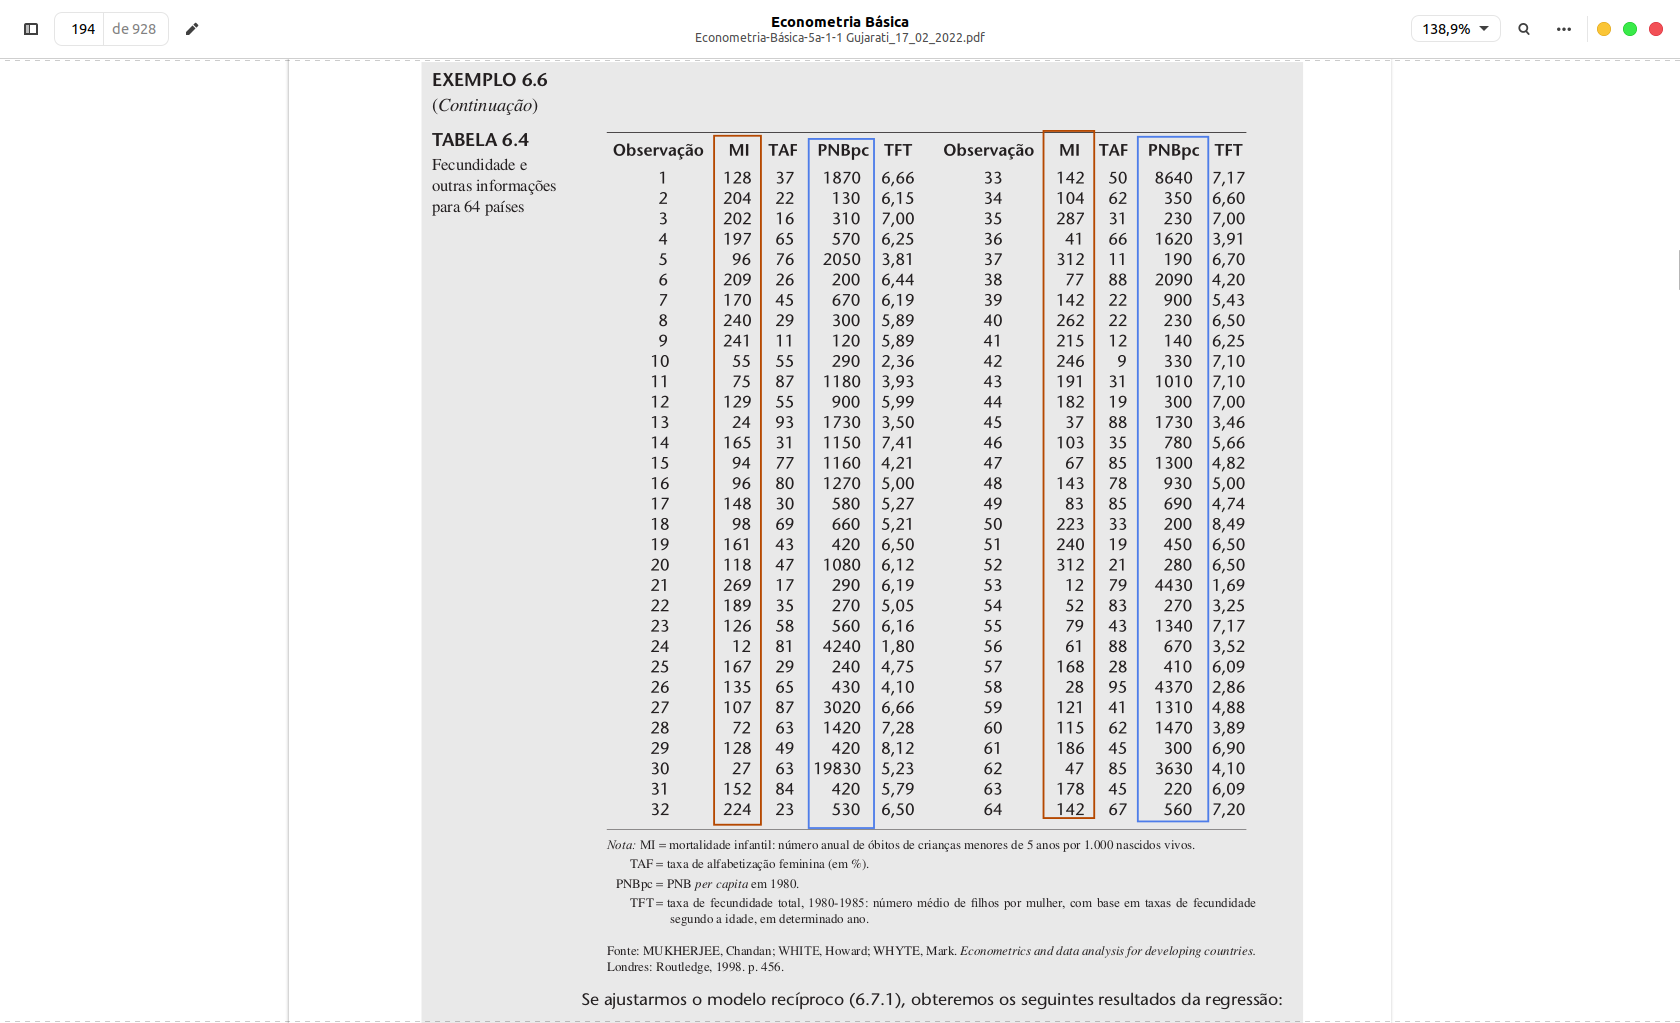

In [5]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_6.6_2.png')

In [6]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

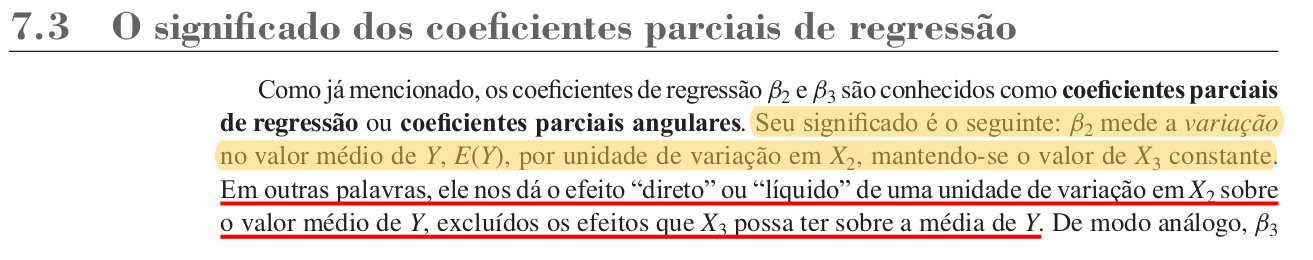

In [7]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.3_1.png')

## Regressão cálculo $ \hat{\beta}_{2 } $

$ \hat{mi} = \hat{\beta}_{1} + \hat{\beta}_{2}* PNBpc + \hat{\beta}_{3}* TAF + \hat{u}_i $

### Dispersao Mi x TAF -- PNBpc x TAF

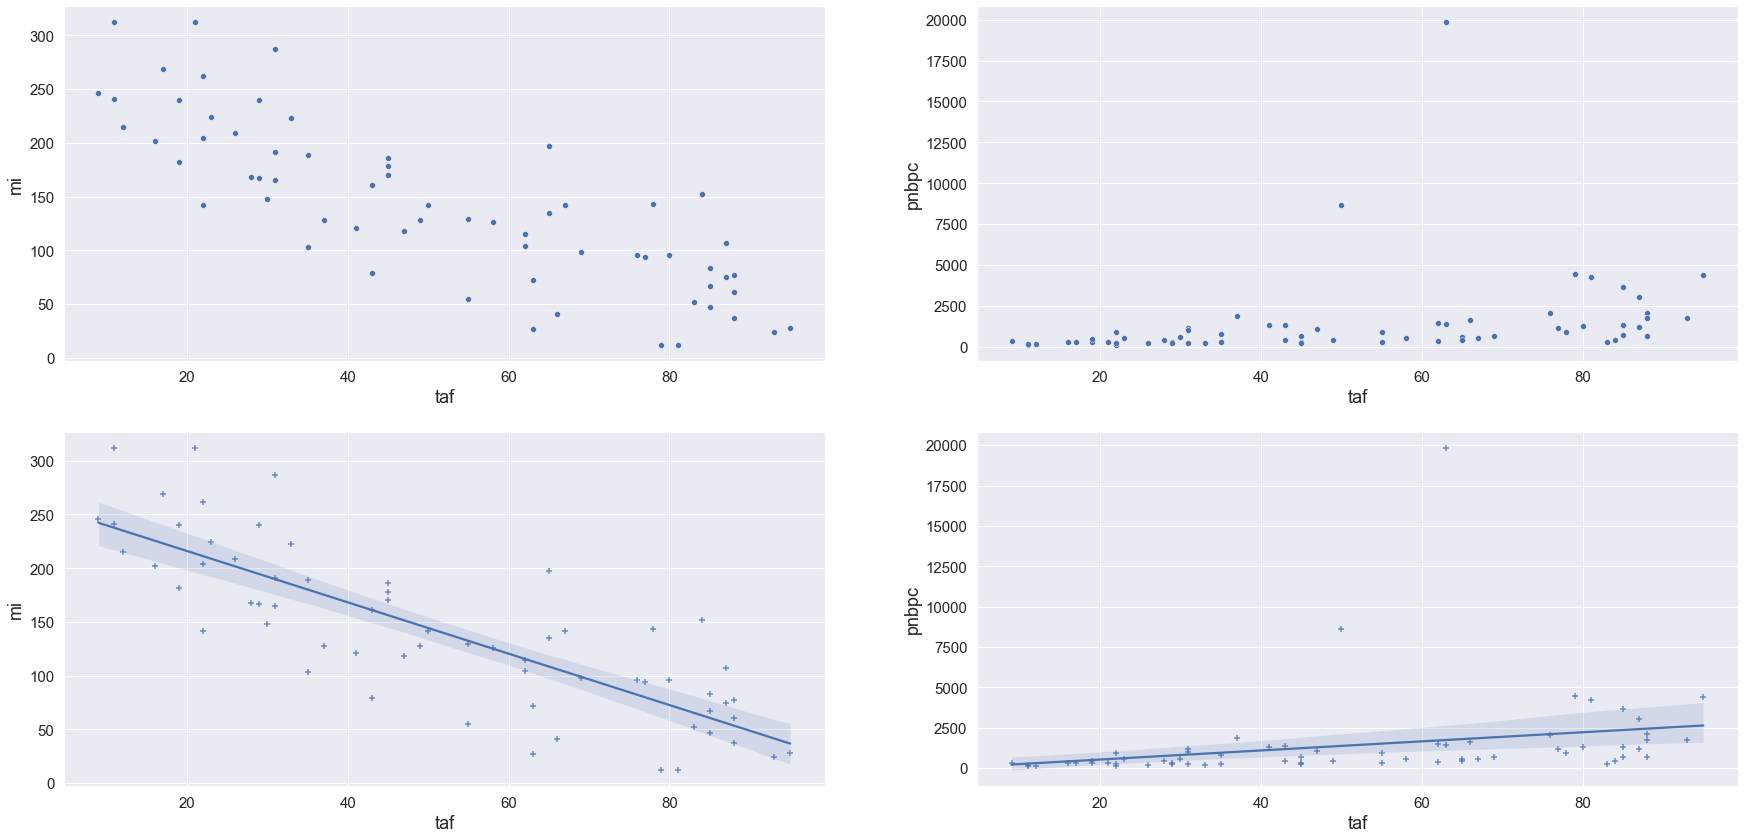

In [8]:
fig = plt.figure( figsize = (30,30))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'taf', y = 'mi', data = data, ax = ax1);

sns.regplot( x = 'taf', y = 'mi', data = data, fit_reg = True, marker = '+', ax = ax3);

sns.scatterplot( x = 'taf', y = 'pnbpc', data = data, ax = ax2);

sns.regplot(x = 'taf', y = 'pnbpc', data = data, fit_reg = True, marker = '+', ax = ax4);

### 7.3.1 Regressão Mortalidade Infantil (y) - Taxa de alfabetização Feminina (x)

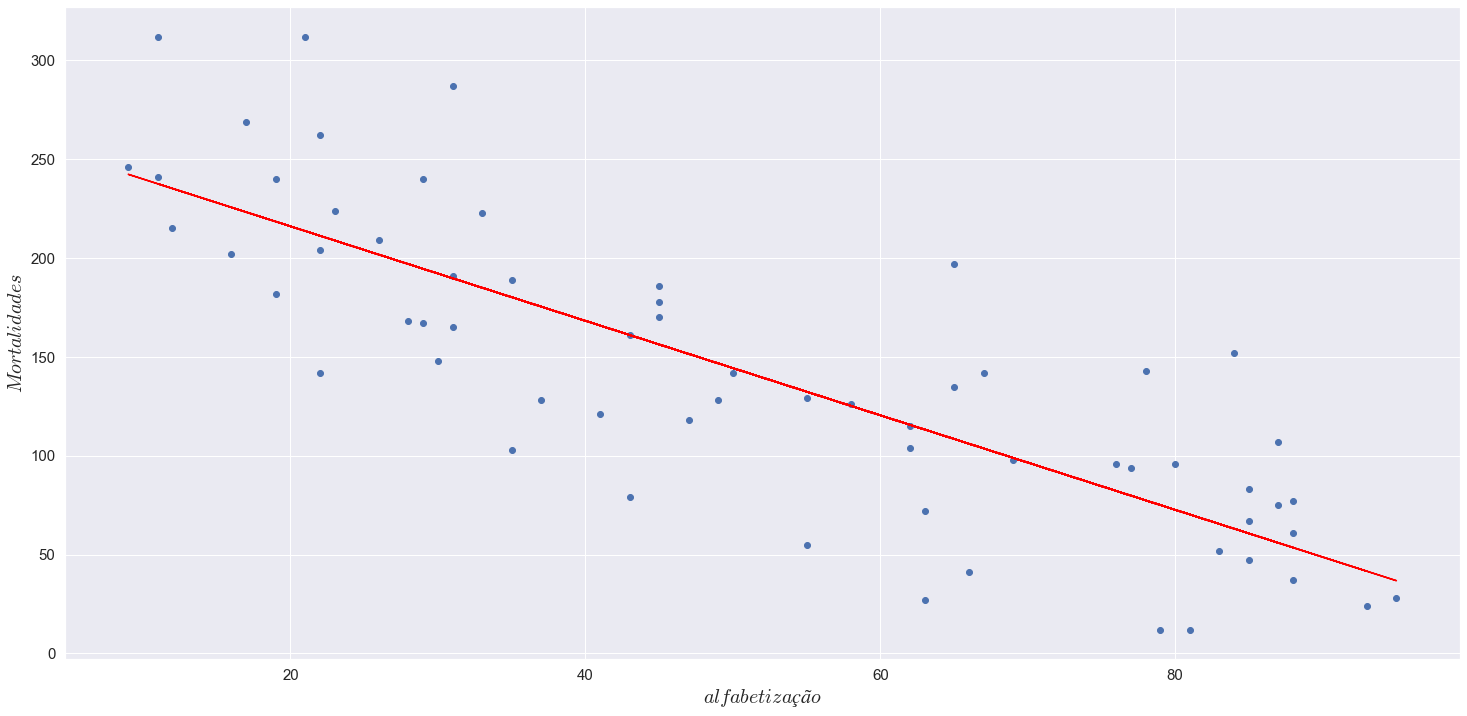

Coeficiente:     [-2.39049603]
Intercepto: [263.8635153]
R2: 0.6695897170291734
R2 ajustado: 0.6642605189167408


In [9]:
#Scikit Learn
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$alfabetização$', fontsize = 20 )
plt.ylabel(r'$Mortalidades$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [10]:
#statsmodels
print('Regressao Mortalidade infantil (y) - Taxa Alfabetizacao (x) \n')
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
#intercepto
x = sm.add_constant(x)
#Ordinary Least Squares -Minimos quadrados ordinários
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil (y) - Taxa Alfabetizacao (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.51e-16
Time:                        06:49:52   Log-Likelihood:                -332.02
No. Observations:                  64   AIC:                             668.0
Df Residuals:                      62   BIC:                             672.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

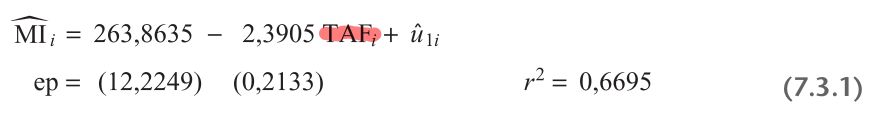

In [11]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.3_3.png')

In [12]:
#previsao MI
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      175.42 -47.42
1           2  204   22    130 6.15      211.27  -7.27
2           3  202   16    310 7.00      225.62 -23.62
3           4  197   65    570 6.25      108.48  88.52
4           5   96   76   2050 3.81       82.19  13.81
5           6  209   26    200 6.44      201.71   7.29
6           7  170   45    670 6.19      156.29  13.71
7           8  240   29    300 5.89      194.54  45.46
8           9  241   11    120 5.89      237.57   3.43
9          10   55   55    290 2.36      132.39 -77.39

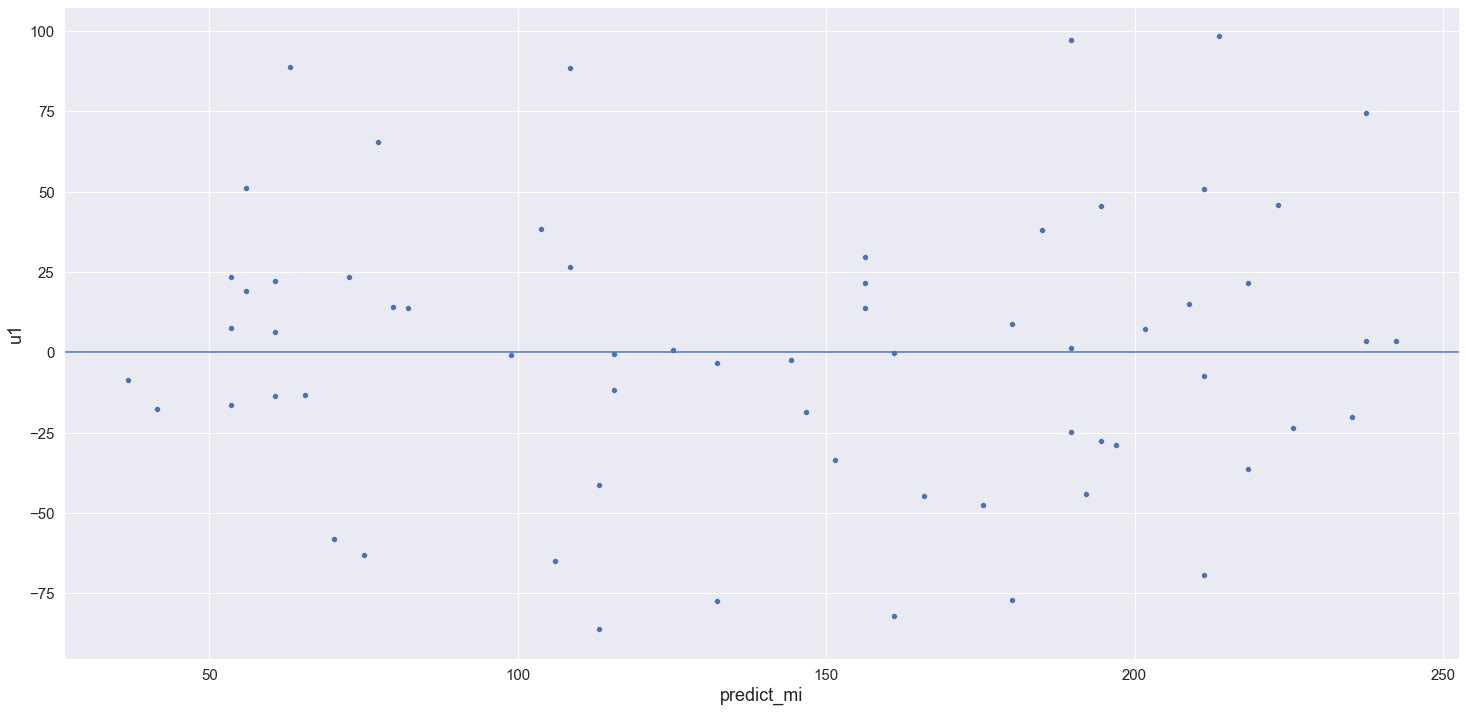

In [13]:
#Dispersao do residuo em funcao do valor predito de MI
sns.scatterplot( x = 'predict_mi', y = 'u1', data = data )
plt.axhline(y=0);

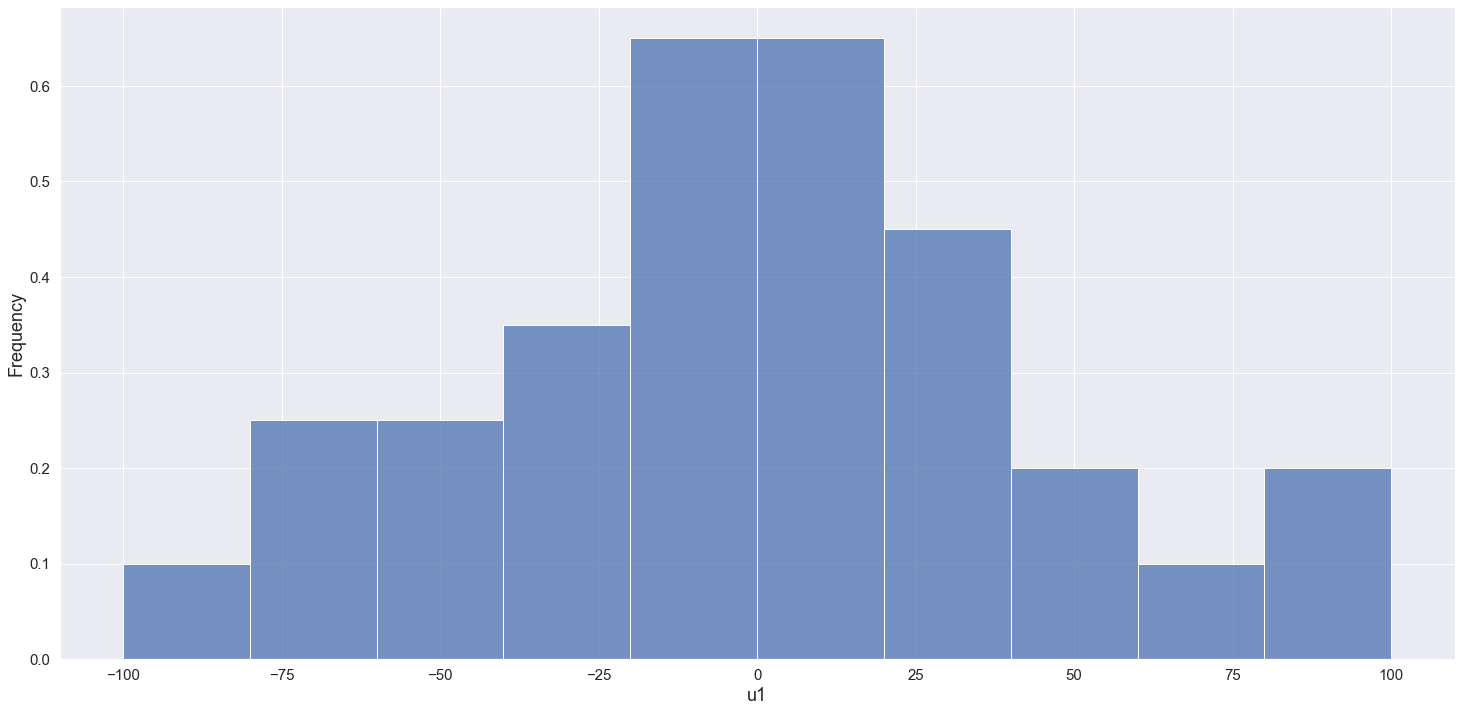

In [14]:
sns.histplot( x = 'u1', data = data, stat = 'frequency', bins = 10, binrange = (-100,100));

In [15]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.41983671261388456
0.8106504277631887


A função **_normaltest_** testa a hipótese nula $ {H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### 7.3.2 Regressão PNB PER CAPITA (y) - Taxa de alfabetização Feminina (x)

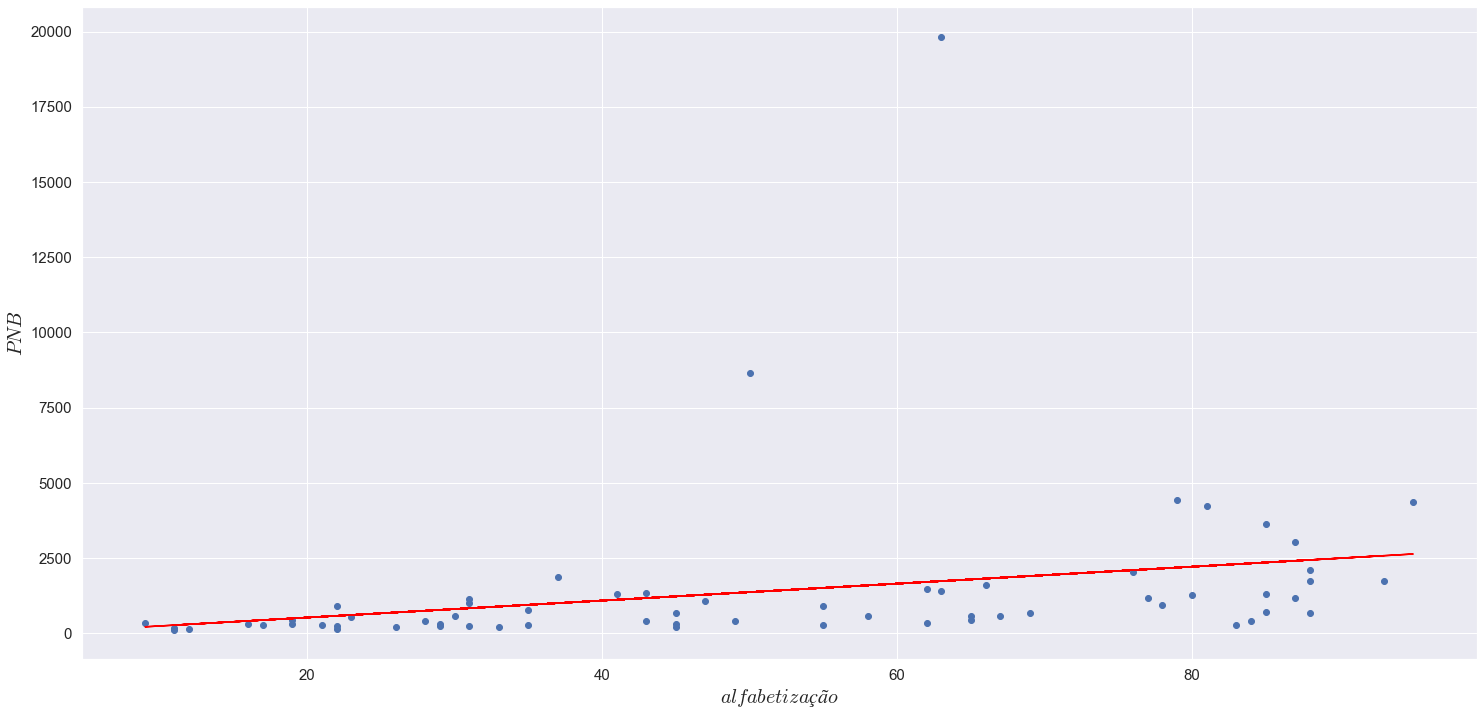

Coeficiente:     [28.14267695]
Intercepto: [-39.30327652]
R2: 0.07210829936648955
R2 ajustado: 0.05714230419498134


In [16]:
#Scikit Learn
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,3].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$alfabetização$', fontsize = 20 )
plt.ylabel(r'$PNB$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [17]:
#statsmodels
print(' Regressao PNBpc (y) - TAF (x)')
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,3].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao PNBpc (y) - TAF (x)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.818
Date:                Mon, 13 Jun 2022   Prob (F-statistic):             0.0319
Time:                        06:49:54   Log-Likelihood:                -594.18
No. Observations:                  64   AIC:                             1192.
Df Residuals:                      62   BIC:                             1197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.3033

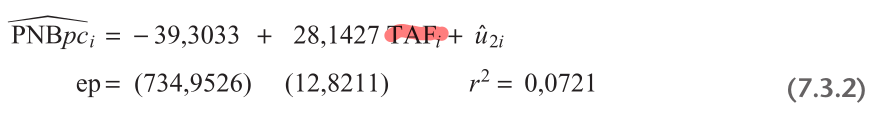

In [18]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.3_4.png')

In [19]:
#valor predito de PNBpc
data['predict_pnb'] = model.predict(x)
data['u2'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1  predict_pnb       u2
0           1  128   37   1870 6.66      175.42 -47.42      1001.98   868.02
1           2  204   22    130 6.15      211.27  -7.27       579.84  -449.84
2           3  202   16    310 7.00      225.62 -23.62       410.98  -100.98
3           4  197   65    570 6.25      108.48  88.52      1789.97 -1219.97
4           5   96   76   2050 3.81       82.19  13.81      2099.54   -49.54
5           6  209   26    200 6.44      201.71   7.29       692.41  -492.41
6           7  170   45    670 6.19      156.29  13.71      1227.12  -557.12
7           8  240   29    300 5.89      194.54  45.46       776.83  -476.83
8           9  241   11    120 5.89      237.57   3.43       270.27  -150.27
9          10   55   55    290 2.36      132.39 -77.39      1508.54 -1218.54

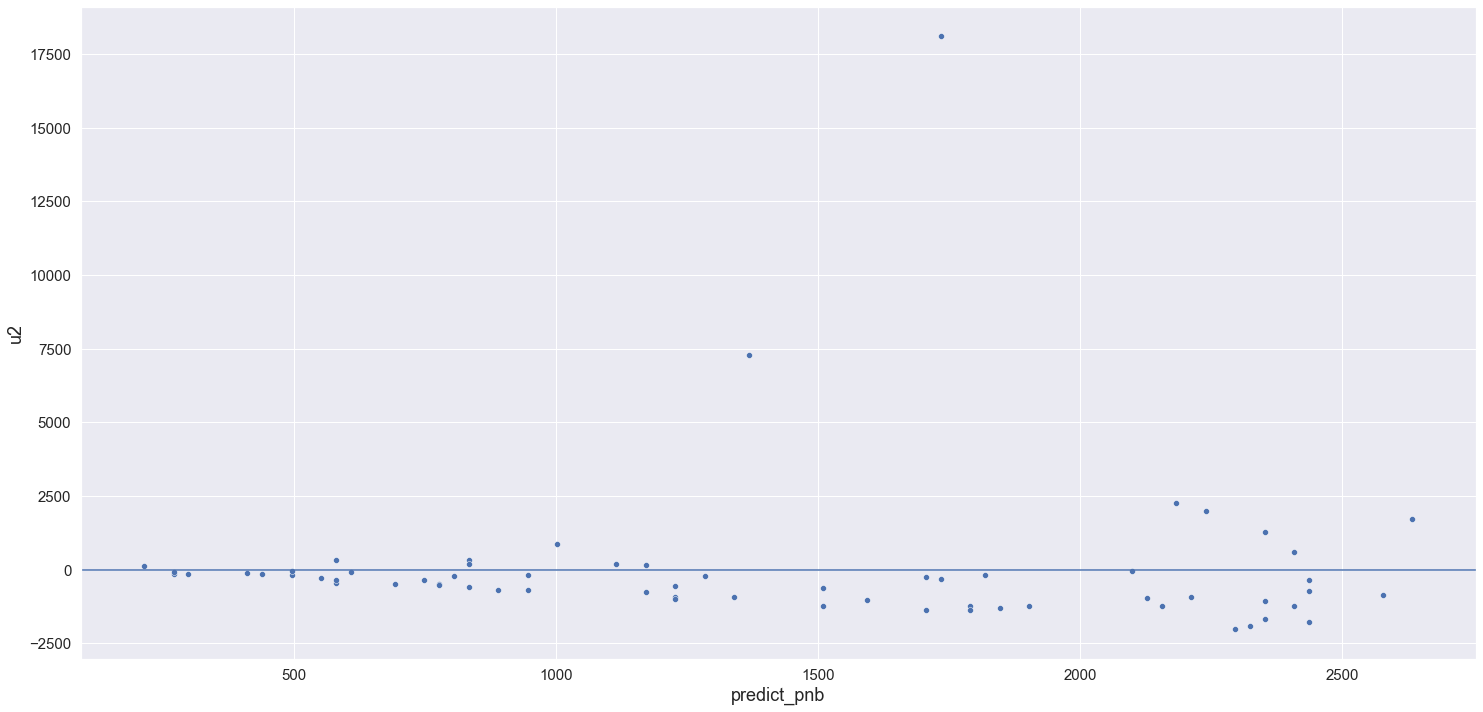

In [20]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_pnb', y = 'u2', data = data )
plt.axhline(y=0);

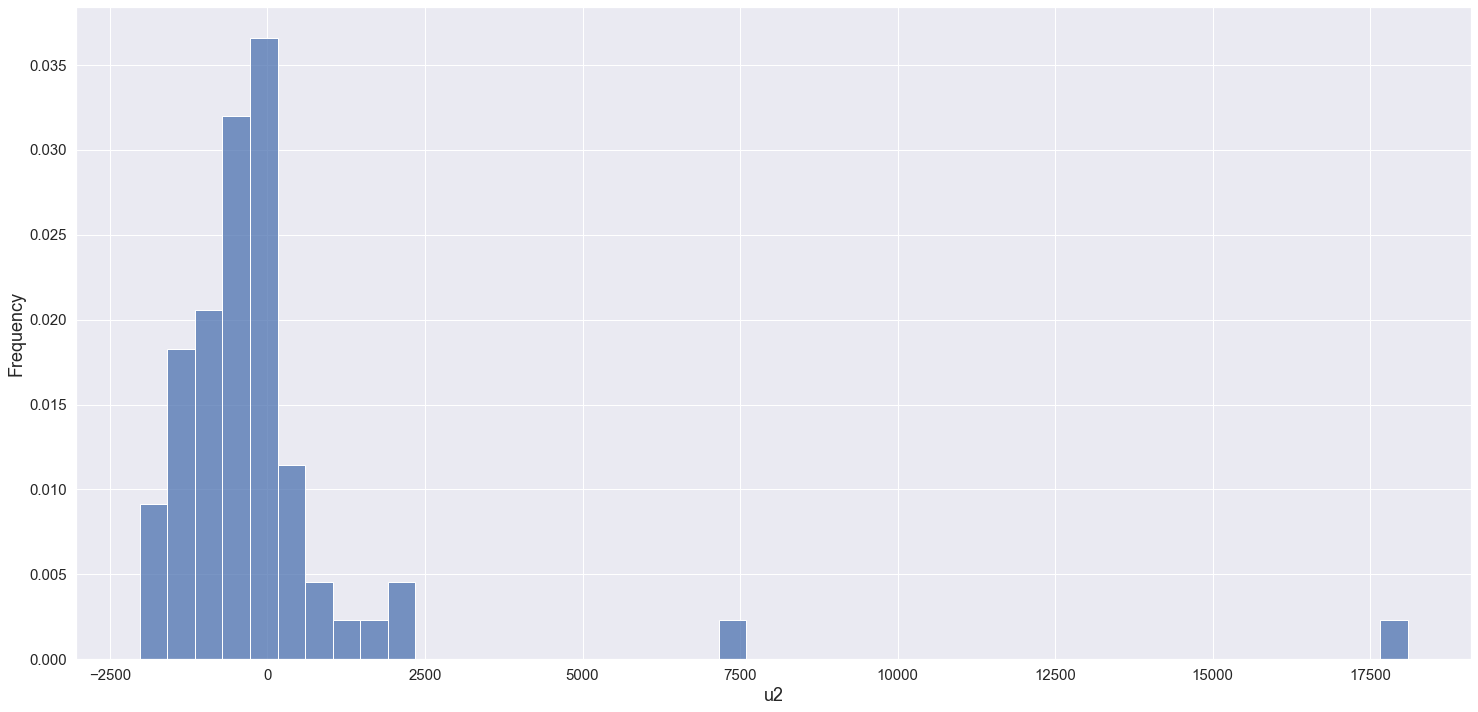

In [21]:
#histograma dos resíduos 
sns.histplot( x = 'u2', data = data, stat = 'frequency');

In [22]:
#teste de normalidade Jarque Bera
from statsmodels.stats.stattools import jarque_bera
#result ( jarque bera test statistics, pvalue, skewness and kurtosis)
jb = jarque_bera(data['u2'])
jb

(3481.5250367876165, 0.0, 5.556719391497022, 37.38114842776489)

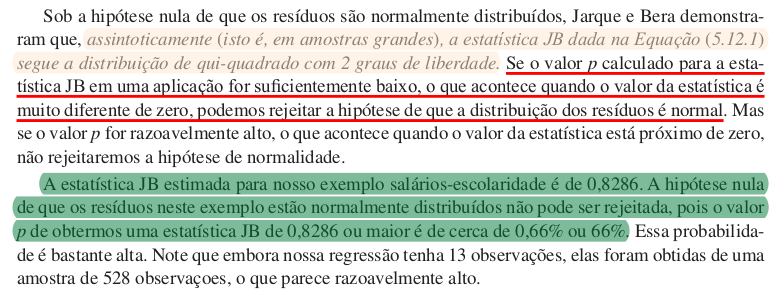

In [23]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [24]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u2'])
print(stat_test)
print(p_valor)

112.42114242229835
3.8731034614868027e-25


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### 7.3.3 Regressao dos Erros

$ {u}_1 $ associado a mortalidade Infantil (y) - $ {u}_2 $ associado PNB (x)

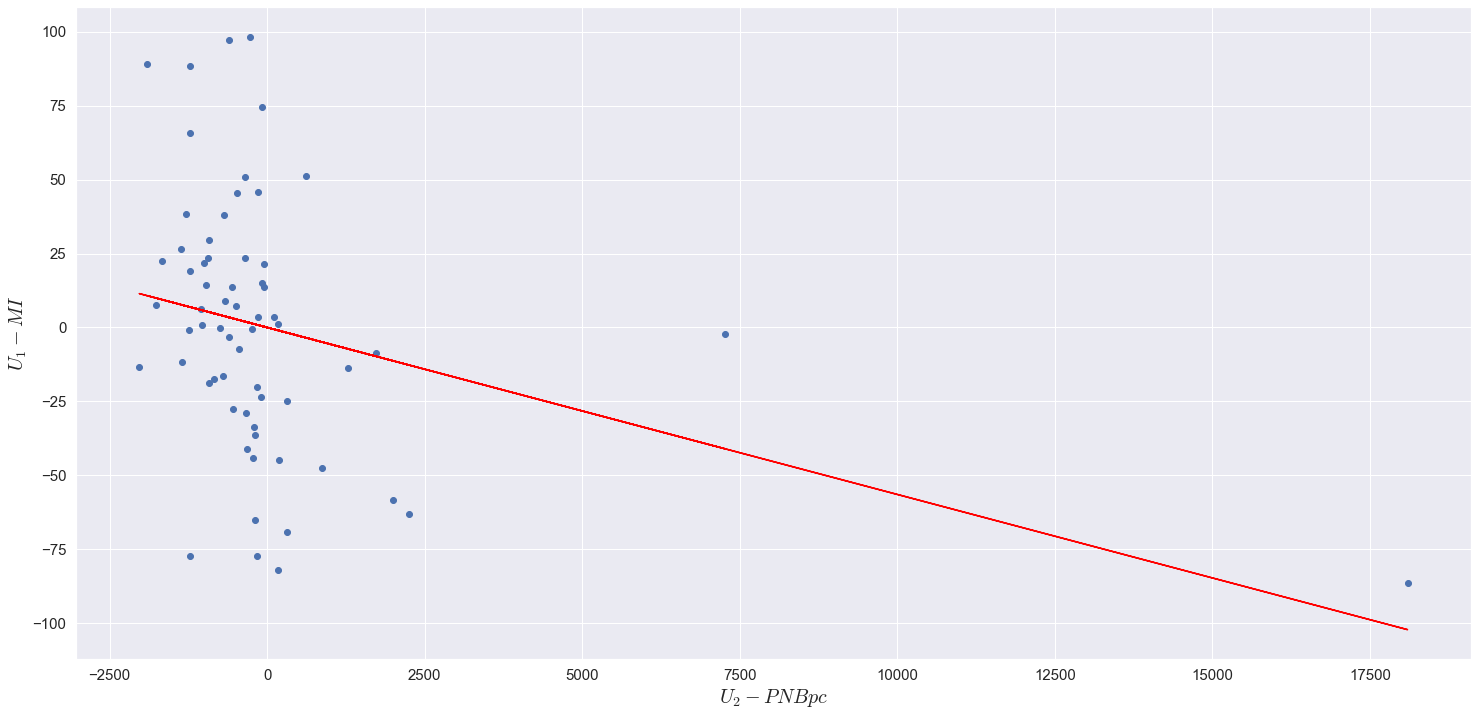

Coeficiente:     [-0.00564659]
Intercepto: [8.85133885e-14]
R2: 0.11523788187990425
R2 ajustado: 0.10096752513603169


In [25]:
#Scikit Learn
x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,6].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'${U}_2 - PNBpc$', fontsize = 20 )
plt.ylabel(r'${U}_1 - MI$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [26]:
#statsmodels
print(' Regressao u1 MI (y) - u2 PNB (x) \n')
x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,6].values.reshape(-1,1)
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao u1 MI (y) - u2 PNB (x) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              8.206
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                     0.00567
Time:                        06:49:57   Log-Likelihood:                         -328.10
No. Observations:                  64   AIC:                                      658.2
Df Residuals:                      63   BIC:                                      660.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

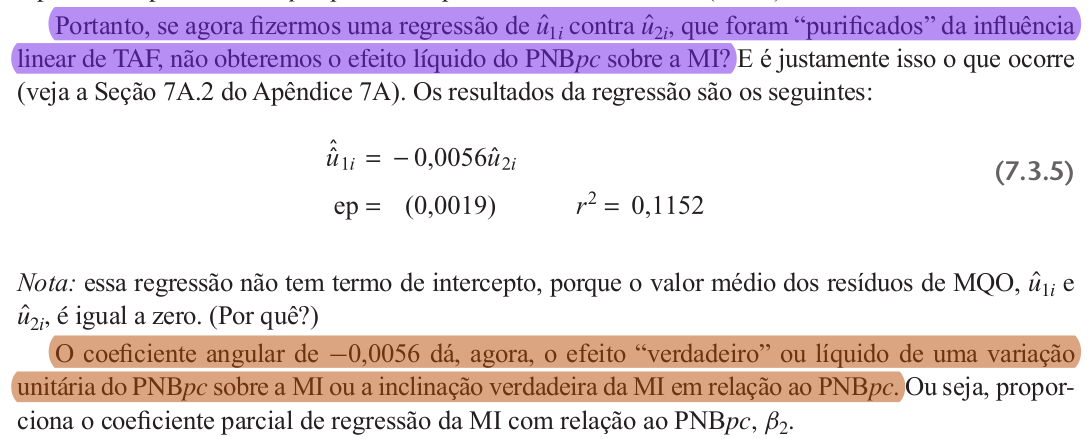

In [27]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/secao_7.3_2.png')

**Se a Mortalidade infantil subir em 100 mortes por mil habitantes o Produto Nacional Bruto per capita decresce 0,56 unidade de dolares**

Se o PNBpc subir 1 dolar a mortalidade infantil reduz 0.0056 unidade

## Regressão cálculo $ \hat{\beta}_{3} $

$ \hat{mi} = \hat{\beta}_{1} + \hat{\beta}_{2}* PNBpc + \hat{\beta}_{3}* TAF + \hat{u}_i $

In [28]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

### Dispersao MI x PNBpc -- TAF x PNBpc

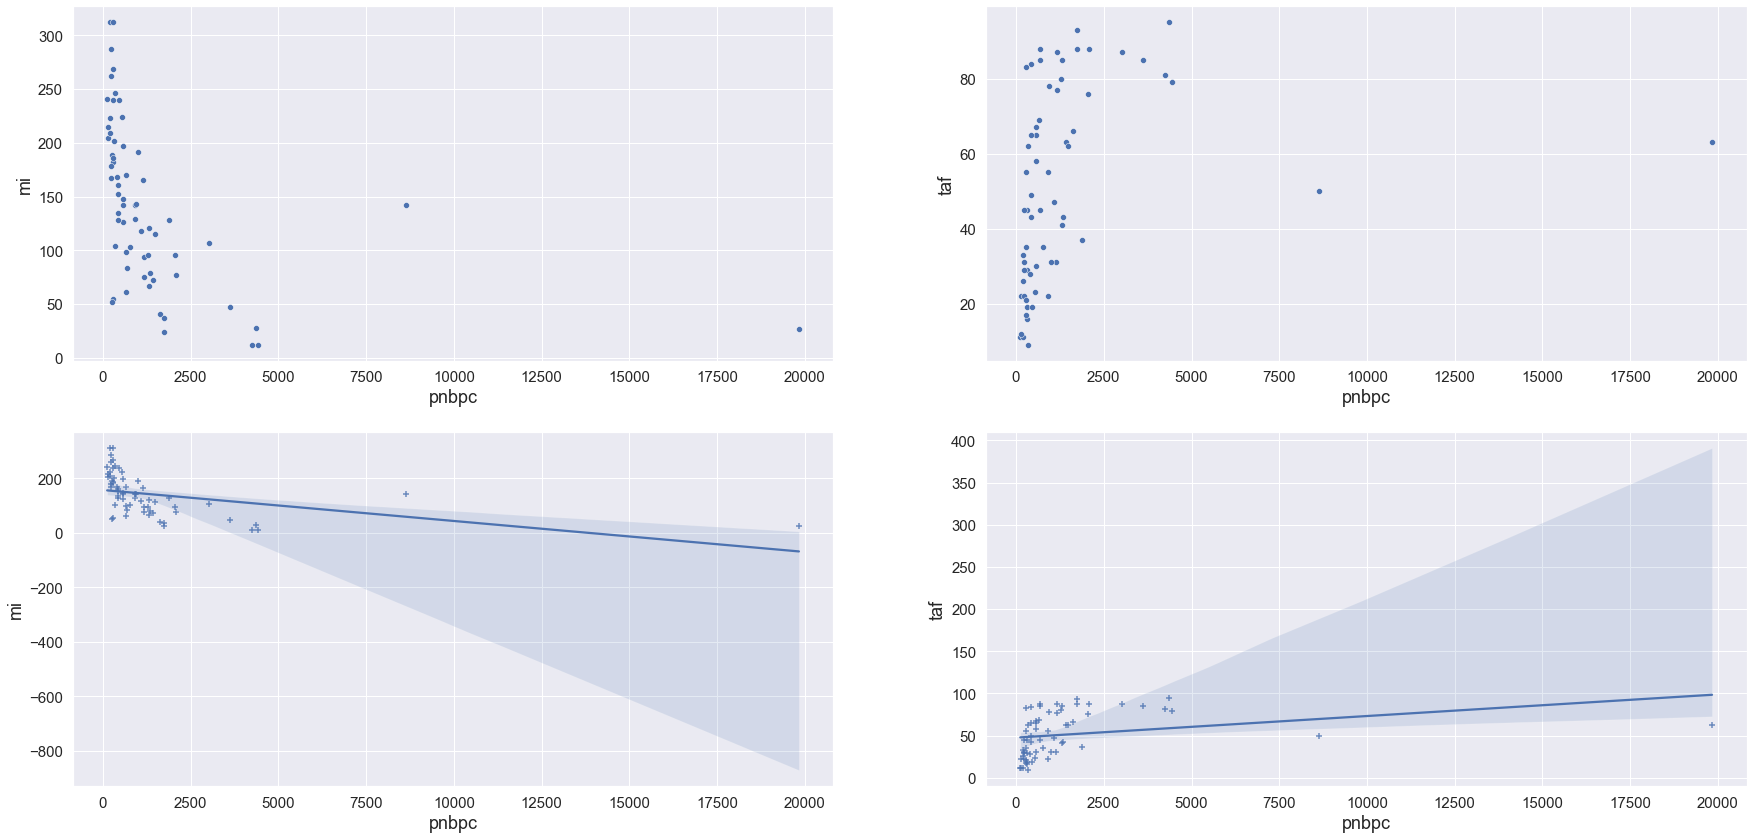

In [29]:
fig = plt.figure( figsize = (30,30))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'pnbpc', y = 'mi', data = data, ax = ax1);

sns.regplot( x = 'pnbpc', y = 'mi', data = data, fit_reg = True, marker = '+', ax = ax3);

sns.scatterplot( x = 'pnbpc', y = 'taf', data = data, ax = ax2);

sns.regplot(x = 'pnbpc', y = 'taf', data = data, fit_reg = True, marker = '+', ax = ax4);

### 7.3.4 Regressão Mortalidade Infantil (y) - Produto Nacional Bruto per capita (x)

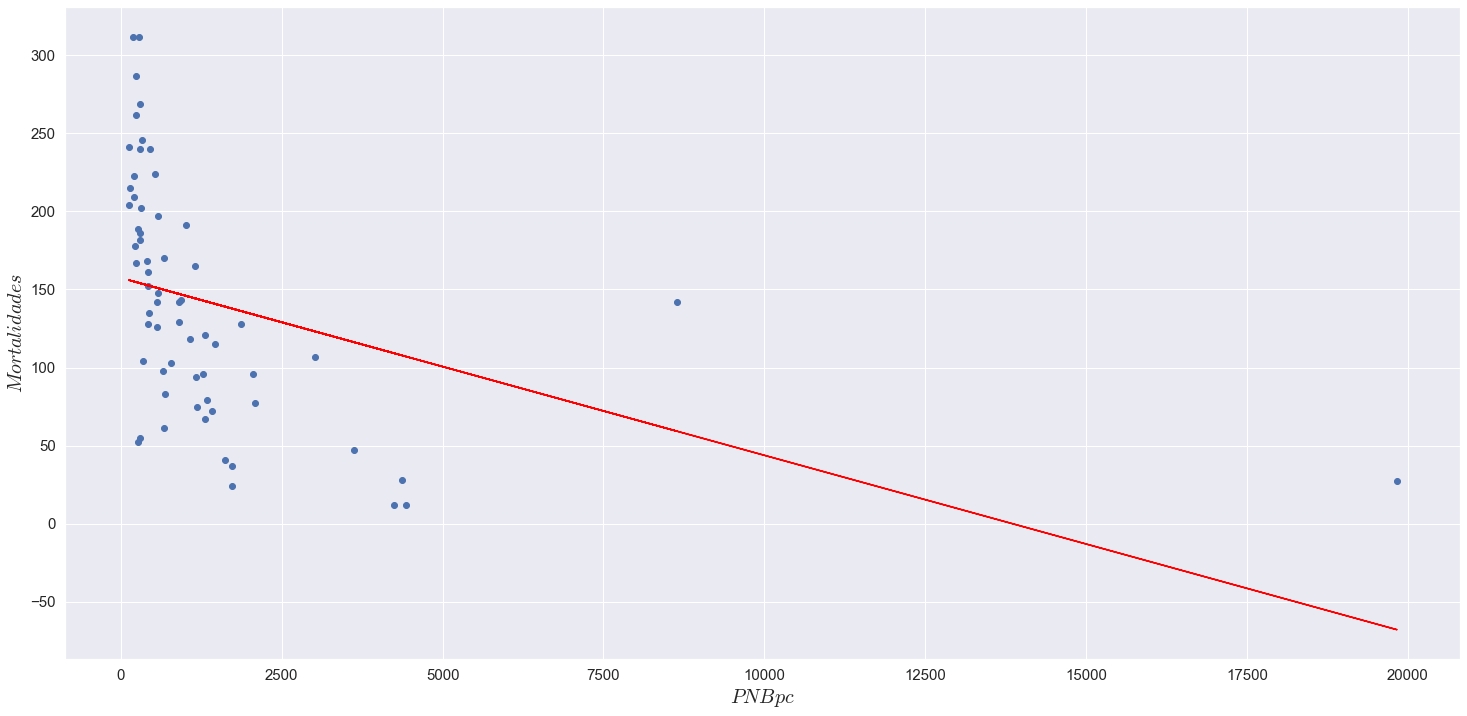

Coeficiente:     [-0.01136445]
Intercepto: [157.42444058]
R2: 0.16621698463986645
R2 ajustado: 0.1527688714888965


In [30]:
#Scikit Learn
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PNBpc$', fontsize = 20 )
plt.ylabel(r'$Mortalidades$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [31]:
#statsmodels
print('Regressao Mortalidade infantil (y) - PNBpc (x) \n')
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil (y) - PNBpc (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           0.000826
Time:                        06:50:01   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

**Equação da regressao**  
$ \hat{mi} = 157.4244 - 0.0114 * PNBpc $

In [32]:
#previsao MI
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      136.17  -8.17
1           2  204   22    130 6.15      155.95  48.05
2           3  202   16    310 7.00      153.90  48.10
3           4  197   65    570 6.25      150.95  46.05
4           5   96   76   2050 3.81      134.13 -38.13
5           6  209   26    200 6.44      155.15  53.85
6           7  170   45    670 6.19      149.81  20.19
7           8  240   29    300 5.89      154.02  85.98
8           9  241   11    120 5.89      156.06  84.94
9          10   55   55    290 2.36      154.13 -99.13

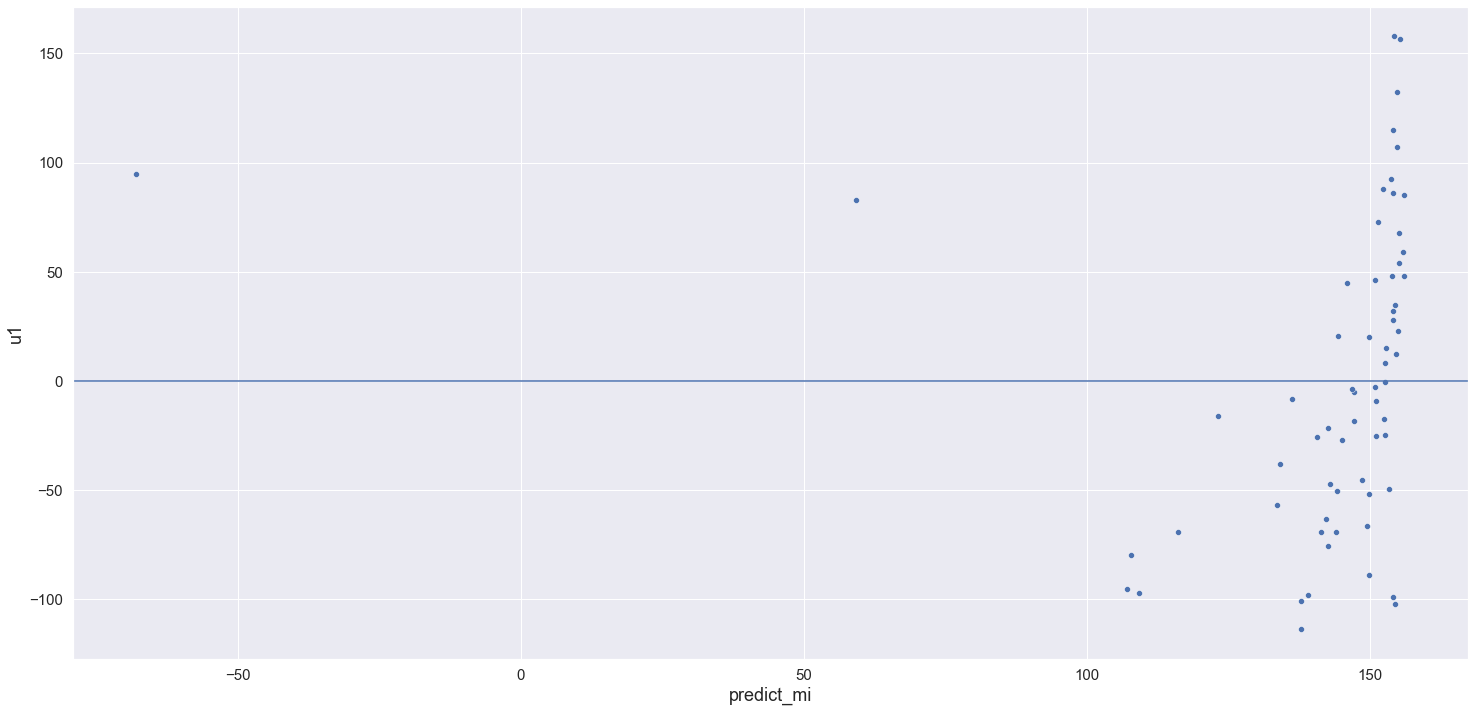

In [33]:
#Dispersao do residuo em funcao do valor predito de MI
sns.scatterplot( x = 'predict_mi', y = 'u1', data = data )
plt.axhline(y=0);

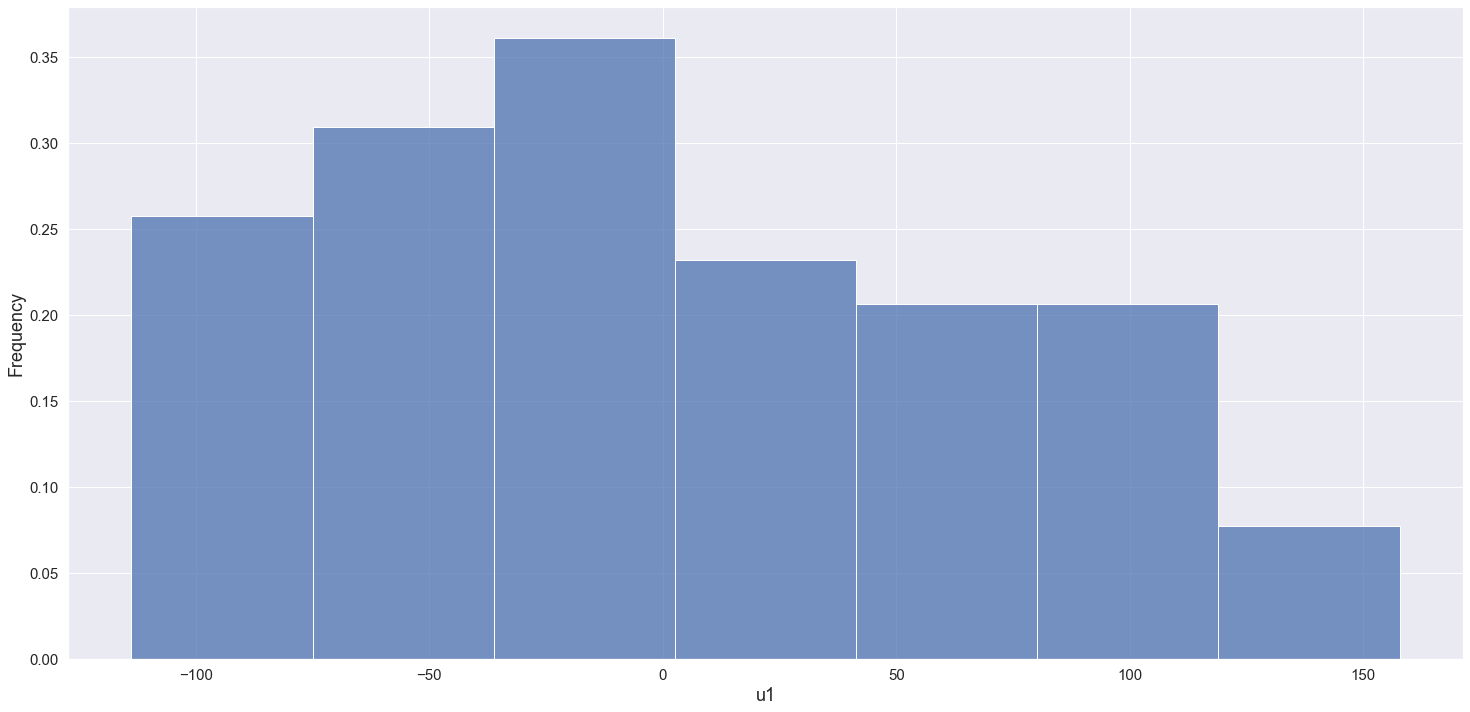

In [34]:
sns.histplot(x = 'u1', data = data, stat = 'frequency');

In [35]:
#teste normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado (jarque bera test statistics, pvalue, skewness and kurtosis)
jb = jarque_bera( data['u1'] )
jb

(2.5447781998787673,
 0.28016148779509054,
 0.34522584769359527,
 2.308936847103326)

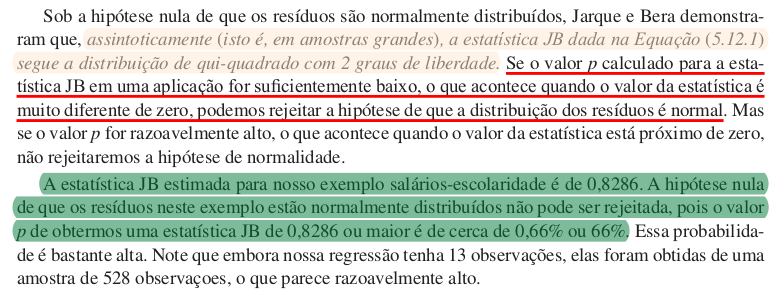

In [36]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [37]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

3.321195705890675
0.19002533892598394


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### 7.3.5 Regressão Taxa Alfabetizacao Feminina (y) - Produto Nacional Bruto per capita (x)

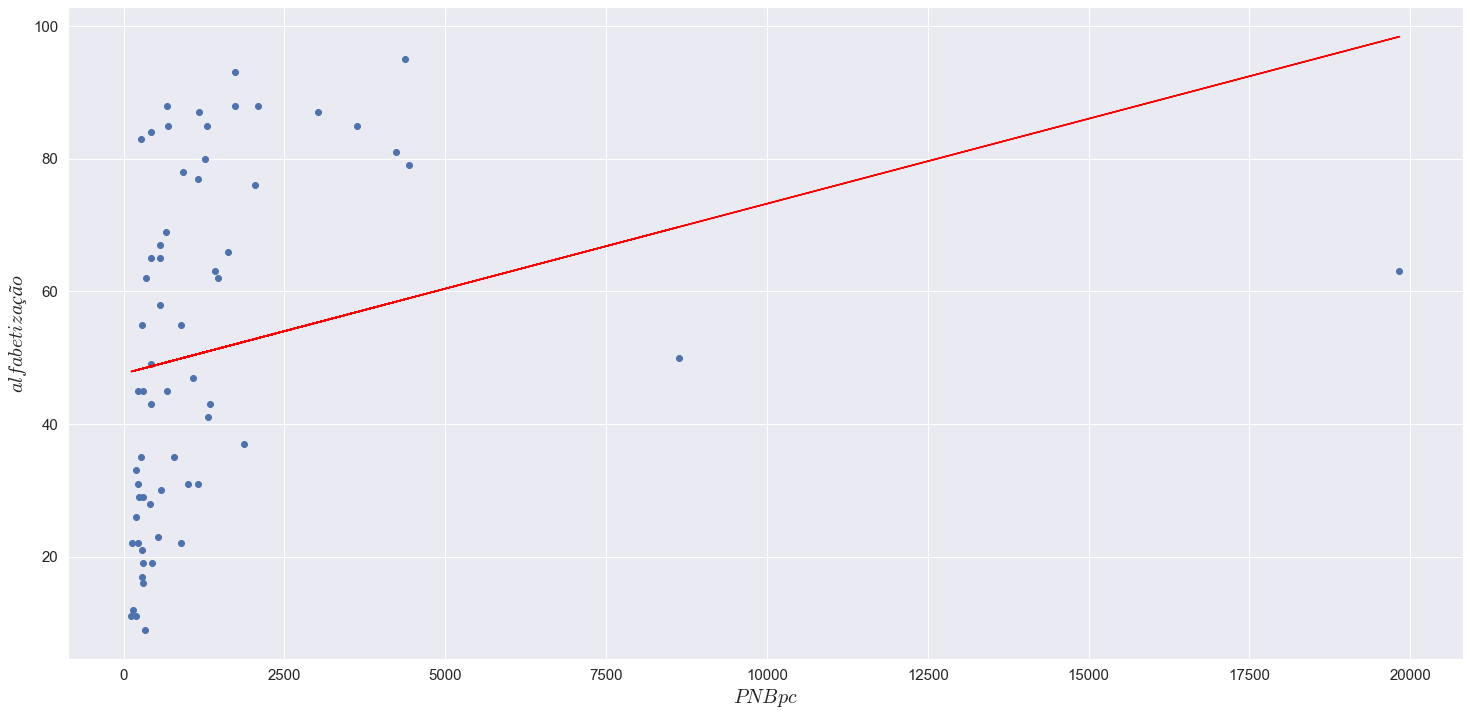

Coeficiente:     [0.00256224]
Intercepto: [47.59716086]
R2: 0.07210829936648966
R2 ajustado: 0.05714230419498145


In [38]:
#Scikit Learn
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PNBpc$', fontsize = 20 )
plt.ylabel(r'$alfabetização$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [39]:
#statsmodels
print(' Regressao PNBpc (y) - TAF (x)')
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,2].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao PNBpc (y) - TAF (x)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.818
Date:                Mon, 13 Jun 2022   Prob (F-statistic):             0.0319
Time:                        06:50:03   Log-Likelihood:                -296.45
No. Observations:                  64   AIC:                             596.9
Df Residuals:                      62   BIC:                             601.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.5972

In [40]:
# Equacao regressao
# TAF (y) = 47.5972 + 0.002562 PNBpc (x)

In [41]:
#valor predito de PNBpc
data['predict_taf'] = model.predict(x)
data['u2'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1  predict_taf     u2
0           1  128   37   1870 6.66      136.17  -8.17        52.39 -15.39
1           2  204   22    130 6.15      155.95  48.05        47.93 -25.93
2           3  202   16    310 7.00      153.90  48.10        48.39 -32.39
3           4  197   65    570 6.25      150.95  46.05        49.06  15.94
4           5   96   76   2050 3.81      134.13 -38.13        52.85  23.15
5           6  209   26    200 6.44      155.15  53.85        48.11 -22.11
6           7  170   45    670 6.19      149.81  20.19        49.31  -4.31
7           8  240   29    300 5.89      154.02  85.98        48.37 -19.37
8           9  241   11    120 5.89      156.06  84.94        47.90 -36.90
9          10   55   55    290 2.36      154.13 -99.13        48.34   6.66

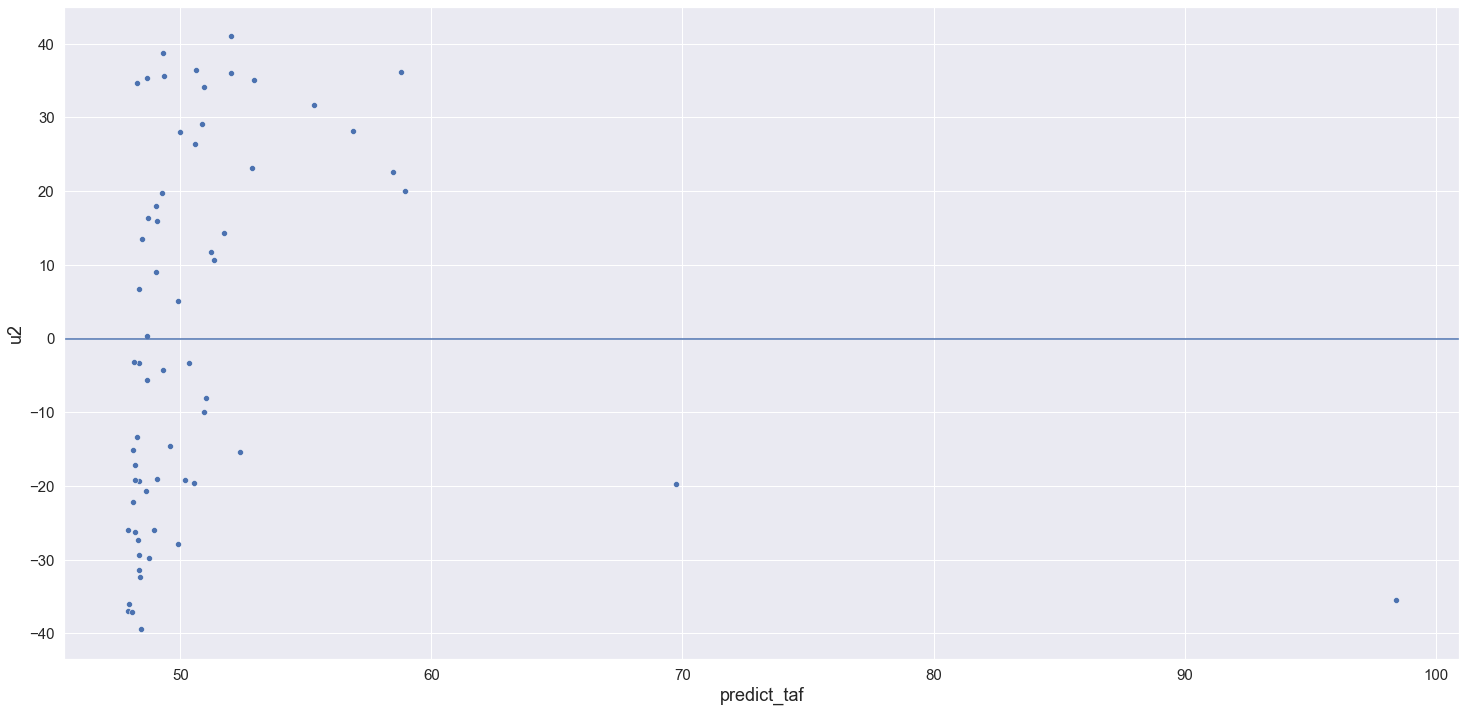

In [42]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_taf', y = 'u2', data = data )
plt.axhline(y=0);

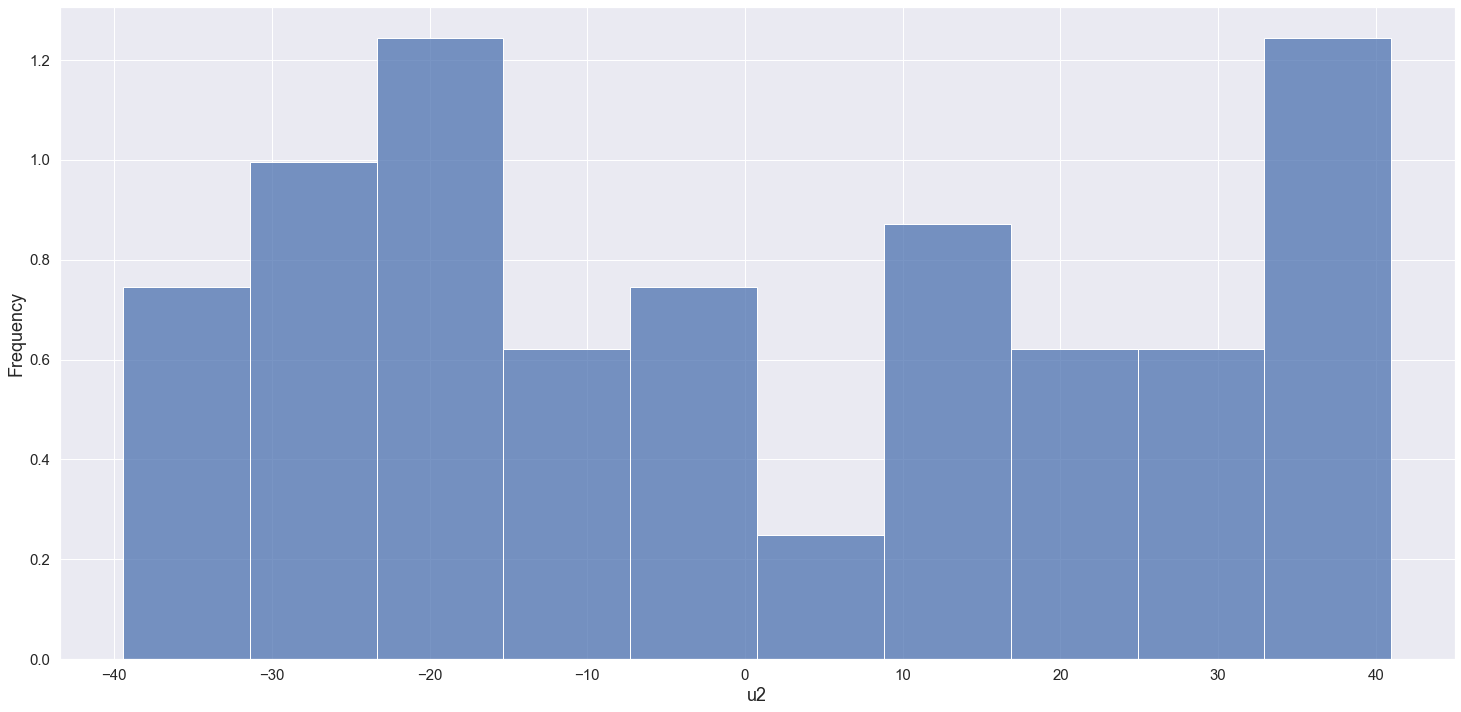

In [43]:
#histograma dos resíduos
sns.histplot(x = 'u2', data = data, stat = 'frequency', bins=10);

In [44]:
# Teste normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistics, pvalue, skewness and kurtosis )
jb = jarque_bera(data['u2'])
jb

(5.271467344843346,
 0.07166637047617734,
 0.11937813041104982,
 1.6144330755122276)

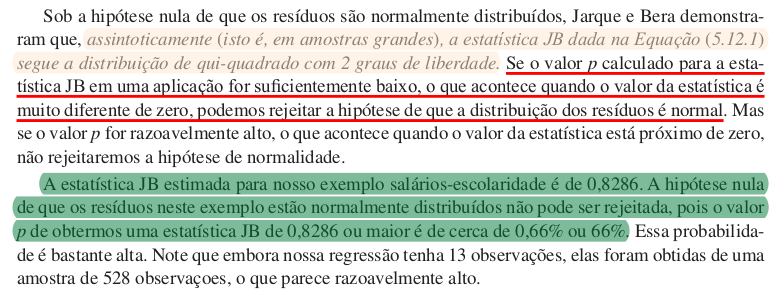

In [45]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [46]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u2'])
print(stat_test)
print(p_valor)

39.02143664770085
3.3620385896258135e-09


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### 7.3.6 Regressao dos Erros
$ {u}_1 $ associado a mortalidade Infantil (y) - $ {u}_2 $ associado taf (x)

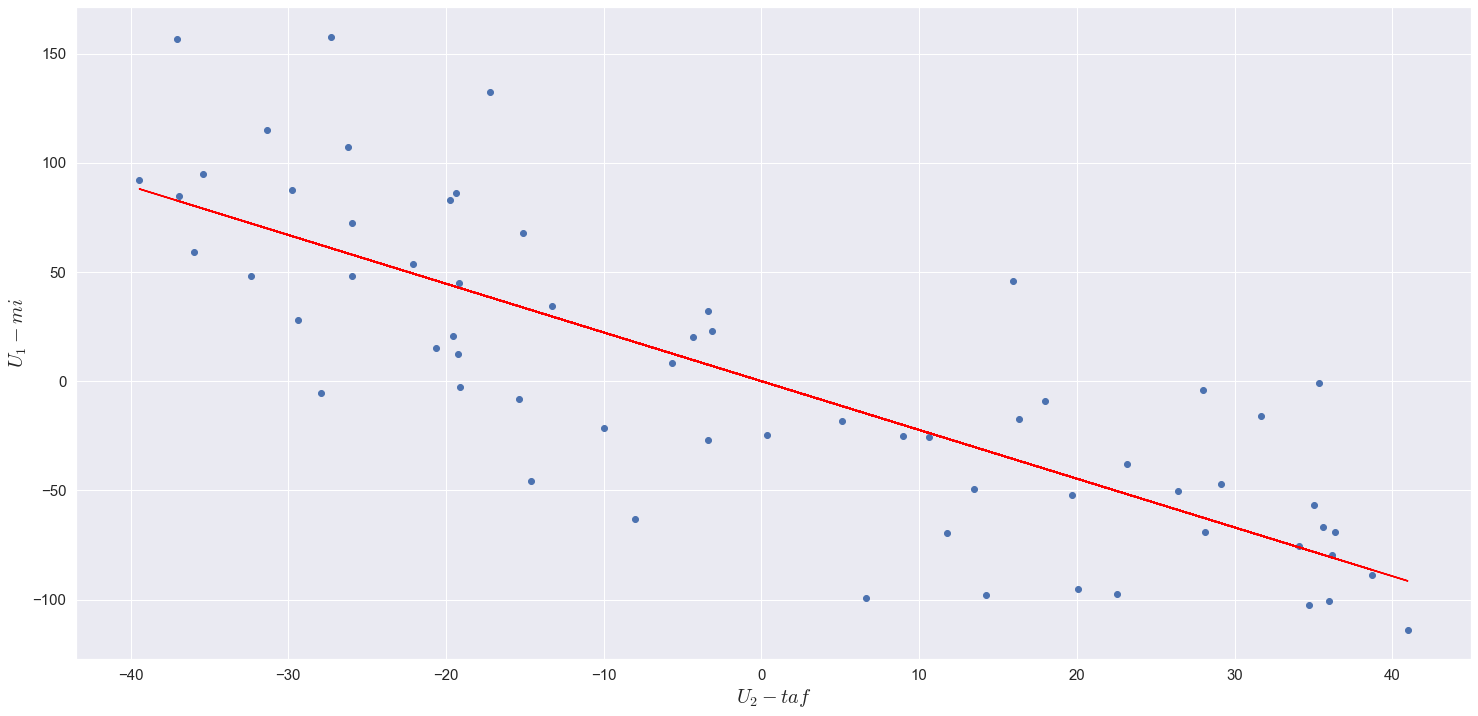

Coeficiente:     [-2.23158573]
Intercepto: [1.16847028e-13]
R2: 0.64938779463664
R2 ajustado: 0.6437327590662633


In [47]:
#Scikit Learn
x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,6].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'${U}_2 - taf$', fontsize = 20 )
plt.ylabel(r'${U}_1 - mi$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [48]:
#statsmodels

x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,6].values.reshape(-1,1)
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              116.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    5.66e-16
Time:                        06:50:05   Log-Likelihood:                         -328.10
No. Observations:                  64   AIC:                                      658.2
Df Residuals:                      63   BIC:                                      660.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
#regressao dos residuos

# u1 (mi) = - 2.2316 u2 (taf)

# Se a Mortalidade infantil subir em 100 mortes por mil habitantes a taxa de alfabetizacao Feminina decresce 223 pontos percentuais

# Quando a taxa de alfabetização aumenta 1 ponto percentual a mortalidade infantil decresce 2,23 por mil nascidos

# Exemplo 7.1 Regressão Multivariada (Statsmodels)

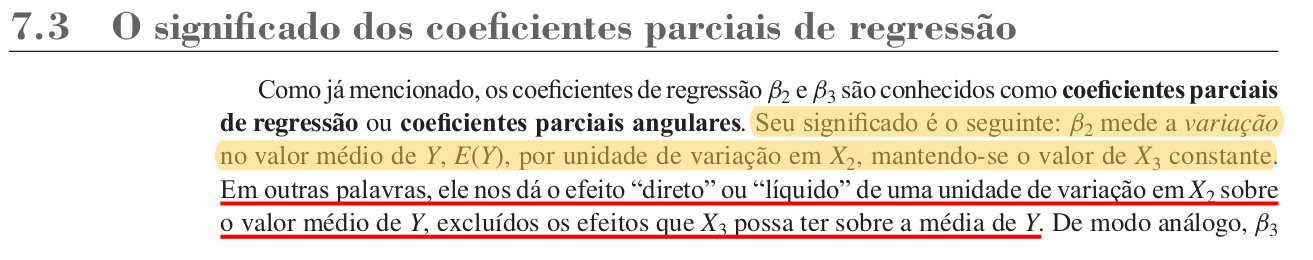

In [50]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.3_1.png')

In [51]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

In [53]:
#statsmodels
print(' Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u \n')
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        06:50:06   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [54]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      170.51 -42.51
1           2  204   22    130 6.15      213.81  -9.81
2           3  202   16    310 7.00      226.19 -24.19
3           4  197   65    570 6.25      115.37  81.63
4           5   96   76   2050 3.81       82.47  13.53
5           6  209   26    200 6.44      204.49   4.51
6           7  170   45    670 6.19      159.44  10.56
7           8  240   29    300 5.89      197.23  42.77
8           9  241   11    120 5.89      238.42   2.58
9          10   55   55    290 2.36      139.27 -84.27

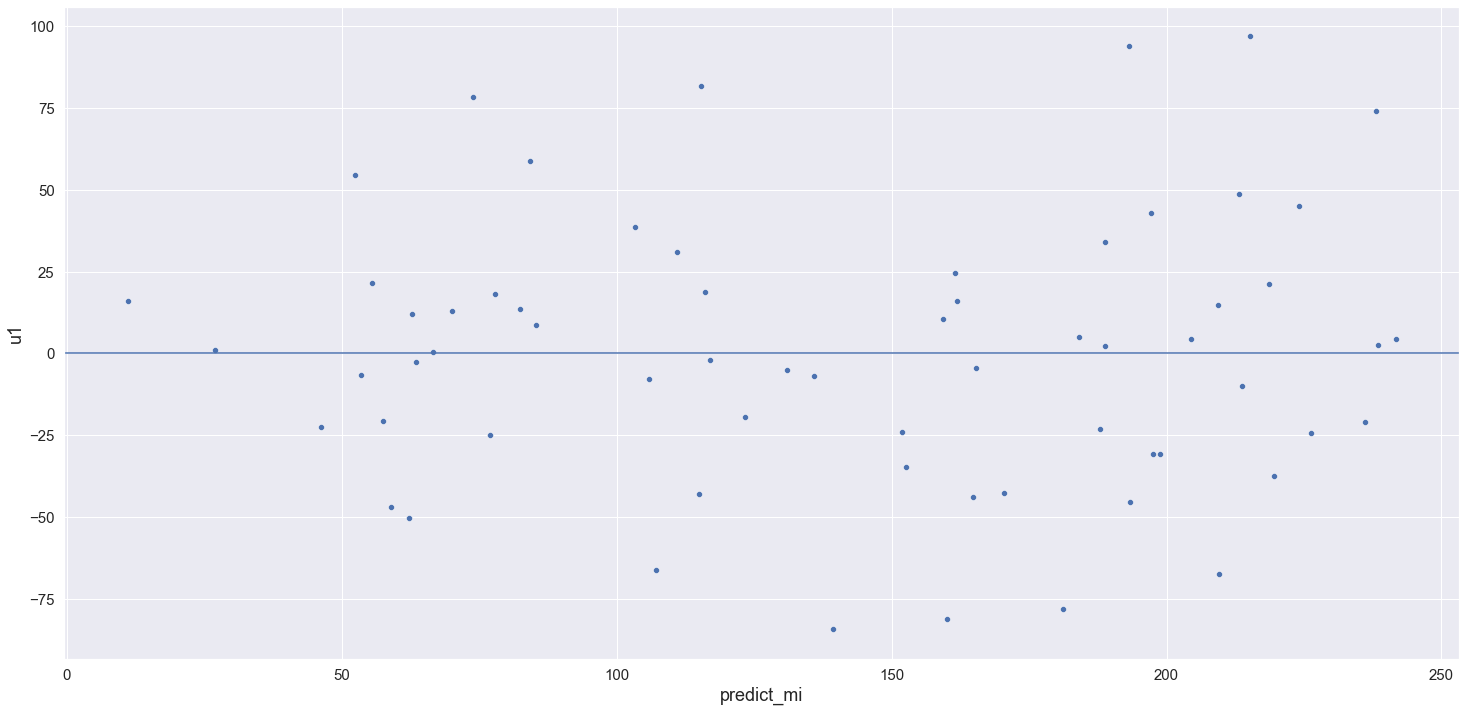

In [55]:
#dispersão dos resíduos
sns.scatterplot(x = 'predict_mi', y = 'u1', data = data );
plt.axhline(y=0);

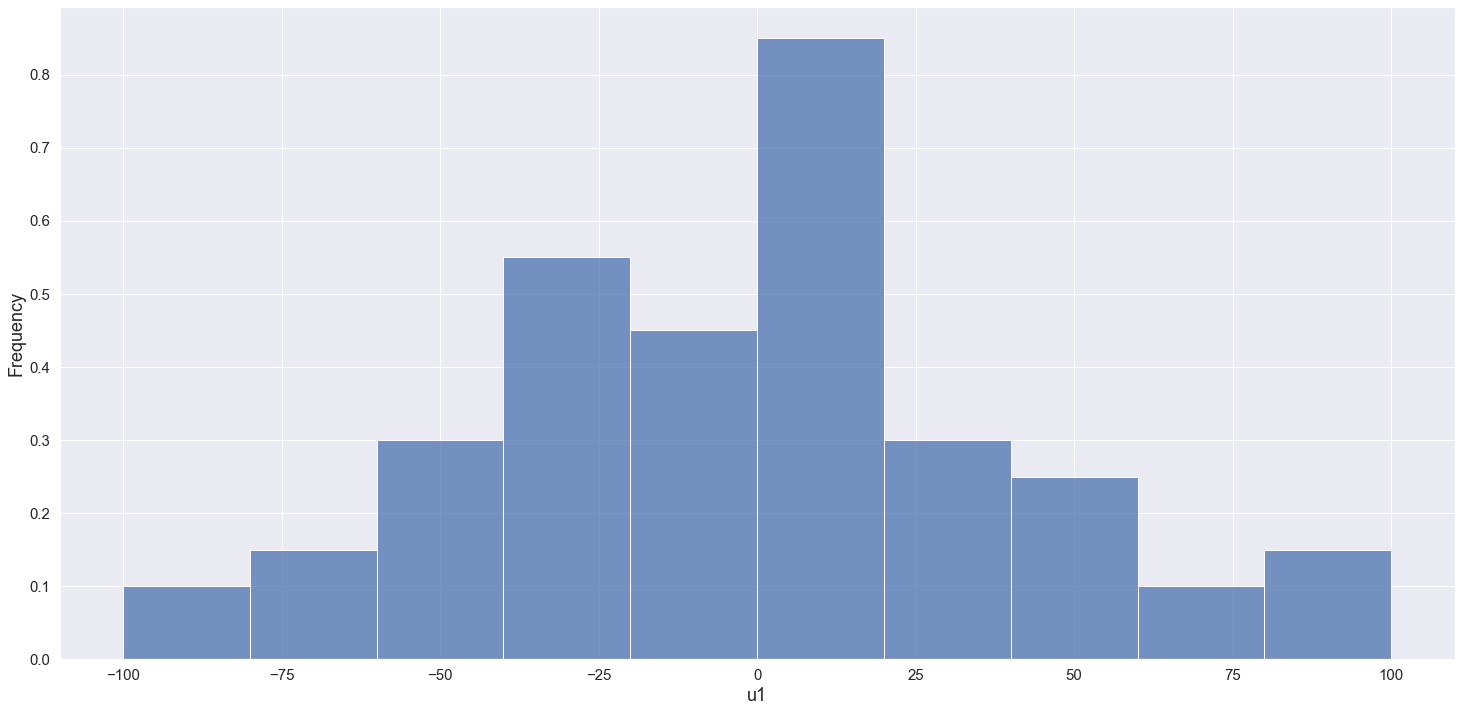

In [56]:
#histograma dos resíduos
sns.histplot(x = 'u1', data = data, stat = 'frequency', binrange = (-100,100));

In [57]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data['u1'])
jb

(0.5594048565247834,
 0.7560086748021702,
 0.22757474140642056,
 2.948855406033511)

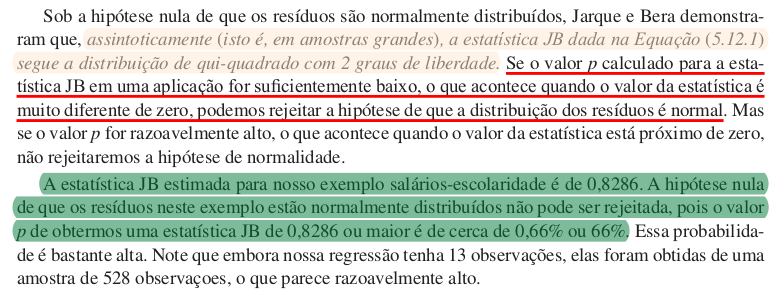

In [58]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [59]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.7321316498990778
0.6934571529252757


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

# Seção 7.6 Variáveis padronizadas  

## Passo a passo

In [60]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

In [61]:
data.describe().T

count    mean     std    min    25%    50%     75%      max
observacao  64.00   32.50   18.62   1.00  16.75  32.50   48.25    64.00
mi          64.00  141.50   75.98  12.00  82.00 138.50  192.50   312.00
taf         64.00   51.19   26.01   9.00  29.00  48.00   77.25    95.00
pnbpc       64.00 1401.25 2725.70 120.00 300.00 620.00 1317.50 19830.00
tft         64.00    6.67    9.44   1.69   4.61   6.04    6.62    80.12

In [62]:
mean_y = np.mean(data['mi'] )
std_y = np.std(data['mi'] )
data['mi_std'] = data['mi'].apply( lambda x: (x - mean_y) / std_y )

mean_x2 = np.mean(data['pnbpc'] )
std_x2  = np.std(data['pnbpc'] )
data['pnbpc_std'] = data['pnbpc'].apply( lambda x: (x - mean_x2) / std_x2 )

mean_x3 = np.mean(data['taf'] )
std_x3  = np.std( data['taf'] )
data['taf_std'] = data['taf'].apply( lambda x: (x - mean_x3) / std_x3 )

print('\nMédia pnbpc: {} +/- Desvio padrão pnbpc:{}'.format(mean_x2,std_x2) )
print('\nMédia taf:   {} +/- Desvio padrão taf:  {}'.format(mean_x3,std_x3) )
print('\nMédia mi:    {} +/- Desvio padrão mi:   {}'.format(mean_y,std_y) )


Média pnbpc: 1401.25 +/- Desvio padrão pnbpc:2704.31743929961

Média taf:   51.1875 +/- Desvio padrão taf:  25.8038726502438

Média mi:    141.5 +/- Desvio padrão mi:   75.38215140203947


In [63]:
data.head(10)

observacao   mi  taf  pnbpc  tft  mi_std  pnbpc_std  taf_std
0           1  128   37   1870 6.66   -0.18       0.17    -0.55
1           2  204   22    130 6.15    0.83      -0.47    -1.13
2           3  202   16    310 7.00    0.80      -0.40    -1.36
3           4  197   65    570 6.25    0.74      -0.31     0.54
4           5   96   76   2050 3.81   -0.60       0.24     0.96
5           6  209   26    200 6.44    0.90      -0.44    -0.98
6           7  170   45    670 6.19    0.38      -0.27    -0.24
7           8  240   29    300 5.89    1.31      -0.41    -0.86
8           9  241   11    120 5.89    1.32      -0.47    -1.56
9          10   55   55    290 2.36   -1.15      -0.41     0.15

In [64]:
print(' Regressao  MI (y) =  pnbpc(x2) + taf(x3) + u \n')
x = data[['pnbpc_std','taf_std']]
y = data[['mi_std']]
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  pnbpc(x2) + taf(x3) + u 

                                 OLS Regression Results                                
Dep. Variable:                 mi_std   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.698
Method:                 Least Squares   F-statistic:                              75.04
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    2.77e-17
Time:                        06:50:08   Log-Likelihood:                         -51.457
No. Observations:                  64   AIC:                                      106.9
Df Residuals:                      62   BIC:                                      111.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      

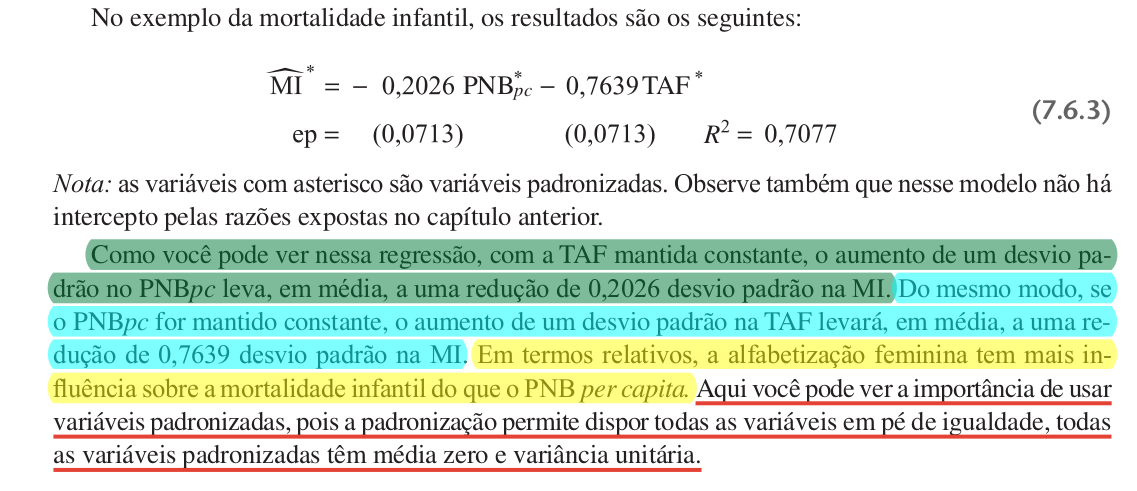

In [65]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.6_1.png')

In [66]:
#calculo dos desvios
data['predict_mi_std'] = model.predict(x)
data['u1'] = model.resid
data.head()

observacao   mi  taf  pnbpc  tft  mi_std  pnbpc_std  taf_std  predict_mi_std    u1
0           1  128   37   1870 6.66   -0.18       0.17    -0.55            0.38 -0.56
1           2  204   22    130 6.15    0.83      -0.47    -1.13            0.96 -0.13
2           3  202   16    310 7.00    0.80      -0.40    -1.36            1.12 -0.32
3           4  197   65    570 6.25    0.74      -0.31     0.54           -0.35  1.08
4           5   96   76   2050 3.81   -0.60       0.24     0.96           -0.78  0.18

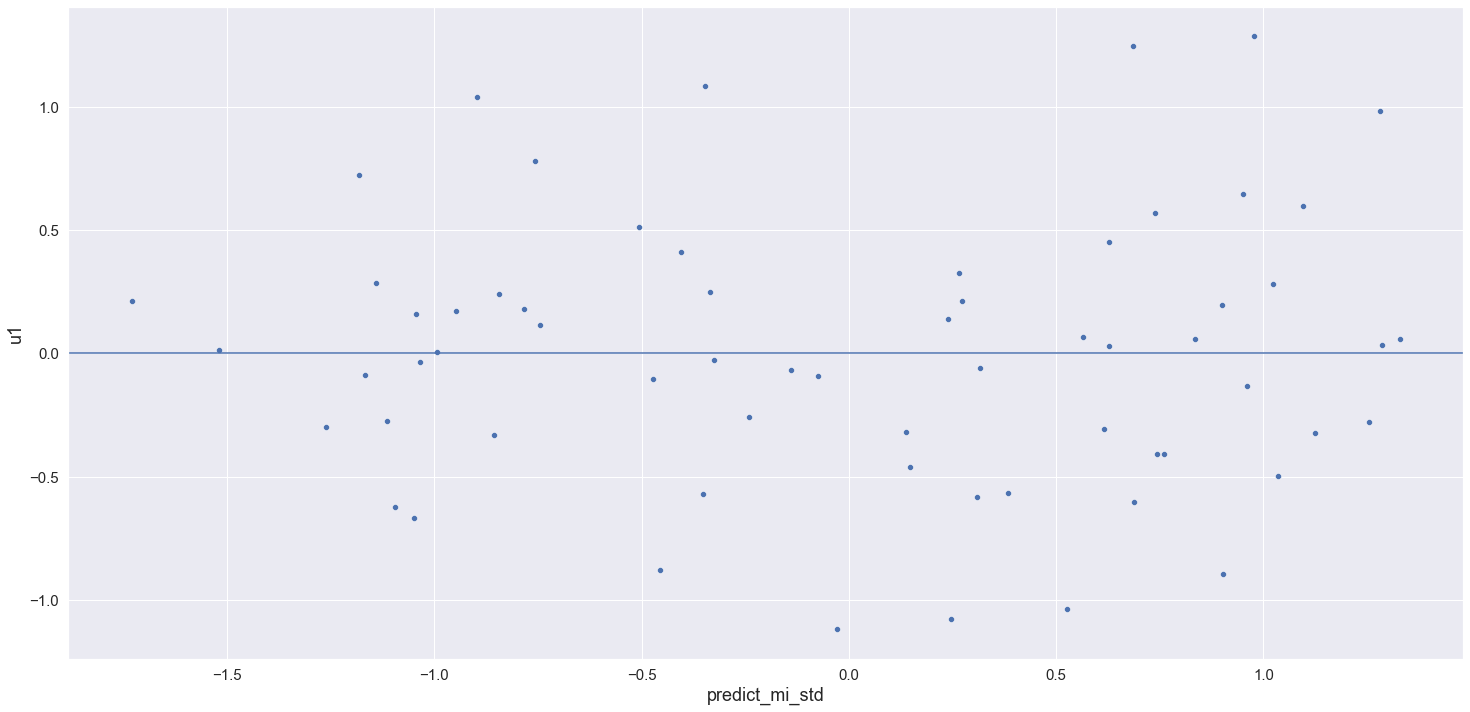

In [67]:
# Dispersão do resíduos
sns.scatterplot(x = 'predict_mi_std', y = 'u1', data = data );
plt.axhline(y=0);

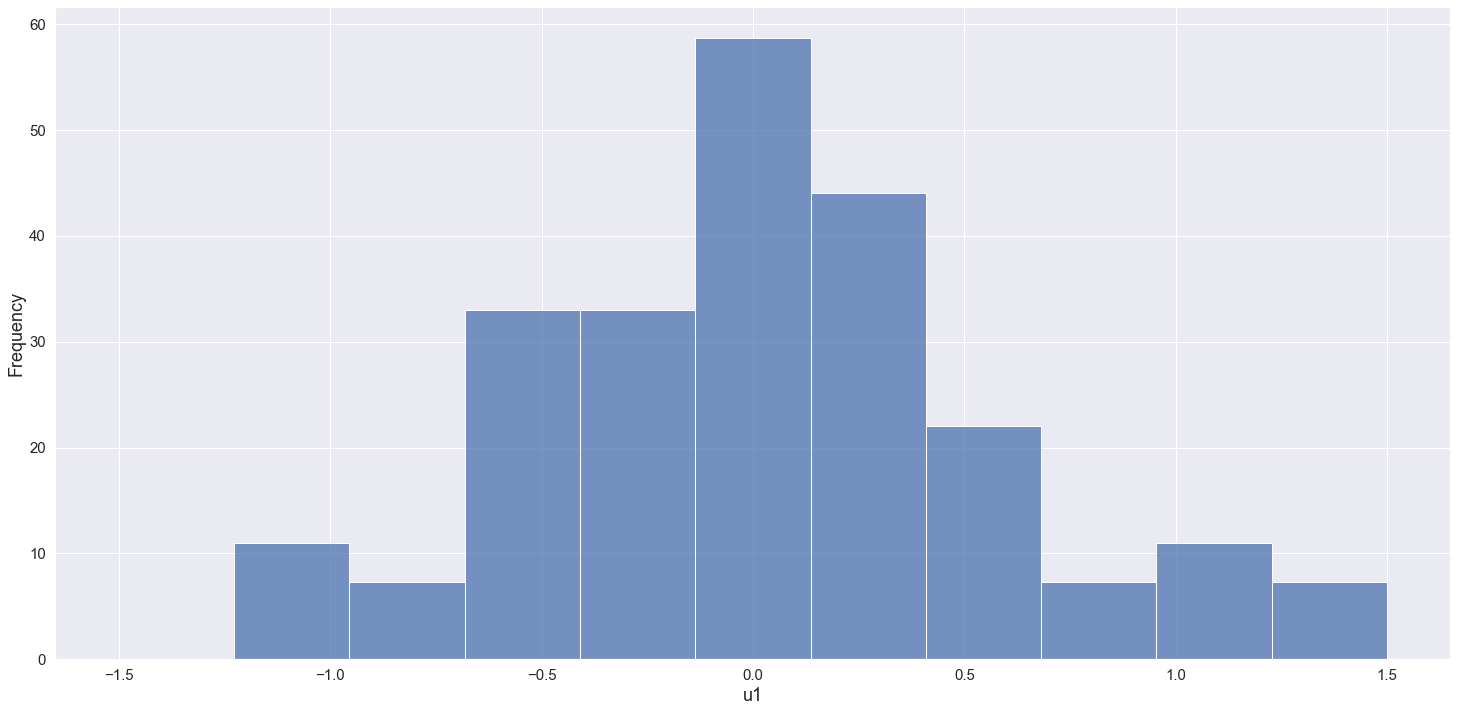

In [68]:
#histograma dos resíduos
sns.histplot( x = 'u1',data = data, stat = 'frequency', binrange = (-1.5,1.5) );

In [69]:
#teste de normalidade Jarque Bera
# from statsmodels.stats.stattools import jarque_bera
# result ( jarque bera statitics value, p-value, skewness, kurtosis)
jb = jarque_bera(data['u1'])
jb

(0.5594048565247892,
 0.7560086748021678,
 0.22757474140642187,
 2.9488554060335126)

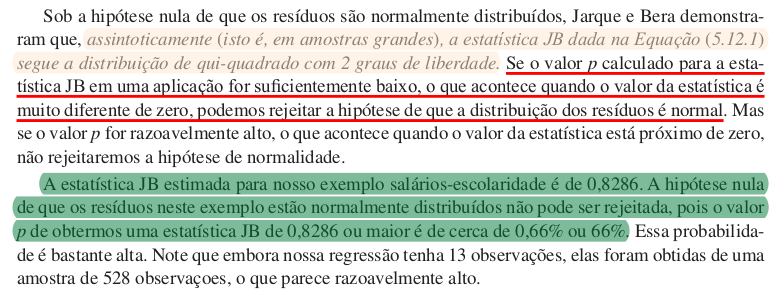

In [70]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [71]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.7321316498990873
0.6934571529252722


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

## Scikit Learn

In [72]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

In [73]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
 
# padronização Mortalidade
x = data['mi'].values.reshape(-1,1)
# standardization 
scaled_data = scale.fit_transform(x) 
data['mi_std'] = scaled_data

# Padronização Produto Nacional Bruto per capita
x = data['pnbpc'].values.reshape(-1,1)
# standardization 
scaled_data = scale.fit_transform(x) 
data['pnbpc_std'] = scaled_data

# Padronização Taxa de alfabetização
x = data['taf'].values.reshape(-1,1)
# standardization 
scaled_data = scale.fit_transform(x) 
data['taf_std'] = scaled_data

data.head()

observacao   mi  taf  pnbpc  tft  mi_std  pnbpc_std  taf_std
0           1  128   37   1870 6.66   -0.18       0.17    -0.55
1           2  204   22    130 6.15    0.83      -0.47    -1.13
2           3  202   16    310 7.00    0.80      -0.40    -1.36
3           4  197   65    570 6.25    0.74      -0.31     0.54
4           5   96   76   2050 3.81   -0.60       0.24     0.96

# Seção 7.7 Introdução ao viés de especificação

## 7.7.1 Regressão Mortalidade Infantil (y) - Produto Nacional Bruto per capita (x)

### Dispersão MI x PNBpc

In [74]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

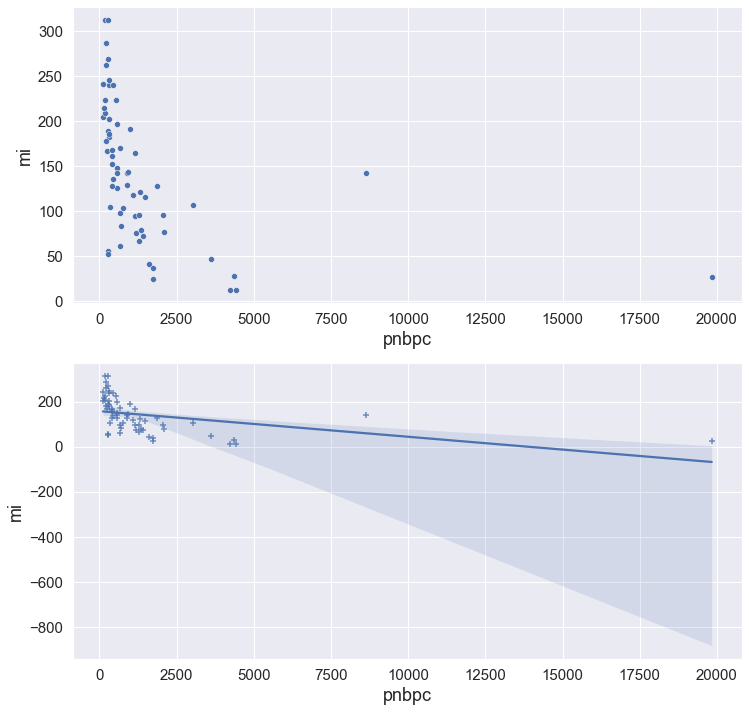

In [75]:
fig = plt.figure( figsize = (12,12))
specs = gridspec.GridSpec( nrows = 2, ncols=1, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[1,0] )
# ax3 = fig.add_subplot( specs[1,0] )
# ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'pnbpc', y = 'mi', data = data, ax = ax1);

sns.regplot( x = 'pnbpc', y = 'mi', data = data, fit_reg = True, marker = '+', ax = ax2);



### Regressão

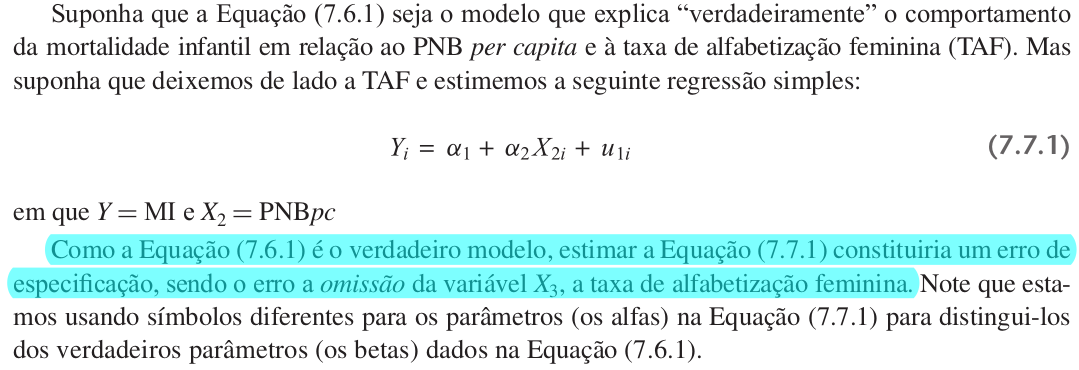

In [76]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.7_1.png')

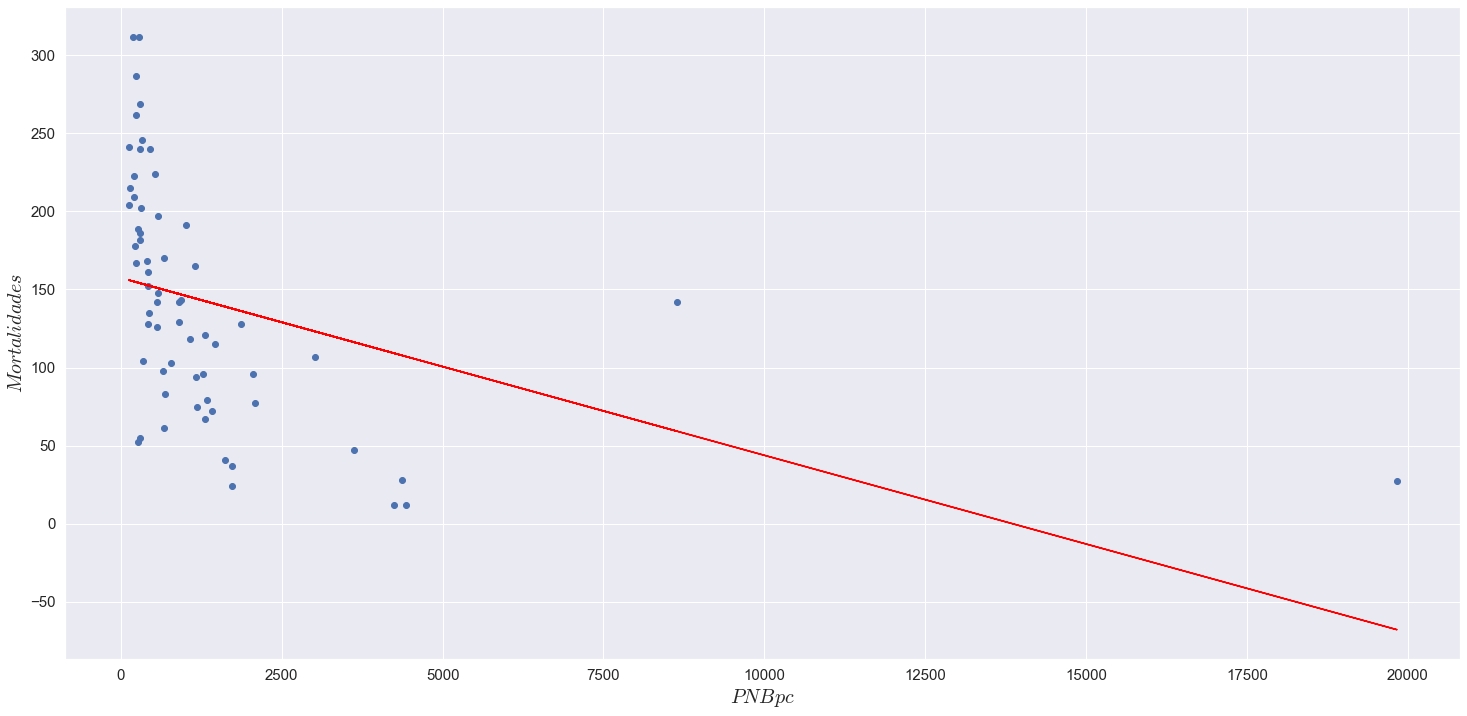

Coeficiente:     [-0.01136445]
Intercepto: [157.42444058]
R2: 0.16621698463986645
R2 ajustado: 0.1527688714888965


In [77]:
#Scikit Learn
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$PNBpc$', fontsize = 20 )
plt.ylabel(r'$Mortalidades$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [78]:
#statsmodels
print('Regressao Mortalidade infantil (y) - PNBpc (x) \n')
x = data.iloc[:,3].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil (y) - PNBpc (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           0.000826
Time:                        06:50:11   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

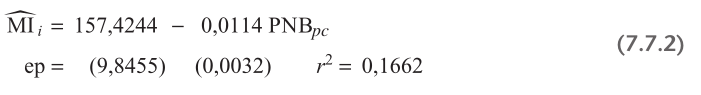

In [79]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.7_2.png')

In [80]:
#valor predito de PNBpc
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      136.17  -8.17
1           2  204   22    130 6.15      155.95  48.05
2           3  202   16    310 7.00      153.90  48.10
3           4  197   65    570 6.25      150.95  46.05
4           5   96   76   2050 3.81      134.13 -38.13
5           6  209   26    200 6.44      155.15  53.85
6           7  170   45    670 6.19      149.81  20.19
7           8  240   29    300 5.89      154.02  85.98
8           9  241   11    120 5.89      156.06  84.94
9          10   55   55    290 2.36      154.13 -99.13

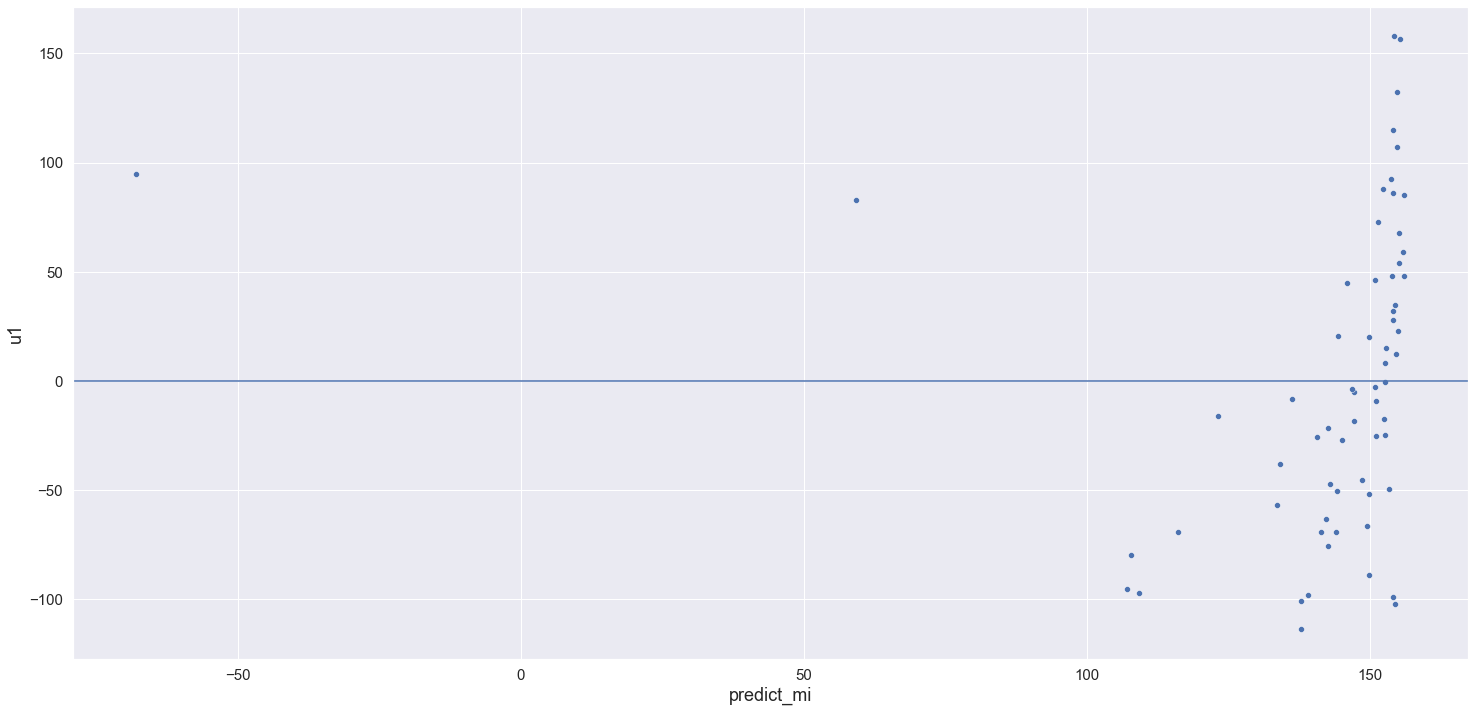

In [81]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_mi', y = 'u1', data = data )
plt.axhline(y=0);

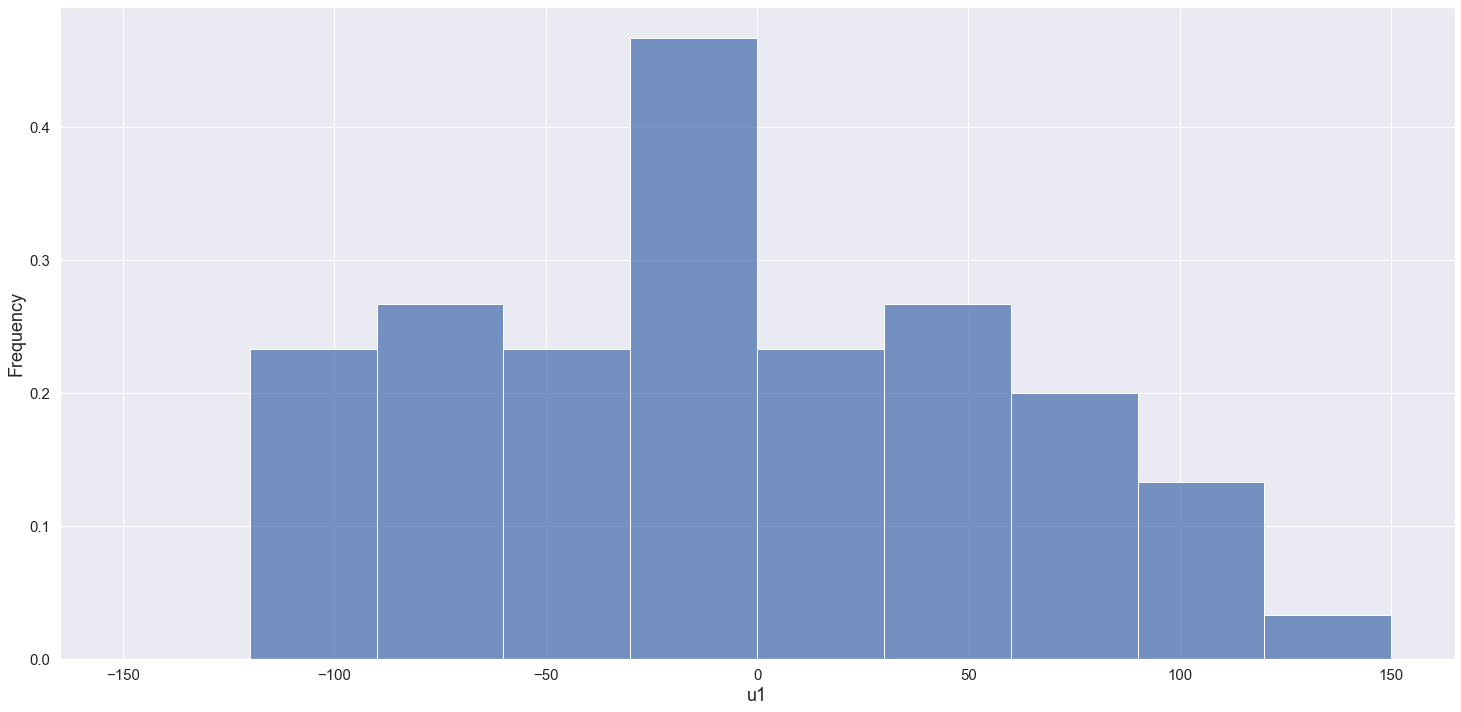

In [82]:
#histograma dos resíduos
sns.histplot( x = 'u1', data = data, stat = 'frequency',bins = 10,binrange = (-150,150));

In [83]:
#Teste de normalidade Jarque Bera
# from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque Bera test statistic, p-value, skewness, kurtosis )
jb = jarque_bera( data['u1'])
jb

(2.5447781998787673,
 0.28016148779509054,
 0.34522584769359527,
 2.308936847103326)

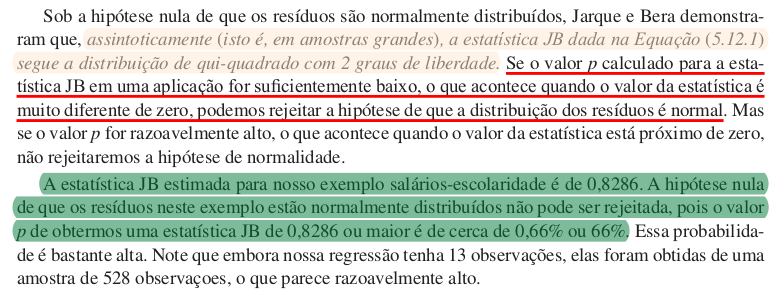

In [84]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [85]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

3.321195705890675
0.19002533892598394


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### Regressão padronizada

In [86]:
mean_y = np.mean(data['mi'] )
std_y = np.std(data['mi'] )
data['mi_std'] = data['mi'].apply( lambda x: (x - mean_y) / std_y )

mean_x2 = np.mean(data['pnbpc'] )
std_x2  = np.std(data['pnbpc'] )
data['pnbpc_std'] = data['pnbpc'].apply( lambda x: (x - mean_x2) / std_x2 )

# mean_x3 = np.mean(data['taf'] )
# std_x3  = np.std( data['taf'] )
# data['taf_std'] = data['taf'].apply( lambda x: (x - mean_x3) / std_x3 )

print(std_x2)
#print(std_x3)
print(std_y)
data.head()

2704.31743929961
75.38215140203947


observacao   mi  taf  pnbpc  tft  predict_mi     u1  mi_std  pnbpc_std
0           1  128   37   1870 6.66      136.17  -8.17   -0.18       0.17
1           2  204   22    130 6.15      155.95  48.05    0.83      -0.47
2           3  202   16    310 7.00      153.90  48.10    0.80      -0.40
3           4  197   65    570 6.25      150.95  46.05    0.74      -0.31
4           5   96   76   2050 3.81      134.13 -38.13   -0.60       0.24

In [87]:
#statsmodels
print('Regressao Mortalidade infantil padronizado (y) - PNBpc padronizado (x) \n')
x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,7].values.reshape(-1,1)
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil padronizado (y) - PNBpc padronizado (x) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.166
Model:                            OLS   Adj. R-squared (uncentered):              0.153
Method:                 Least Squares   F-statistic:                              12.56
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    0.000749
Time:                        06:50:13   Log-Likelihood:                         -84.995
No. Observations:                  64   AIC:                                      172.0
Df Residuals:                      63   BIC:                                      174.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t    

In [88]:
# mi_std (y) = -0,4077 PNBpc_std (x)

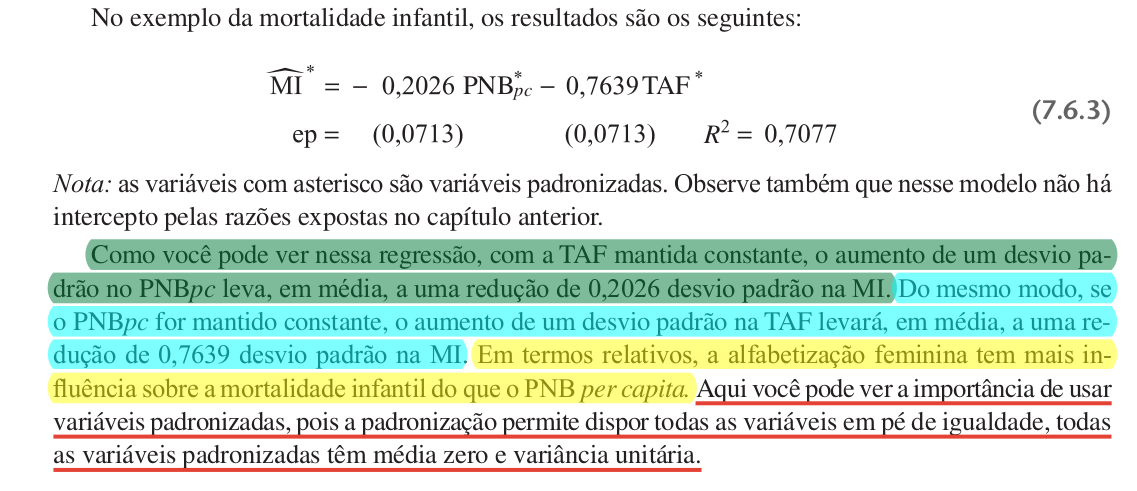

In [89]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.6_1.png')

In [90]:
data['predict_mi_std'] = model.predict(x)
data['u_std'] = model.resid
data.head()

observacao   mi  taf  pnbpc  tft  predict_mi     u1  mi_std  pnbpc_std  predict_mi_std  u_std
0           1  128   37   1870 6.66      136.17  -8.17   -0.18       0.17           -0.07  -0.11
1           2  204   22    130 6.15      155.95  48.05    0.83      -0.47            0.19   0.64
2           3  202   16    310 7.00      153.90  48.10    0.80      -0.40            0.16   0.64
3           4  197   65    570 6.25      150.95  46.05    0.74      -0.31            0.13   0.61
4           5   96   76   2050 3.81      134.13 -38.13   -0.60       0.24           -0.10  -0.51

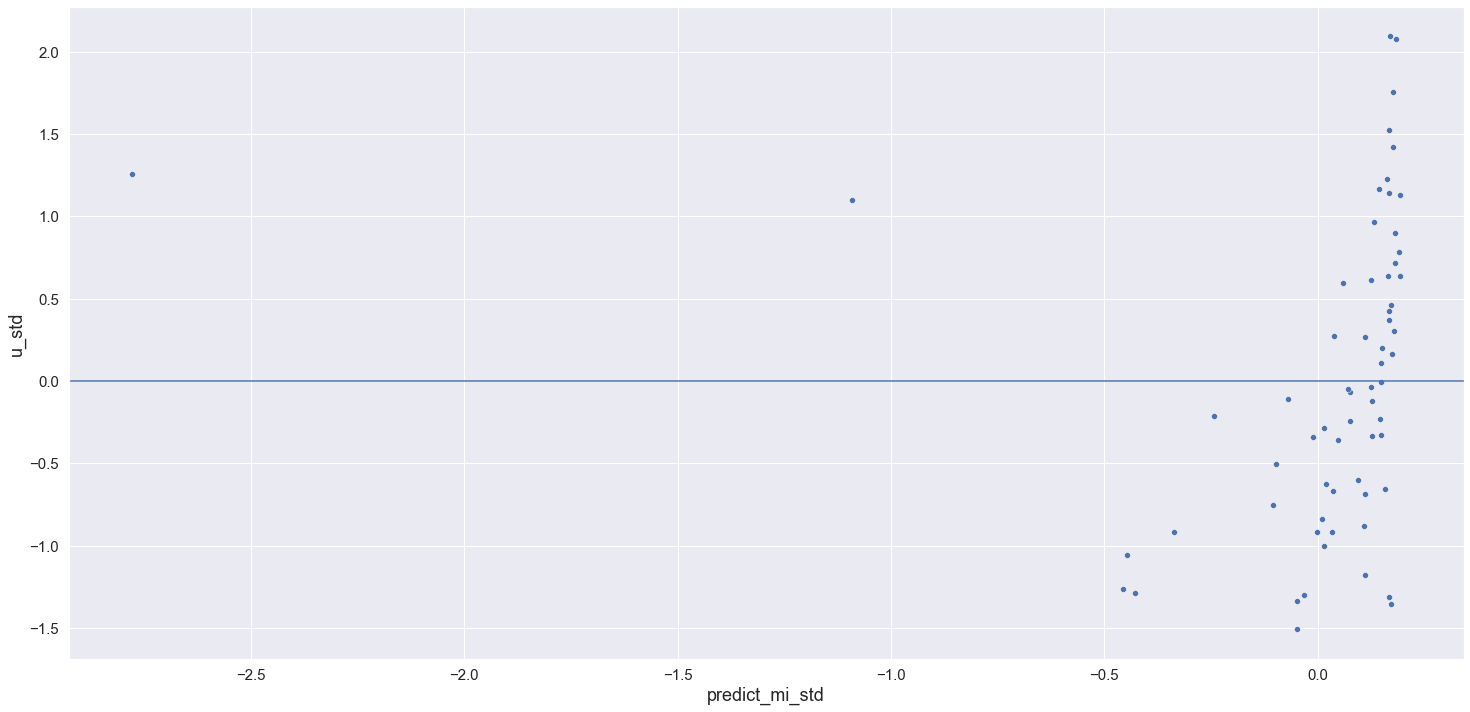

In [91]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_mi_std', y = 'u_std', data = data )
plt.axhline(y=0);

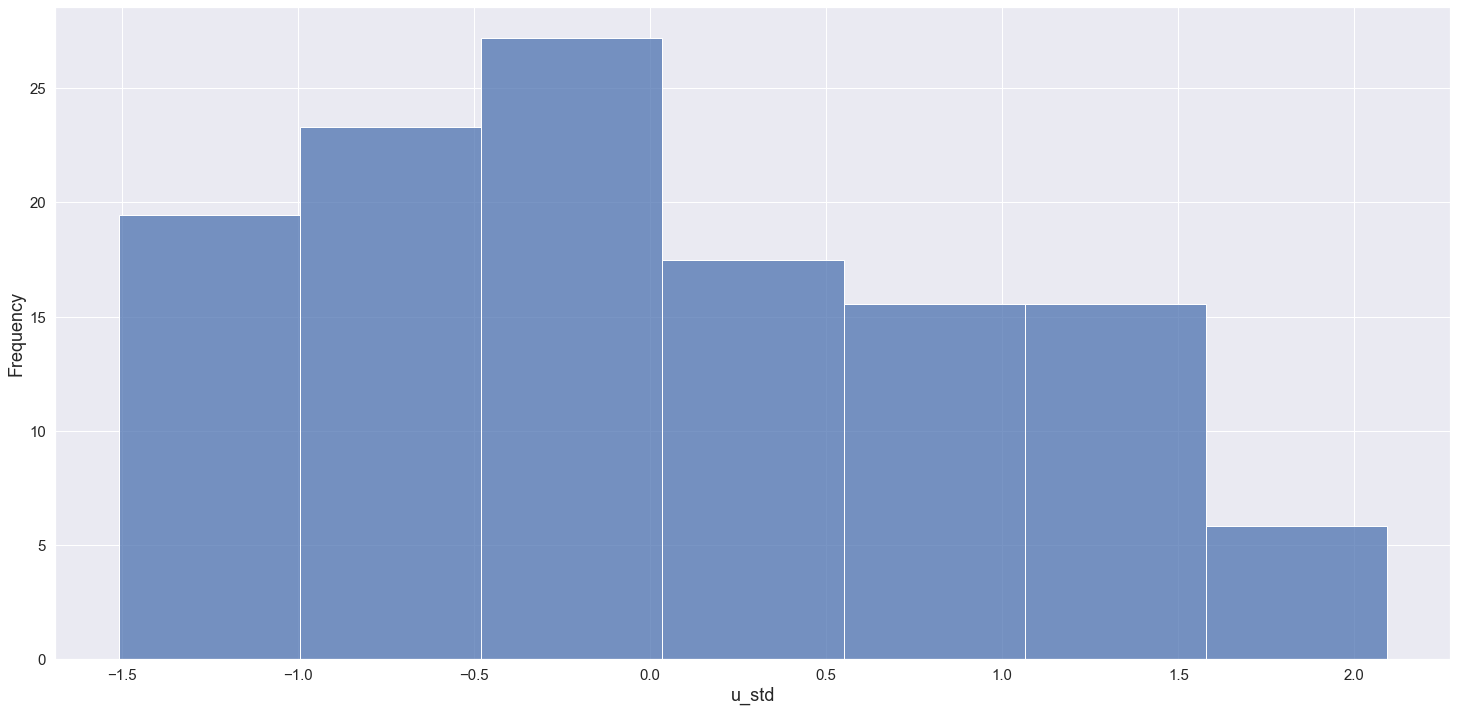

In [92]:
# histograma dos resíduos
sns.histplot(x = 'u_std', data = data, stat = 'frequency');

In [93]:
#teste de normalidade Jarque Bera
# from statsmodels.stats.stattools import jarque_bera
# result ( jarque bera test statistic, p-value, skewness, kurtosis)
jb = jarque_bera(data['u_std'])
jb

(2.544778199878767, 0.28016148779509065, 0.3452258476935952, 2.308936847103326)

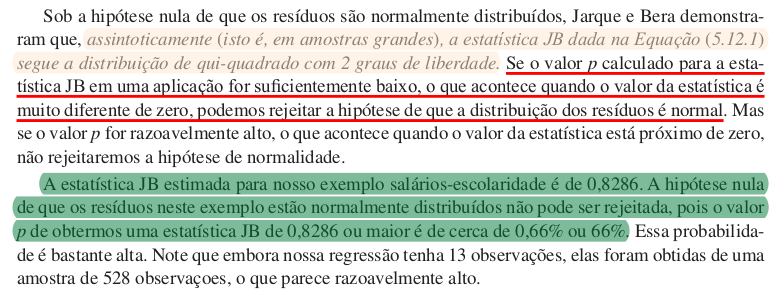

In [94]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [95]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u_std'])
print(stat_test)
print(p_valor)

3.321195705890675
0.19002533892598394


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

## 7.7.2 Regressão Mortalidade Infantil (y) - Taxa de alfabetização Feminina (x)

### Dispersão MI x  TAF

In [96]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

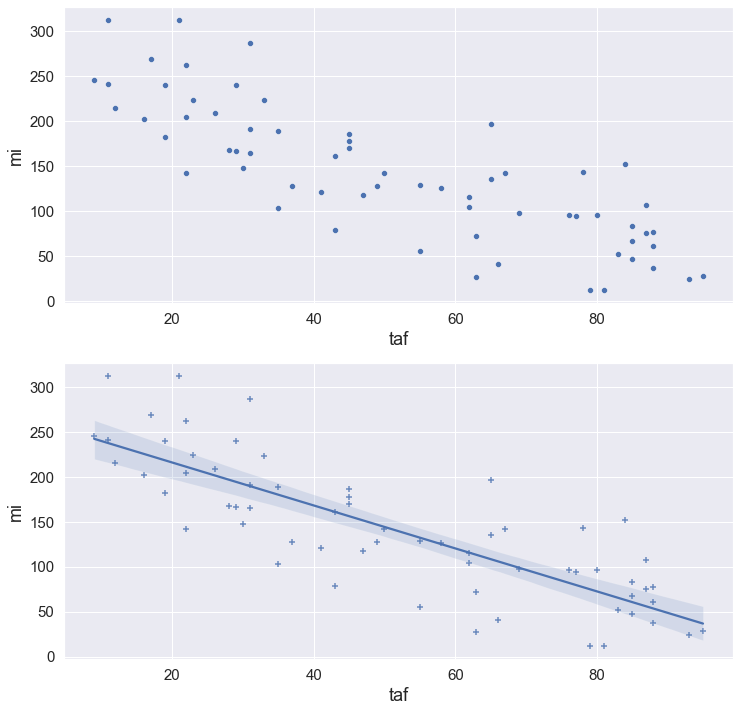

In [97]:
fig = plt.figure( figsize = (12,12))
specs = gridspec.GridSpec( nrows = 2, ncols=1, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[1,0] )
# ax3 = fig.add_subplot( specs[1,0] )
# ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'taf', y = 'mi', data = data, ax = ax1);

sns.regplot( x = 'taf', y = 'mi', data = data, fit_reg = True, marker = '+', ax = ax2);



### Regressão

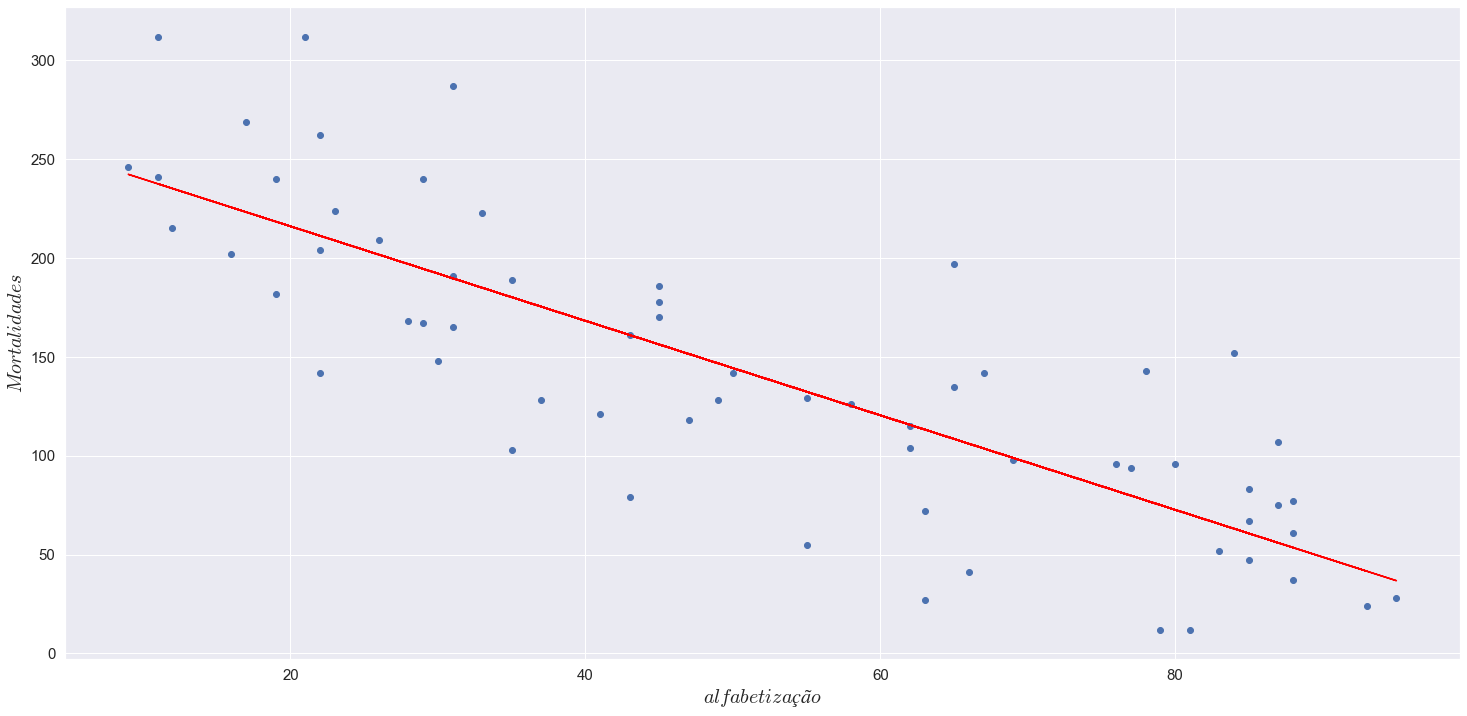

Coeficiente:     [-2.39049603]
Intercepto: [263.8635153]
R2: 0.6695897170291734
R2 ajustado: 0.6642605189167408


In [98]:
#Scikit Learn
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$alfabetização$', fontsize = 20 )
plt.ylabel(r'$Mortalidades$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [99]:
#statsmodels
print('Regressao Mortalidade infantil (y) - Taxa Alfabetizacao (x) \n')
x = data.iloc[:,2].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)
#intercepto
x = sm.add_constant(x)
#Ordinary Least Squares -Minimos quadrados ordinários
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil (y) - Taxa Alfabetizacao (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     125.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.51e-16
Time:                        06:50:16   Log-Likelihood:                -332.02
No. Observations:                  64   AIC:                             668.0
Df Residuals:                      62   BIC:                             672.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

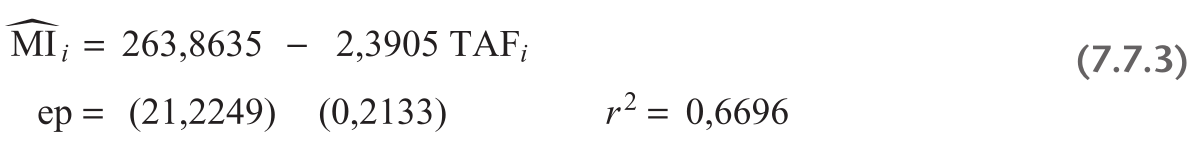

In [100]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.7_3.png')

In [101]:
#previsao MI
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      175.42 -47.42
1           2  204   22    130 6.15      211.27  -7.27
2           3  202   16    310 7.00      225.62 -23.62
3           4  197   65    570 6.25      108.48  88.52
4           5   96   76   2050 3.81       82.19  13.81
5           6  209   26    200 6.44      201.71   7.29
6           7  170   45    670 6.19      156.29  13.71
7           8  240   29    300 5.89      194.54  45.46
8           9  241   11    120 5.89      237.57   3.43
9          10   55   55    290 2.36      132.39 -77.39

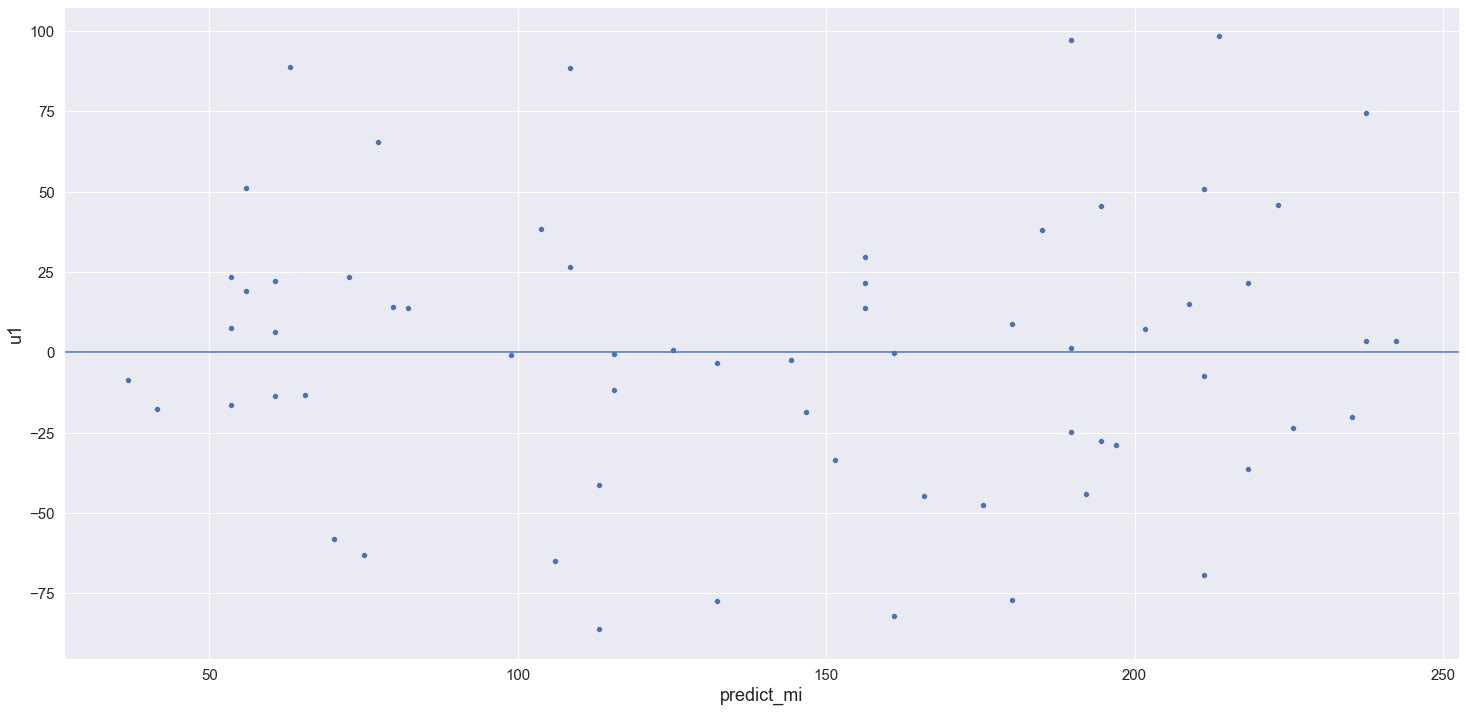

In [102]:
#Dispersao do residuo em funcao do valor predito de MI
sns.scatterplot( x = 'predict_mi', y = 'u1', data = data )
plt.axhline(y=0);

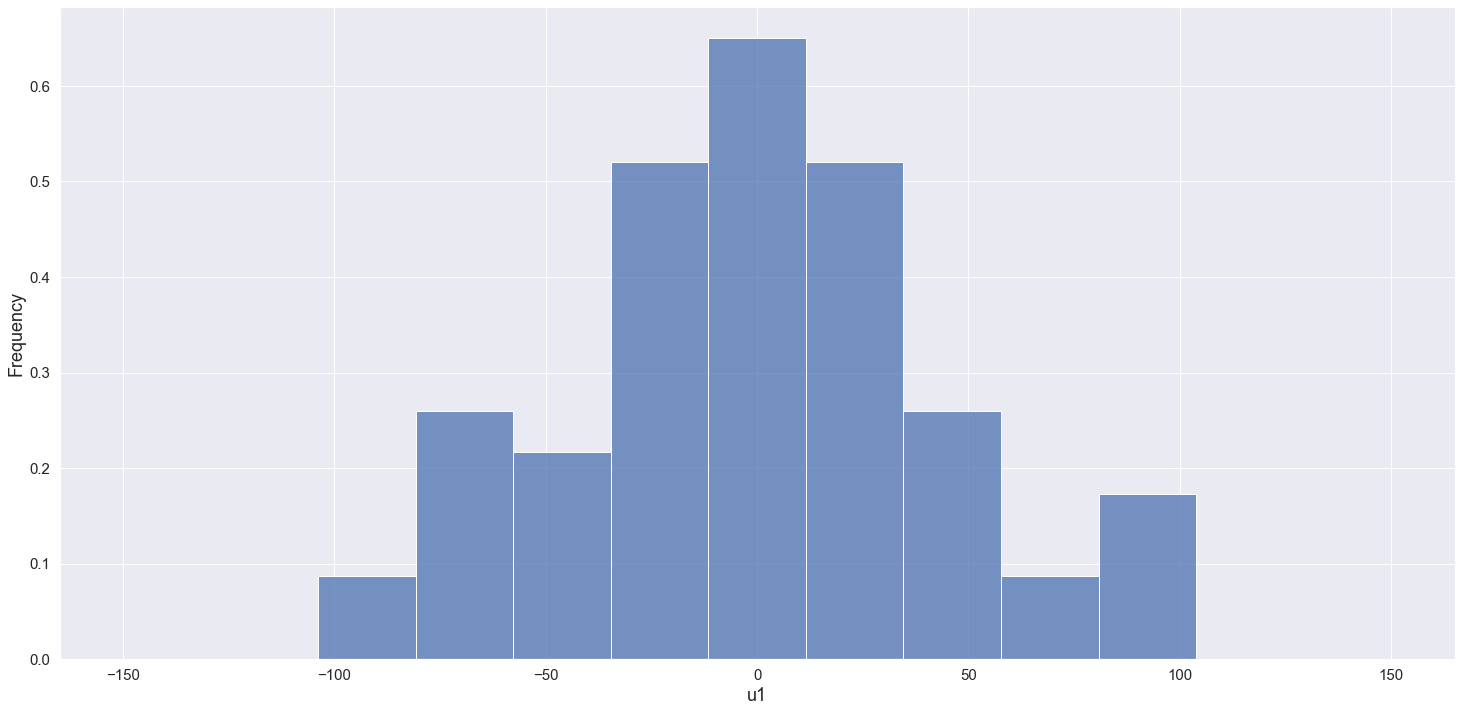

In [103]:
#histograma dos resíduos
sns.histplot( x = 'u1', data = data, stat = 'frequency',bins = 'auto',binrange = (-150,150));

In [104]:
#Teste de normalidade Jarque Bera
# from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque Bera test statistic, p-value, skewness, kurtosis )
jb = jarque_bera( data['u1'])
jb

(0.38722031224881653,
 0.8239790648553152,
 0.17871134184936435,
 2.8678764128896557)

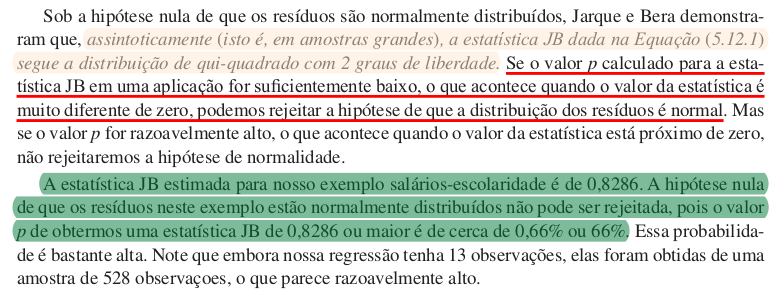

In [105]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [106]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

0.41983671261388456
0.8106504277631887


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### Regressão padronizada

In [107]:
mean_y = np.mean(data['mi'] )
std_y = np.std(data['mi'] )
data['mi_std'] = data['mi'].apply( lambda x: (x - mean_y) / std_y )

# mean_x2 = np.mean(data['pnbpc'] )
# std_x2  = np.std(data['pnbpc'] )
# data['pnbpc_std'] = data['pnbpc'].apply( lambda x: (x - mean_x2) / std_x2 )

mean_x3 = np.mean(data['taf'] )
std_x3  = np.std( data['taf'] )
data['taf_std'] = data['taf'].apply( lambda x: (x - mean_x3) / std_x3 )

#print(std_x2)
print(std_x3)
print(std_y)
data.head()

25.8038726502438
75.38215140203947


observacao   mi  taf  pnbpc  tft  predict_mi     u1  mi_std  taf_std
0           1  128   37   1870 6.66      175.42 -47.42   -0.18    -0.55
1           2  204   22    130 6.15      211.27  -7.27    0.83    -1.13
2           3  202   16    310 7.00      225.62 -23.62    0.80    -1.36
3           4  197   65    570 6.25      108.48  88.52    0.74     0.54
4           5   96   76   2050 3.81       82.19  13.81   -0.60     0.96

In [108]:
#statsmodels
print('Regressao Mortalidade infantil (y) - PNBpc (x) \n')
x = data.iloc[:,8].values.reshape(-1,1)
y = data.iloc[:,7].values.reshape(-1,1)
#x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Mortalidade infantil (y) - PNBpc (x) 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.664
Method:                 Least Squares   F-statistic:                              127.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):                    8.60e-17
Time:                        06:50:17   Log-Likelihood:                         -55.375
No. Observations:                  64   AIC:                                      112.7
Df Residuals:                      63   BIC:                                      114.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025     

In [109]:
# mi_std (y) = -0,8183 taf_std (x)

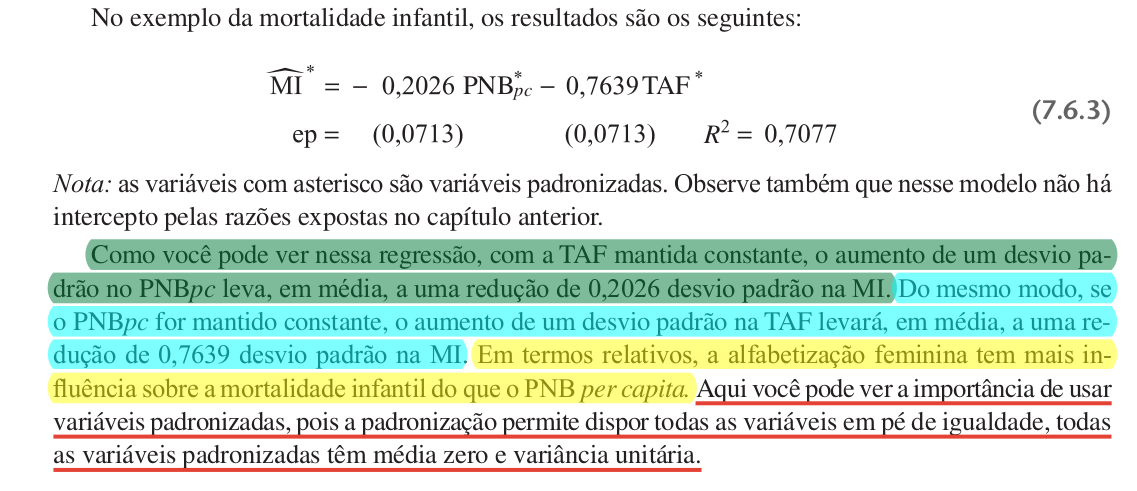

In [110]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.6_1.png')

In [111]:
data['predict_mi_std'] = model.predict(x)
data['u_std'] = model.resid
data.head()

observacao   mi  taf  pnbpc  tft  predict_mi     u1  mi_std  taf_std  predict_mi_std  u_std
0           1  128   37   1870 6.66      175.42 -47.42   -0.18    -0.55            0.45  -0.63
1           2  204   22    130 6.15      211.27  -7.27    0.83    -1.13            0.93  -0.10
2           3  202   16    310 7.00      225.62 -23.62    0.80    -1.36            1.12  -0.31
3           4  197   65    570 6.25      108.48  88.52    0.74     0.54           -0.44   1.17
4           5   96   76   2050 3.81       82.19  13.81   -0.60     0.96           -0.79   0.18

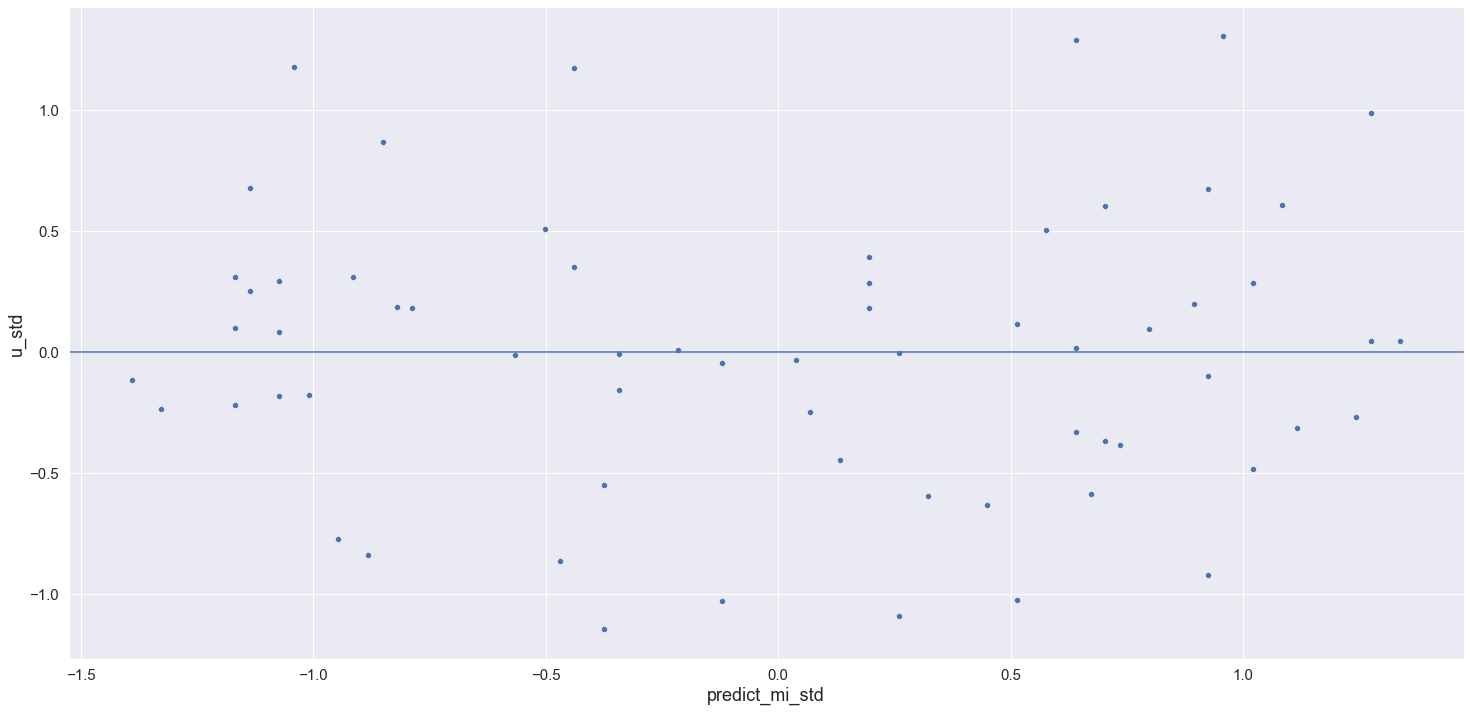

In [112]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_mi_std', y = 'u_std', data = data )
plt.axhline(y=0);

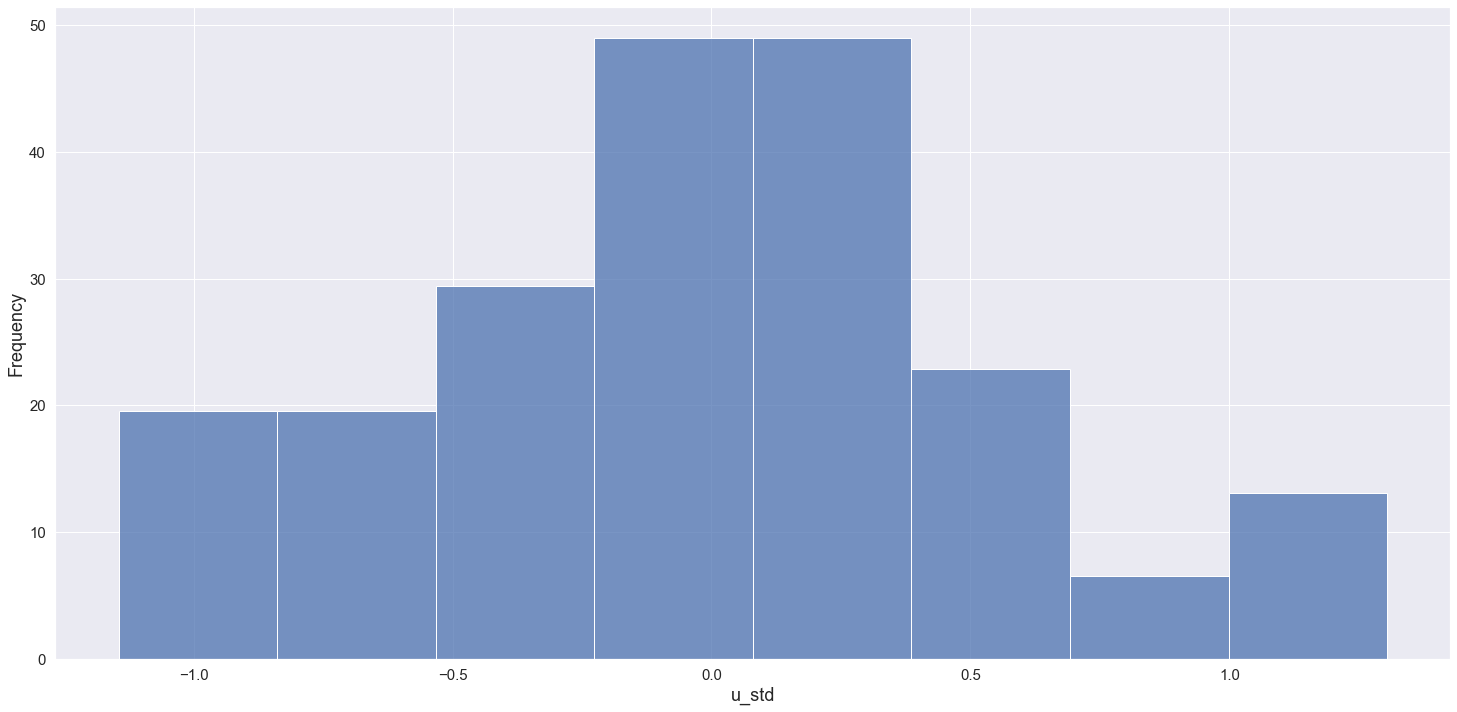

In [113]:
# histograma dos resíduos
sns.histplot(x = 'u_std', data = data, stat = 'frequency');

In [114]:
#teste de normalidade Jarque Bera
# from statsmodels.stats.stattools import jarque_bera
# result ( jarque bera test statistic, p-value, skewness, kurtosis)
jb = jarque_bera(data['u_std'])
jb

(0.3872203122488157,
 0.8239790648553156,
 0.17871134184936396,
 2.867876412889655)

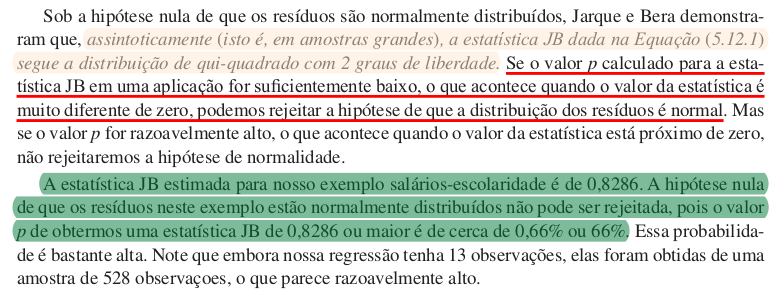

In [115]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [116]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u_std'])
print(stat_test)
print(p_valor)

0.4198367126138827
0.8106504277631894


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

# Exemplo 7.2 - consumo de café

### Dispersão Xícaras (y) x Preço (x)

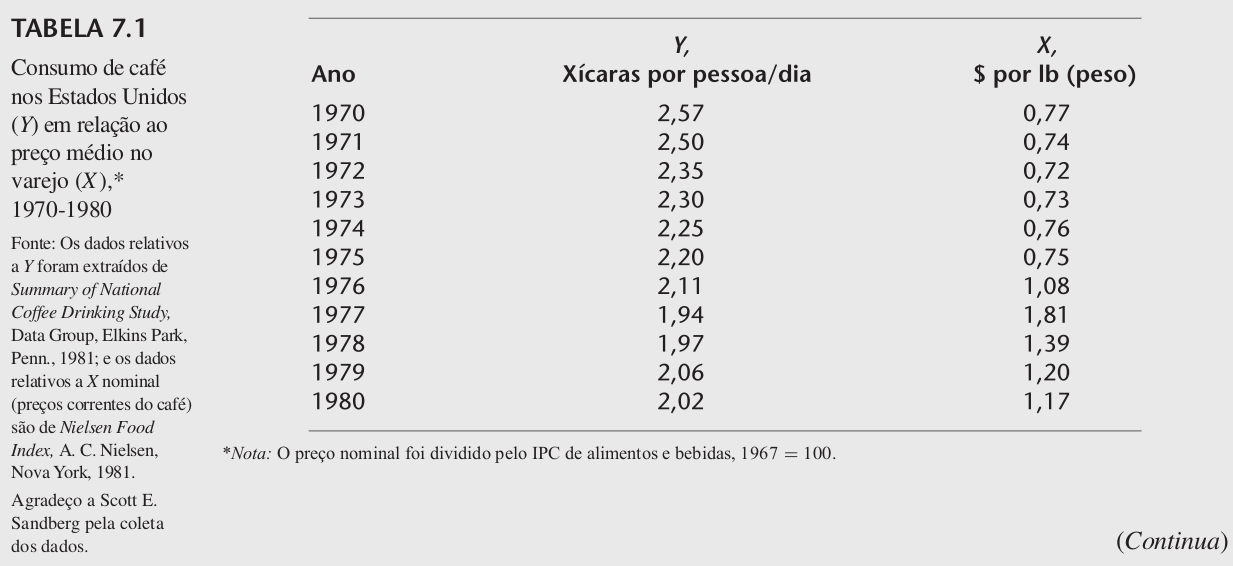

In [117]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_1.png')

In [118]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.1.xlsx')
data

ano  xicaras  $ lb
0   1970     2.57  0.77
1   1971     2.50  0.74
2   1972     2.35  0.72
3   1973     2.30  0.73
4   1974     2.25  0.76
5   1975     2.20  0.75
6   1976     2.11  1.08
7   1977     1.94  1.81
8   1978     1.97  1.39
9   1979     2.06  1.20
10  1980     2.02  1.17

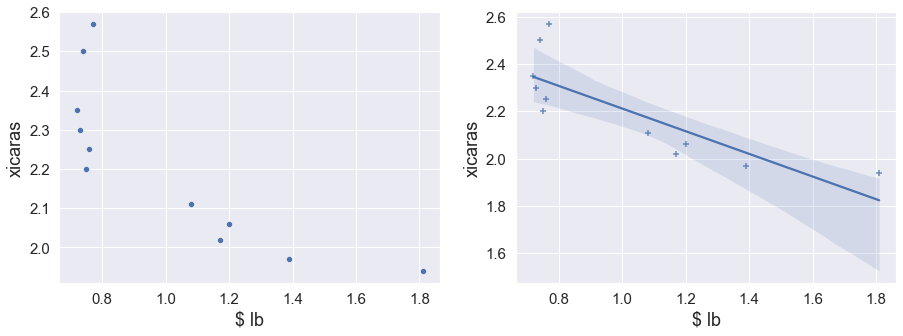

In [119]:
fig = plt.figure( figsize = (15,5))
specs = gridspec.GridSpec( nrows = 1, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
# ax3 = fig.add_subplot( specs[1,0] )
# ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = '$ lb', y = 'xicaras', data = data, ax = ax1);

sns.regplot( x = '$ lb', y = 'xicaras', data = data, fit_reg = True, marker = '+', ax = ax2);

### Regressão xícaras (y) - preço médio café (x)

In [120]:
data_lin = data.copy()
data_lin

ano  xicaras  $ lb
0   1970     2.57  0.77
1   1971     2.50  0.74
2   1972     2.35  0.72
3   1973     2.30  0.73
4   1974     2.25  0.76
5   1975     2.20  0.75
6   1976     2.11  1.08
7   1977     1.94  1.81
8   1978     1.97  1.39
9   1979     2.06  1.20
10  1980     2.02  1.17

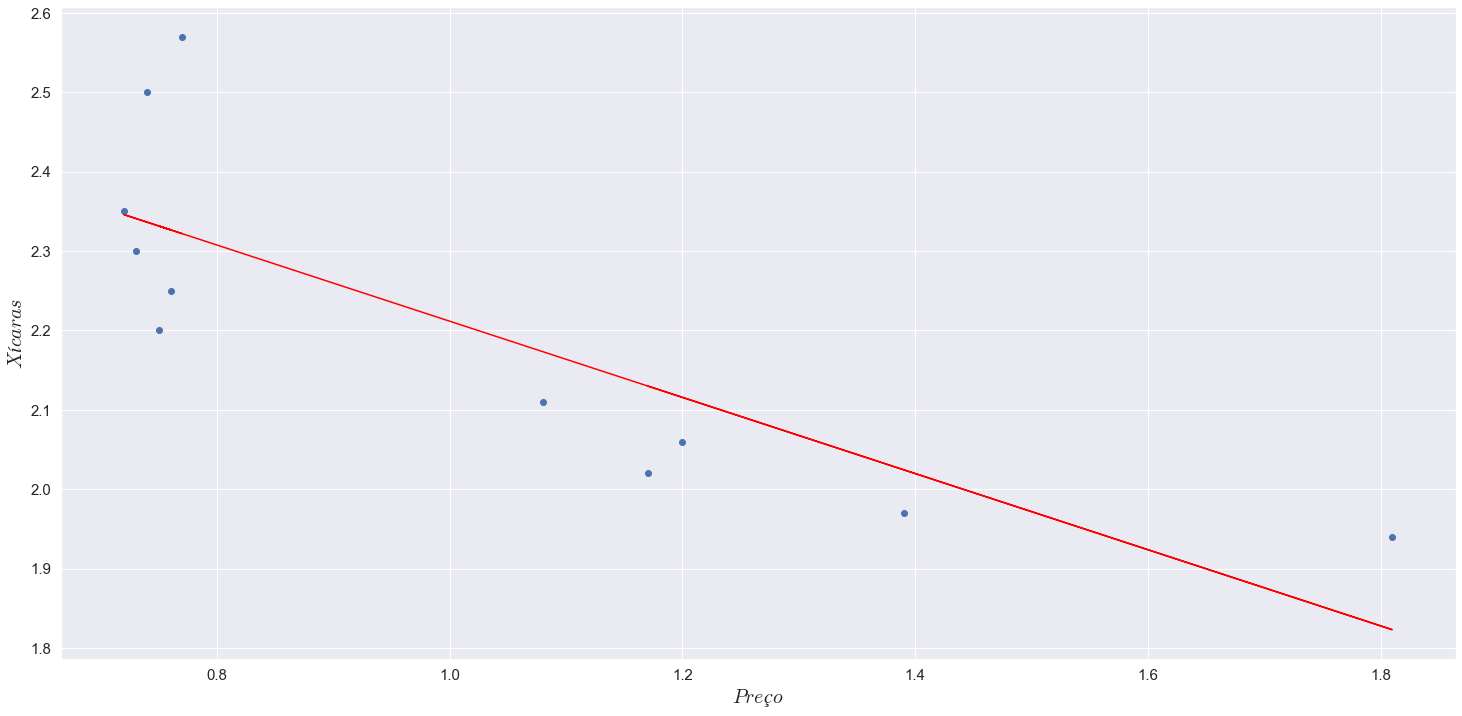

Coeficiente:     [-0.47952908]
Intercepto: [2.69112394]
R2: 0.6627571891783133
R2 ajustado: 0.6252857657536814


In [121]:
#Scikit Learn
x = data_lin.iloc[:,2].values.reshape(-1,1)
y = data_lin.iloc[:,1].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$Preço$', fontsize = 20 )
plt.ylabel(r'$Xícaras$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [122]:
#statsmodels
print('Regressao Xícaras (y) - Preço médio (x) \n')
x = data_lin.iloc[:,2].values.reshape(-1,1)
y = data_lin.iloc[:,1].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Xícaras (y) - Preço médio (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     17.69
Date:                Mon, 13 Jun 2022   Prob (F-statistic):            0.00229
Time:                        06:50:20   Log-Likelihood:                 8.0481
No. Observations:                  11   AIC:                            -12.10
Df Residuals:                       9   BIC:                            -11.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


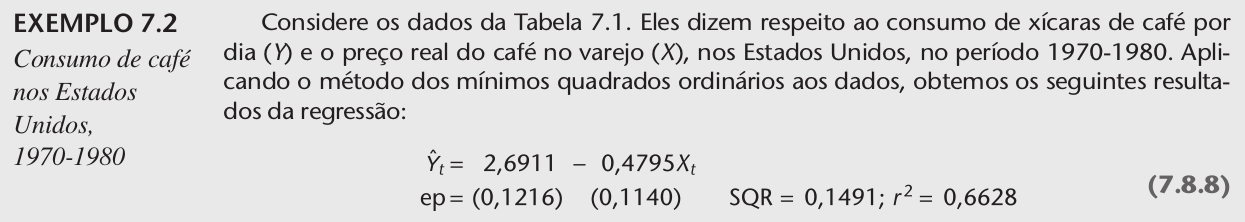

In [123]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_2.png')

In [124]:
#valor predito de PNBpc
data_lin['predict_xicaras'] = model.predict(x)
data_lin['u1'] = model.resid
data_lin.head(10)

ano  xicaras  $ lb  predict_xicaras    u1
0  1970     2.57  0.77             2.32  0.25
1  1971     2.50  0.74             2.34  0.16
2  1972     2.35  0.72             2.35  0.00
3  1973     2.30  0.73             2.34 -0.04
4  1974     2.25  0.76             2.33 -0.08
5  1975     2.20  0.75             2.33 -0.13
6  1976     2.11  1.08             2.17 -0.06
7  1977     1.94  1.81             1.82  0.12
8  1978     1.97  1.39             2.02 -0.05
9  1979     2.06  1.20             2.12 -0.06

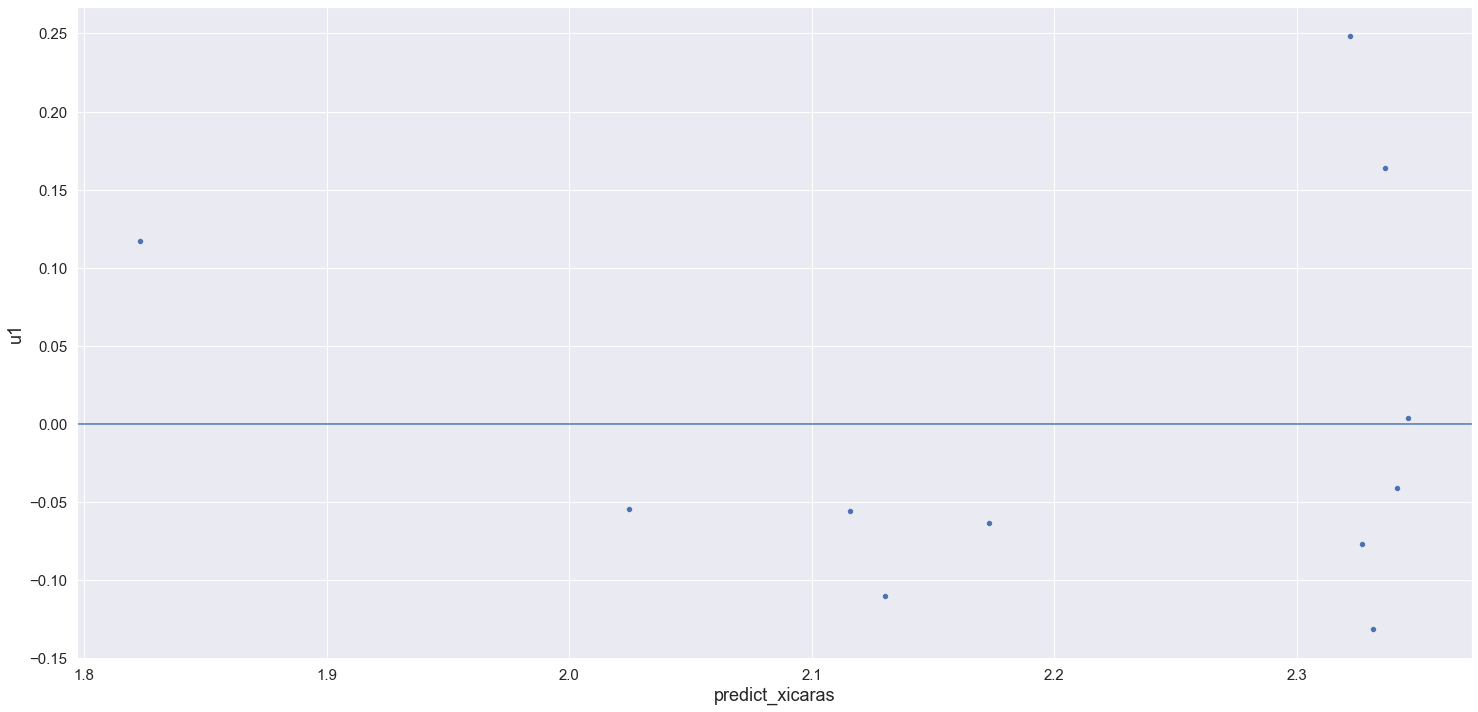

In [125]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_xicaras', y = 'u1', data = data_lin )
plt.axhline(y=0);

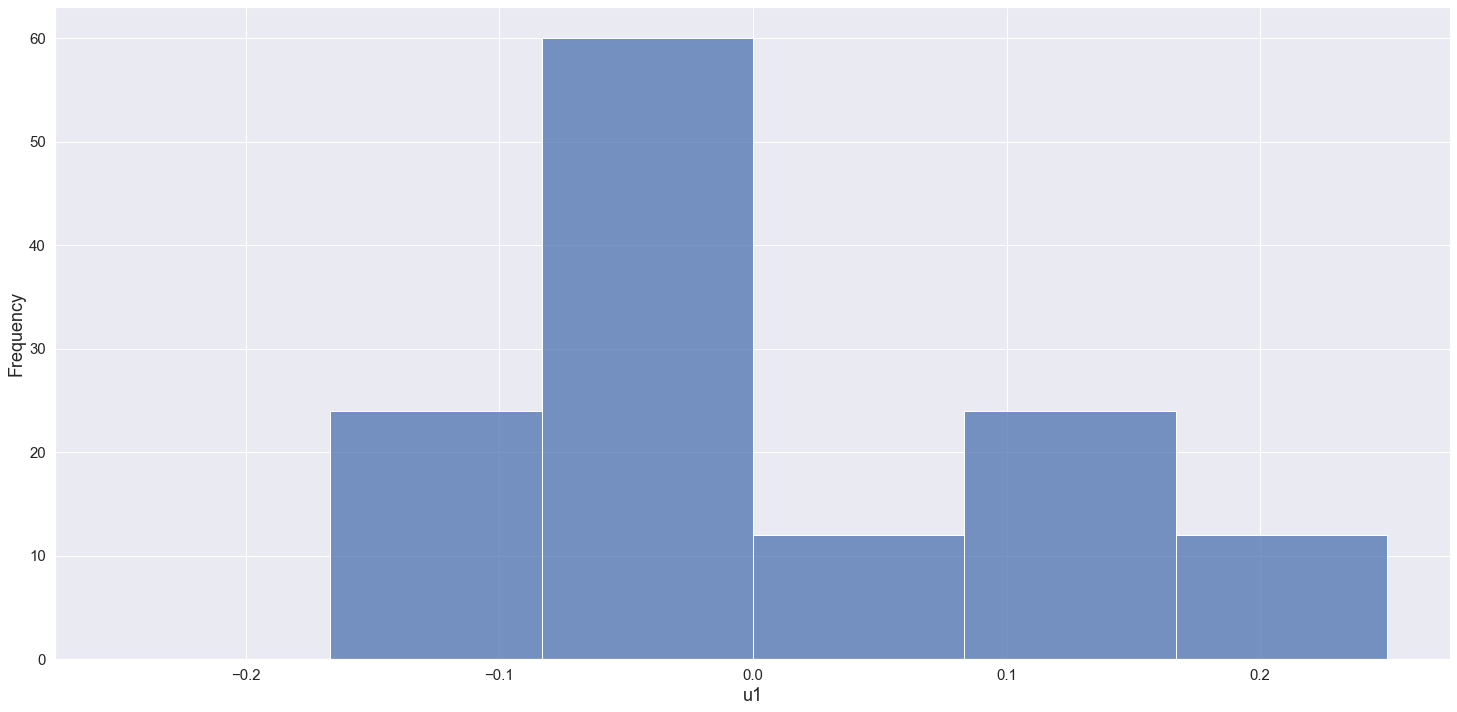

In [126]:
#histograma dos resíduos
sns.histplot( x = 'u1', data = data_lin, stat = 'frequency', binrange = (-0.25,0.25) );

In [127]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data_lin['u1'])
print(stat_test)
print(p_valor)

2.944438655513125
0.22941577099614624


/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### Regressão Log-Log - xícaras (ln y) - preço médio café ( ln x)

In [128]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.1.xlsx')
data

ano  xicaras  $ lb
0   1970     2.57  0.77
1   1971     2.50  0.74
2   1972     2.35  0.72
3   1973     2.30  0.73
4   1974     2.25  0.76
5   1975     2.20  0.75
6   1976     2.11  1.08
7   1977     1.94  1.81
8   1978     1.97  1.39
9   1979     2.06  1.20
10  1980     2.02  1.17

In [129]:
# dataset Log-Log
data_log_log = data.copy()
data_log_log['ln_xicaras'] = np.log( data_log_log['xicaras'] )
data_log_log['ln_$'] = np.log( data_log_log['$ lb'])
data_log_log

ano  xicaras  $ lb  ln_xicaras  ln_$
0   1970     2.57  0.77        0.94 -0.26
1   1971     2.50  0.74        0.92 -0.30
2   1972     2.35  0.72        0.85 -0.33
3   1973     2.30  0.73        0.83 -0.31
4   1974     2.25  0.76        0.81 -0.27
5   1975     2.20  0.75        0.79 -0.29
6   1976     2.11  1.08        0.75  0.08
7   1977     1.94  1.81        0.66  0.59
8   1978     1.97  1.39        0.68  0.33
9   1979     2.06  1.20        0.72  0.18
10  1980     2.02  1.17        0.70  0.16

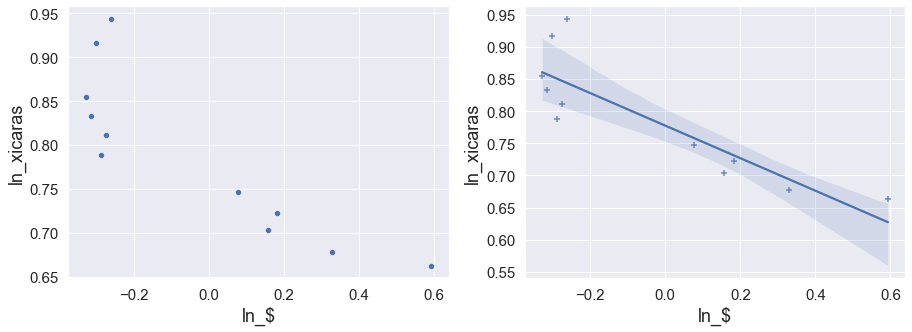

In [130]:
fig = plt.figure( figsize = (15,5))
specs = gridspec.GridSpec( nrows = 1, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
# ax3 = fig.add_subplot( specs[1,0] )
# ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'ln_$', y = 'ln_xicaras', data = data_log_log, ax = ax1);

sns.regplot( x = 'ln_$', y = 'ln_xicaras', data = data_log_log, fit_reg = True, marker = '+', ax = ax2);

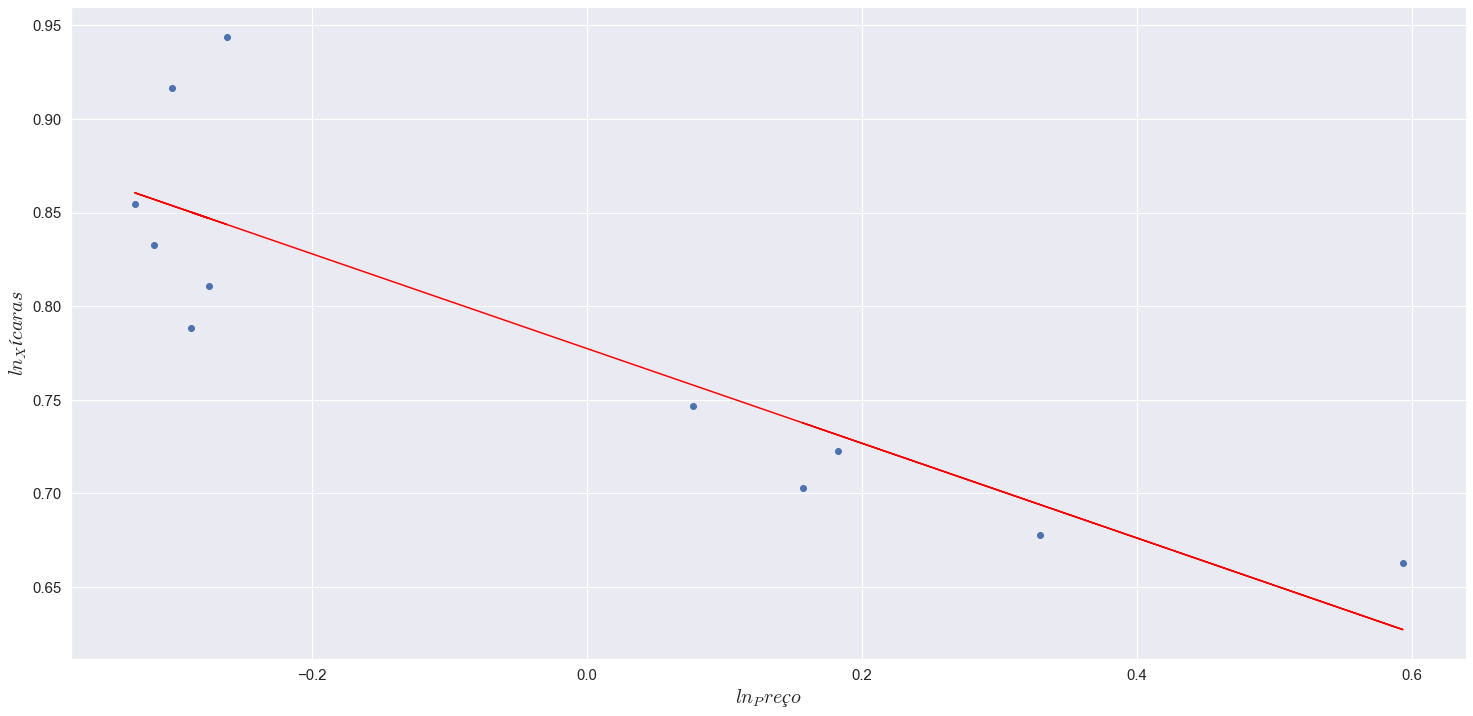

Coeficiente:     [-0.25304612]
Intercepto: [0.77741759]
R2: 0.744800380408164
R2 ajustado: 0.7164448671201822


In [131]:
#Scikit Learn
x = data_log_log.iloc[:,4].values.reshape(-1,1)
y = data_log_log.iloc[:,3].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)

plt.scatter(x,y);
plt.plot(x,y_pred, color = 'red');
plt.xlabel( r'$ln_Preço$', fontsize = 20 )
plt.ylabel(r'$ln_Xícaras$', fontsize = 20 )
plt.show();

print("Coeficiente:    ", lr.coef_[0])
print("Intercepto:", lr.intercept_)
print("R2:", lr.score(x, y) )
print("R2 ajustado:" ,1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1) )

In [132]:
#statsmodels
print('Regressao Xícaras (y) - Preço médio (x) \n')
x = data_log_log.iloc[:,4].values.reshape(-1,1)
y = data_log_log.iloc[:,3].values.reshape(-1,1)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

Regressao Xícaras (y) - Preço médio (x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     26.27
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           0.000624
Time:                        06:50:24   Log-Likelihood:                 18.416
No. Observations:                  11   AIC:                            -32.83
Df Residuals:                       9   BIC:                            -32.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


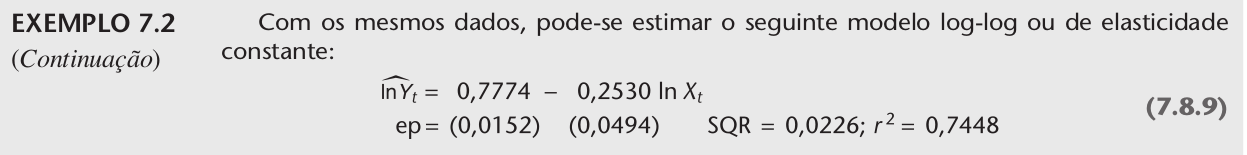

In [133]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_3.png')

In [134]:
#valor predito de PNBpc
data_log_log['predict_ln_xicaras'] = model.predict(x)
data_log_log['u1_ln'] = model.resid
data_log_log

ano  xicaras  $ lb  ln_xicaras  ln_$  predict_ln_xicaras  u1_ln
0   1970     2.57  0.77        0.94 -0.26                0.84   0.10
1   1971     2.50  0.74        0.92 -0.30                0.85   0.06
2   1972     2.35  0.72        0.85 -0.33                0.86  -0.01
3   1973     2.30  0.73        0.83 -0.31                0.86  -0.02
4   1974     2.25  0.76        0.81 -0.27                0.85  -0.04
5   1975     2.20  0.75        0.79 -0.29                0.85  -0.06
6   1976     2.11  1.08        0.75  0.08                0.76  -0.01
7   1977     1.94  1.81        0.66  0.59                0.63   0.04
8   1978     1.97  1.39        0.68  0.33                0.69  -0.02
9   1979     2.06  1.20        0.72  0.18                0.73  -0.01
10  1980     2.02  1.17        0.70  0.16                0.74  -0.03

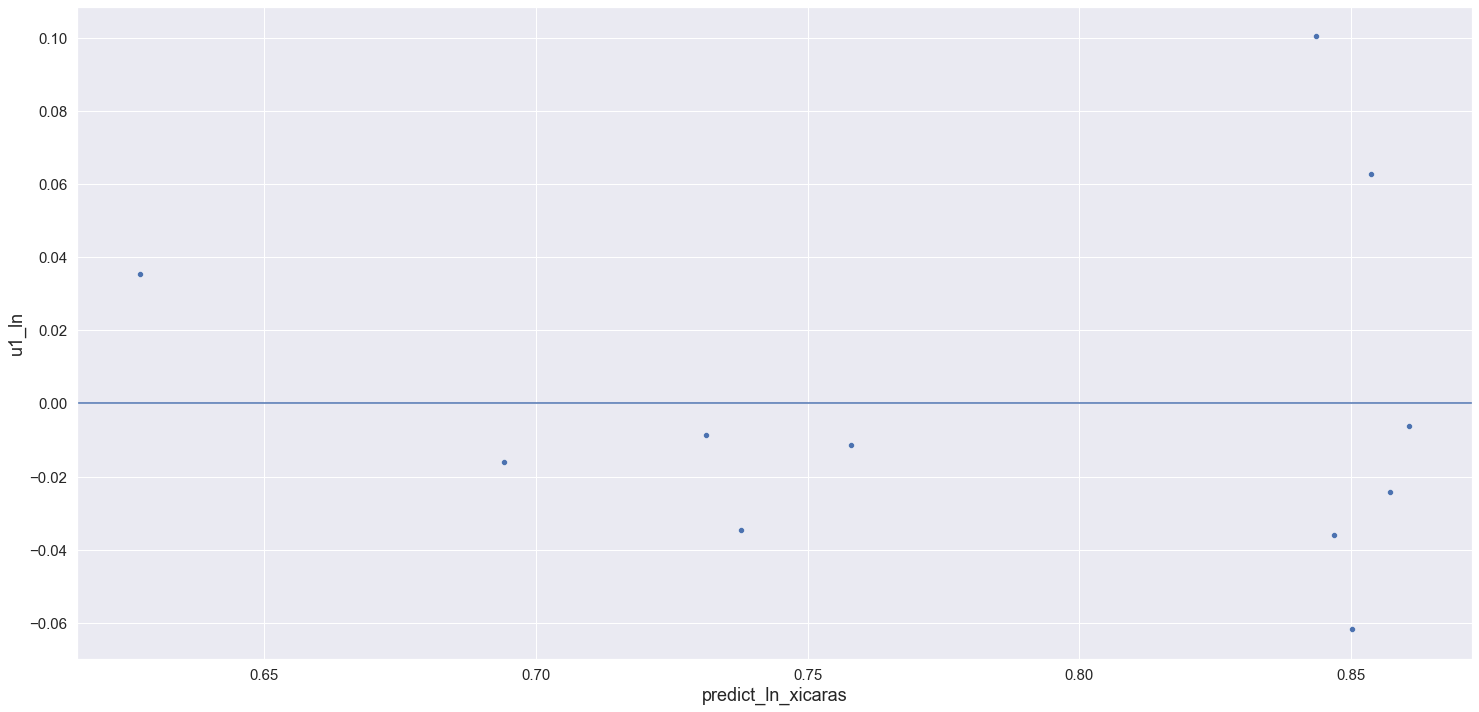

In [135]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_ln_xicaras', y = 'u1_ln', data = data_log_log )
plt.axhline(y=0);

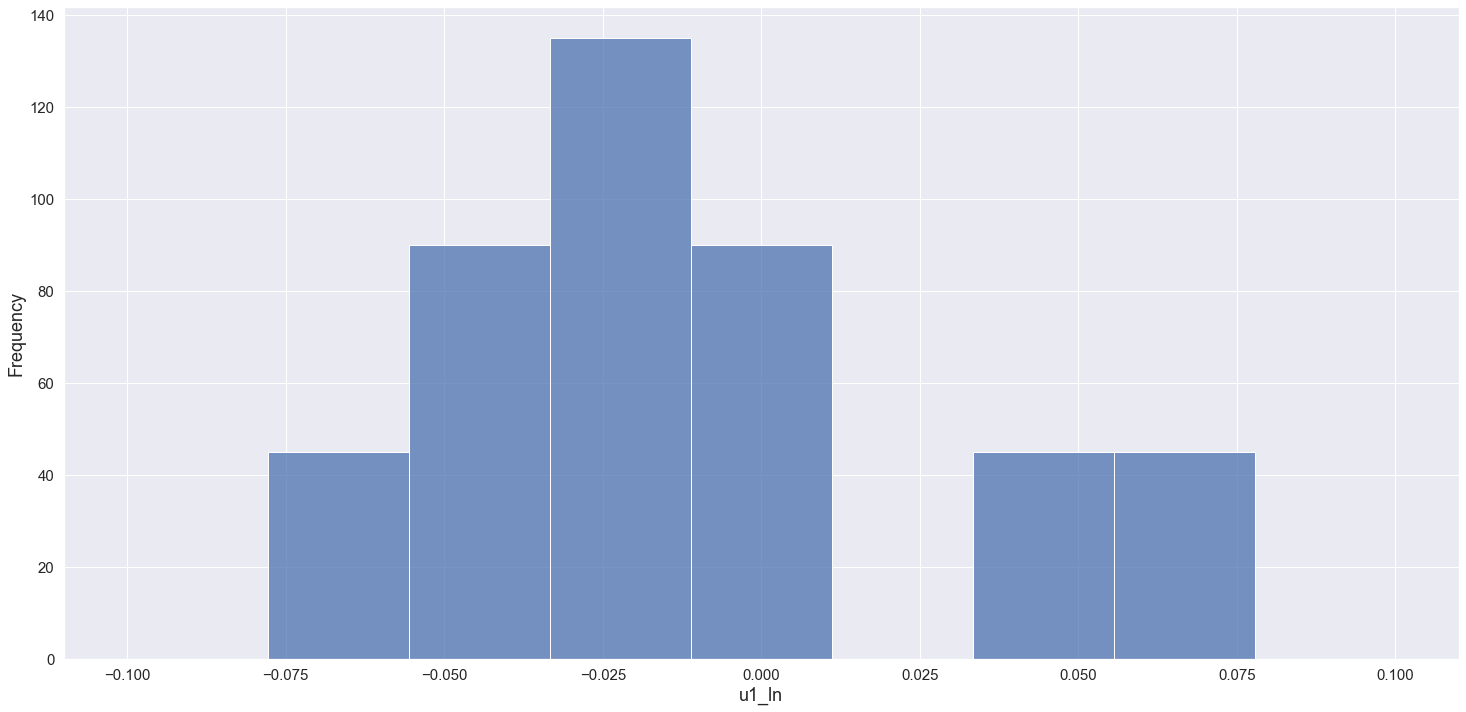

In [136]:
sns.histplot( x = 'u1_ln',data = data_log_log, stat = 'frequency', binrange = (-0.10, 0.10));

In [137]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data_log_log['u1_ln'])
print(stat_test)
print(p_valor)

3.2841872647616226
0.1935743442326076


/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### r2 -- Coeficientes de Determinação obtidos

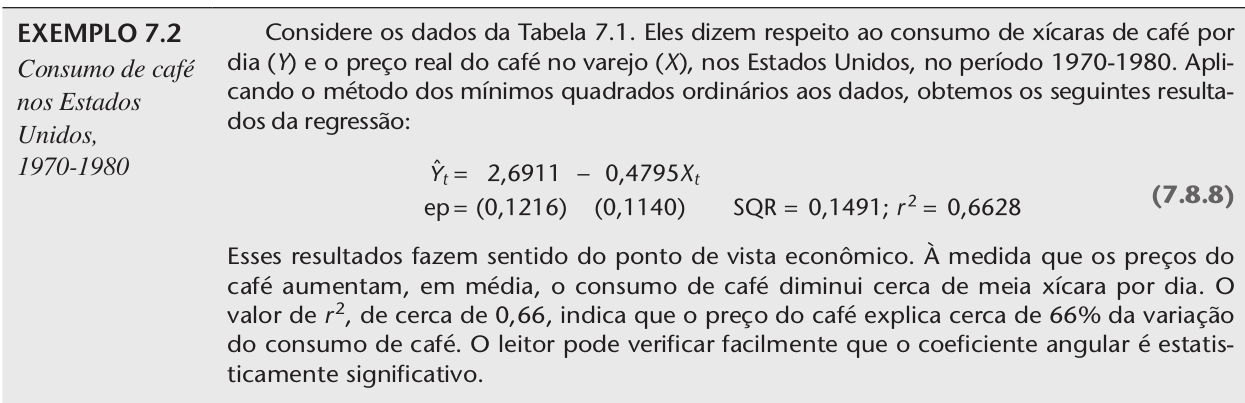

In [138]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_4.png')

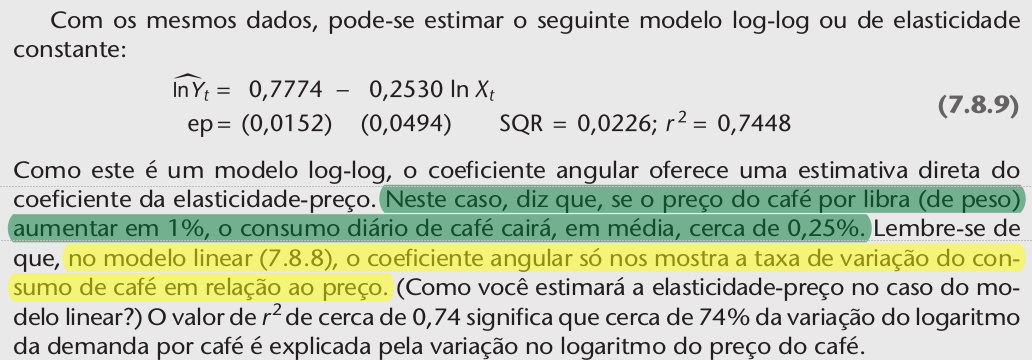

In [139]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_5.png')

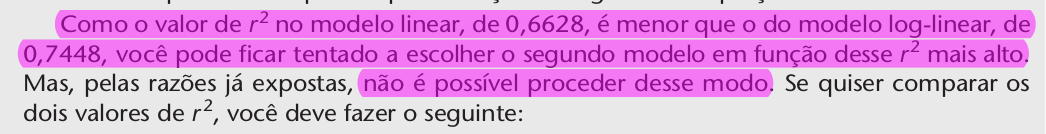

In [140]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_6.png')

## Processos para comparar $ R² $ coeficientes de determinação -- modelo linear x modelo Log-Log

### Dataframes

In [141]:
#original
data

ano  xicaras  $ lb
0   1970     2.57  0.77
1   1971     2.50  0.74
2   1972     2.35  0.72
3   1973     2.30  0.73
4   1974     2.25  0.76
5   1975     2.20  0.75
6   1976     2.11  1.08
7   1977     1.94  1.81
8   1978     1.97  1.39
9   1979     2.06  1.20
10  1980     2.02  1.17

In [142]:
#regressão linear Equacao 7.8.8
data_lin

ano  xicaras  $ lb  predict_xicaras    u1
0   1970     2.57  0.77             2.32  0.25
1   1971     2.50  0.74             2.34  0.16
2   1972     2.35  0.72             2.35  0.00
3   1973     2.30  0.73             2.34 -0.04
4   1974     2.25  0.76             2.33 -0.08
5   1975     2.20  0.75             2.33 -0.13
6   1976     2.11  1.08             2.17 -0.06
7   1977     1.94  1.81             1.82  0.12
8   1978     1.97  1.39             2.02 -0.05
9   1979     2.06  1.20             2.12 -0.06
10  1980     2.02  1.17             2.13 -0.11

In [143]:
#Regressão Log_Log Equação 7.8.9
data_log_log

ano  xicaras  $ lb  ln_xicaras  ln_$  predict_ln_xicaras  u1_ln
0   1970     2.57  0.77        0.94 -0.26                0.84   0.10
1   1971     2.50  0.74        0.92 -0.30                0.85   0.06
2   1972     2.35  0.72        0.85 -0.33                0.86  -0.01
3   1973     2.30  0.73        0.83 -0.31                0.86  -0.02
4   1974     2.25  0.76        0.81 -0.27                0.85  -0.04
5   1975     2.20  0.75        0.79 -0.29                0.85  -0.06
6   1976     2.11  1.08        0.75  0.08                0.76  -0.01
7   1977     1.94  1.81        0.66  0.59                0.63   0.04
8   1978     1.97  1.39        0.68  0.33                0.69  -0.02
9   1979     2.06  1.20        0.72  0.18                0.73  -0.01
10  1980     2.02  1.17        0.70  0.16                0.74  -0.03

### Processo 1 - Partindo  do Modelo Log-Log

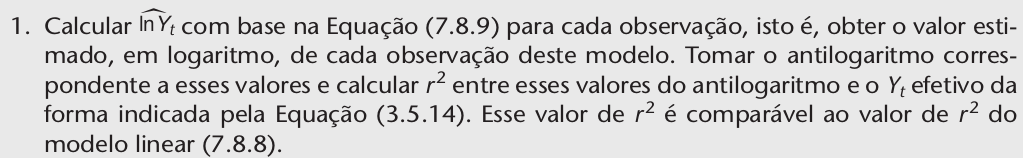

In [144]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_7.png')

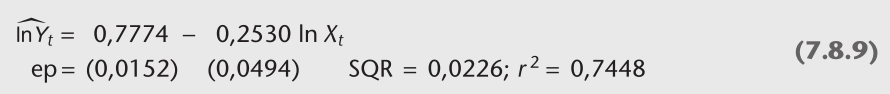

In [145]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_10.png')

#### Calcular o antilogaritmo valor predito ln_xicaras

In [146]:
data_log_log['antilog'] = np.exp(data_log_log['predict_ln_xicaras'])
data_log_log

ano  xicaras  $ lb  ln_xicaras  ln_$  predict_ln_xicaras  u1_ln  antilog
0   1970     2.57  0.77        0.94 -0.26                0.84   0.10     2.32
1   1971     2.50  0.74        0.92 -0.30                0.85   0.06     2.35
2   1972     2.35  0.72        0.85 -0.33                0.86  -0.01     2.36
3   1973     2.30  0.73        0.83 -0.31                0.86  -0.02     2.36
4   1974     2.25  0.76        0.81 -0.27                0.85  -0.04     2.33
5   1975     2.20  0.75        0.79 -0.29                0.85  -0.06     2.34
6   1976     2.11  1.08        0.75  0.08                0.76  -0.01     2.13
7   1977     1.94  1.81        0.66  0.59                0.63   0.04     1.87
8   1978     1.97  1.39        0.68  0.33                0.69  -0.02     2.00
9   1979     2.06  1.20        0.72  0.18                0.73  -0.01     2.08
10  1980     2.02  1.17        0.70  0.16                0.74  -0.03     2.09

#### Calcular r2 conforme equação 3.5.14

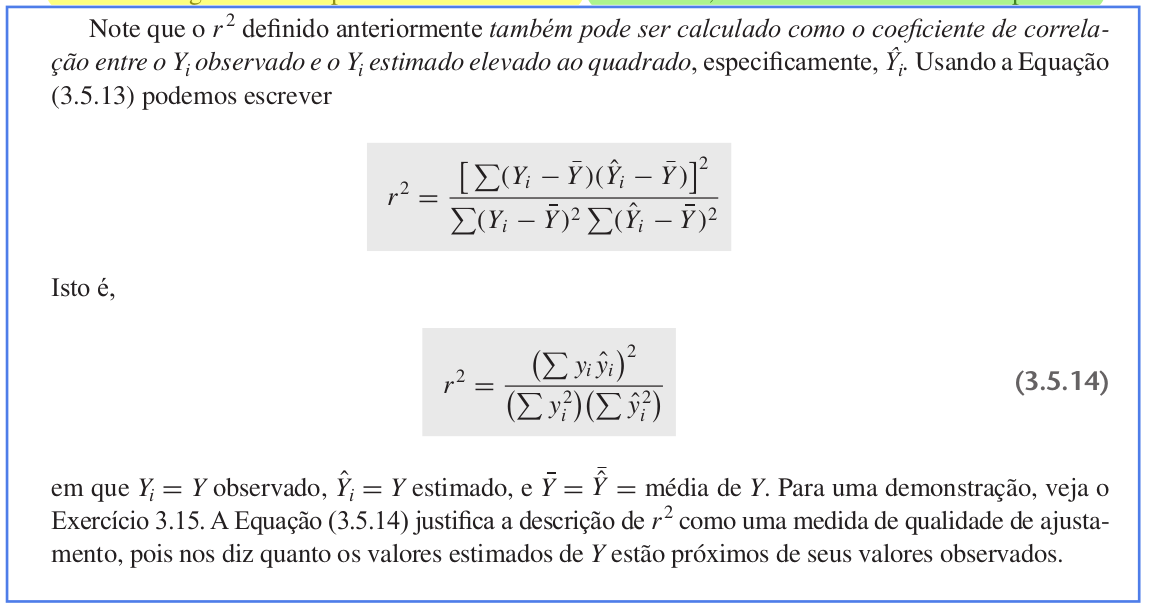

In [147]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_8.png')

In [148]:
data_r2 = data_log_log[['xicaras','antilog']].copy()
data_r2

xicaras  antilog
0      2.57     2.32
1      2.50     2.35
2      2.35     2.36
3      2.30     2.36
4      2.25     2.33
5      2.20     2.34
6      2.11     2.13
7      1.94     1.87
8      1.97     2.00
9      2.06     2.08
10     2.02     2.09

In [149]:
#y_mean
data_r2['y_mean'] = data_r2['xicaras'].mean()

#desvio efetivo
data_r2['desvio_efetivo'] = data_r2.apply(lambda x: x['xicaras'] - x['y_mean'] , axis = 1)

#desvio efetivo ao quadrado
data_r2['desvio_efetivo_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_efetivo'] ), axis = 1)


#desvio antilog
data_r2['desvio_antilog'] = data_r2.apply( lambda x: x['antilog']- x['y_mean'] , axis = 1)

#desvio antilog ao quadrado
data_r2['desvio_antilog_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_antilog'] ), axis = 1)

#produto
data_r2['produto_desvios'] = data_r2.apply( lambda x: x['desvio_efetivo']* x['desvio_antilog'], axis = 1)

In [150]:
data_r2

xicaras  antilog  y_mean  desvio_efetivo  desvio_efetivo_sqr  desvio_antilog  desvio_antilog_sqr  produto_desvios
0      2.57     2.32    2.21            0.36                0.13            0.12                0.01             0.04
1      2.50     2.35    2.21            0.29                0.09            0.14                0.02             0.04
2      2.35     2.36    2.21            0.14                0.02            0.16                0.02             0.02
3      2.30     2.36    2.21            0.09                0.01            0.15                0.02             0.01
4      2.25     2.33    2.21            0.04                0.00            0.13                0.02             0.01
5      2.20     2.34    2.21           -0.01                0.00            0.13                0.02            -0.00
6      2.11     2.13    2.21           -0.10                0.01           -0.07                0.01             0.01
7      1.94     1.87    2.21           -0.27                0.07           -0.33                0.11             0.09
8      1.97     2.00    2.21           -0.24                0.06           -0.20                0.04             0.05
9      2.06     2.08    2.21           -0.15                0.02           -0.13                0.02             0.02
10     2.02     2.09    2.21           -0.19                0.03           -0.12                0.01             0.02

In [151]:
r2 = np.square( data_r2['produto_desvios'].sum() ) / ( data_r2['desvio_efetivo_sqr'].sum() * data_r2['desvio_antilog_sqr'].sum() )

print('coeficiente de determinação transformado = {}'.format(r2))


coeficiente de determinação transformado = 0.7185332300157825


#### Comparar com r2 modelo linear

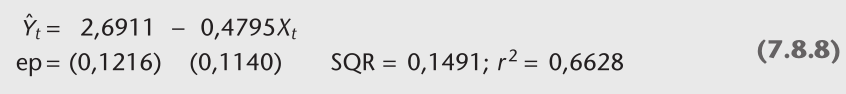

In [152]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_9.png')

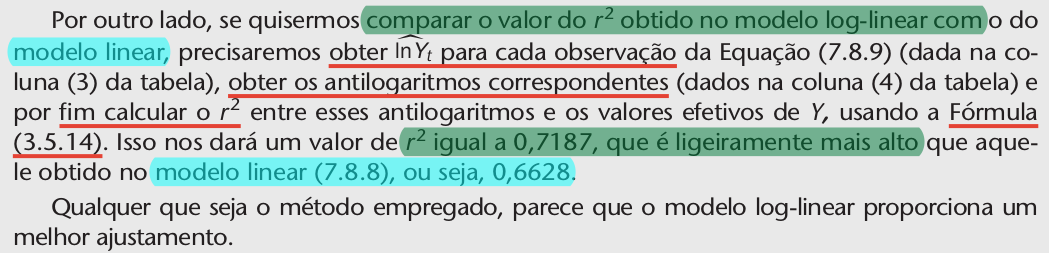

In [153]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_13.png')

### Processo 2 - Partindo do Modelo Linear

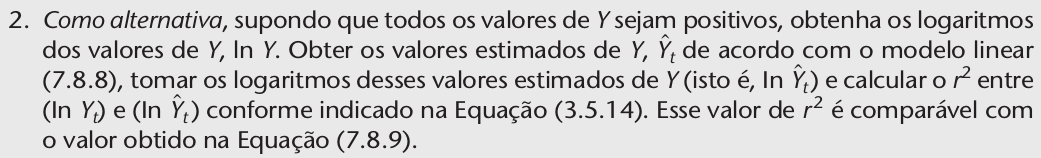

In [154]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_11.png')

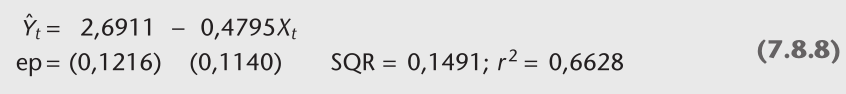

In [155]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_9.png')

In [156]:
data_lin['ln_y'] = np.log(data_lin['xicaras'])
data_lin

ano  xicaras  $ lb  predict_xicaras    u1  ln_y
0   1970     2.57  0.77             2.32  0.25  0.94
1   1971     2.50  0.74             2.34  0.16  0.92
2   1972     2.35  0.72             2.35  0.00  0.85
3   1973     2.30  0.73             2.34 -0.04  0.83
4   1974     2.25  0.76             2.33 -0.08  0.81
5   1975     2.20  0.75             2.33 -0.13  0.79
6   1976     2.11  1.08             2.17 -0.06  0.75
7   1977     1.94  1.81             1.82  0.12  0.66
8   1978     1.97  1.39             2.02 -0.05  0.68
9   1979     2.06  1.20             2.12 -0.06  0.72
10  1980     2.02  1.17             2.13 -0.11  0.70

In [157]:
data_lin['ln_predict_xicaras'] = np.log(data_lin['predict_xicaras'] )
data_lin

ano  xicaras  $ lb  predict_xicaras    u1  ln_y  ln_predict_xicaras
0   1970     2.57  0.77             2.32  0.25  0.94                0.84
1   1971     2.50  0.74             2.34  0.16  0.92                0.85
2   1972     2.35  0.72             2.35  0.00  0.85                0.85
3   1973     2.30  0.73             2.34 -0.04  0.83                0.85
4   1974     2.25  0.76             2.33 -0.08  0.81                0.84
5   1975     2.20  0.75             2.33 -0.13  0.79                0.85
6   1976     2.11  1.08             2.17 -0.06  0.75                0.78
7   1977     1.94  1.81             1.82  0.12  0.66                0.60
8   1978     1.97  1.39             2.02 -0.05  0.68                0.71
9   1979     2.06  1.20             2.12 -0.06  0.72                0.75
10  1980     2.02  1.17             2.13 -0.11  0.70                0.76

#### Calcular r2 conforme equação 3.5.14

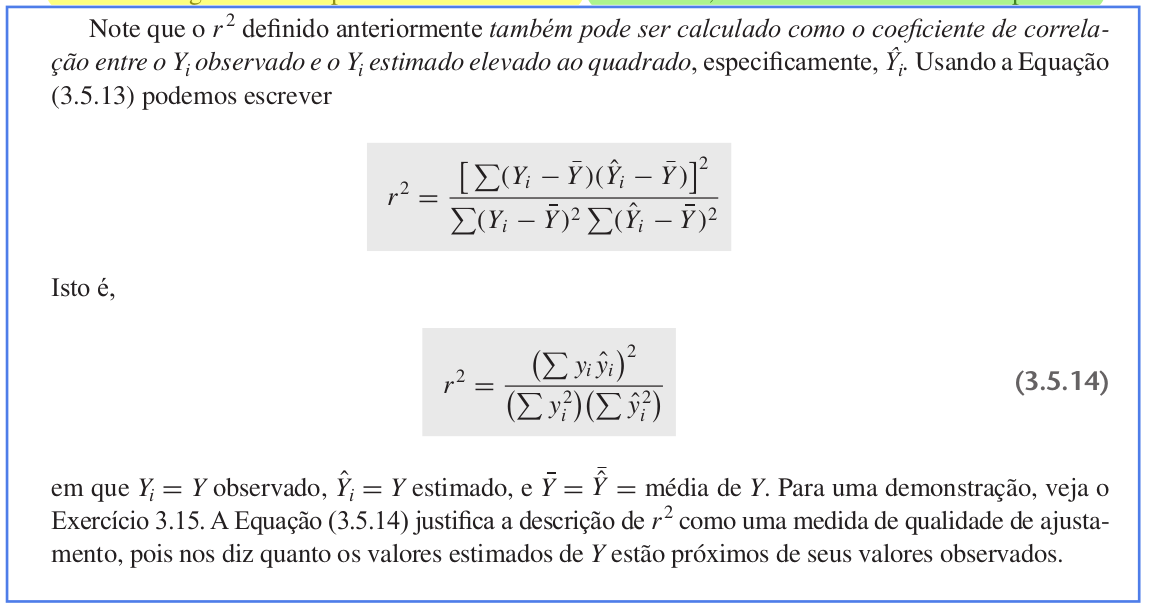

In [158]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_8.png')

In [159]:
data_r2 = data_lin[['ln_y','ln_predict_xicaras']].copy()
data_r2

ln_y  ln_predict_xicaras
0   0.94                0.84
1   0.92                0.85
2   0.85                0.85
3   0.83                0.85
4   0.81                0.84
5   0.79                0.85
6   0.75                0.78
7   0.66                0.60
8   0.68                0.71
9   0.72                0.75
10  0.70                0.76

In [160]:
#y_mean
data_r2['y_mean'] = data_r2['ln_y'].mean()

#desvio efetivo
data_r2['desvio_efetivo'] = data_r2.apply(lambda x: x['ln_y'] - x['y_mean'] , axis = 1)

#desvio efetivo ao quadrado
data_r2['desvio_efetivo_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_efetivo'] ), axis = 1)


#desvio antilog
data_r2['desvio_ln'] = data_r2.apply( lambda x: x['ln_predict_xicaras']- x['y_mean'] , axis = 1)

#desvio antilog ao quadrado
data_r2['desvio_ln_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_ln'] ), axis = 1)

#produto
data_r2['produto_desvios'] = data_r2.apply( lambda x: x['desvio_efetivo']* x['desvio_ln'], axis = 1)

In [161]:
data_r2

ln_y  ln_predict_xicaras  y_mean  desvio_efetivo  desvio_efetivo_sqr  desvio_ln  desvio_ln_sqr  produto_desvios
0   0.94                0.84    0.79            0.16                0.02       0.06           0.00             0.01
1   0.92                0.85    0.79            0.13                0.02       0.06           0.00             0.01
2   0.85                0.85    0.79            0.07                0.00       0.07           0.00             0.00
3   0.83                0.85    0.79            0.05                0.00       0.06           0.00             0.00
4   0.81                0.84    0.79            0.02                0.00       0.06           0.00             0.00
5   0.79                0.85    0.79            0.00                0.00       0.06           0.00             0.00
6   0.75                0.78    0.79           -0.04                0.00      -0.01           0.00             0.00
7   0.66                0.60    0.79           -0.12                0.02      -0.19           0.03             0.02
8   0.68                0.71    0.79           -0.11                0.01      -0.08           0.01             0.01
9   0.72                0.75    0.79           -0.06                0.00      -0.04           0.00             0.00
10  0.70                0.76    0.79           -0.08                0.01      -0.03           0.00             0.00

In [162]:
r2 = np.square( data_r2['produto_desvios'].sum() ) / ( data_r2['desvio_efetivo_sqr'].sum() * data_r2['desvio_ln_sqr'].sum() )

print('coeficiente de determinação transformado = {}'.format(r2))

coeficiente de determinação transformado = 0.6778336692595959


#### Comparar com r2 do modelo log-log

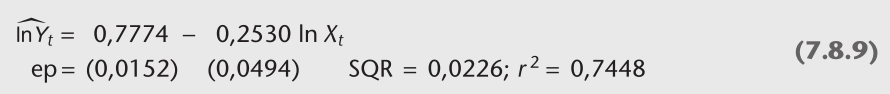

In [163]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_10.png')

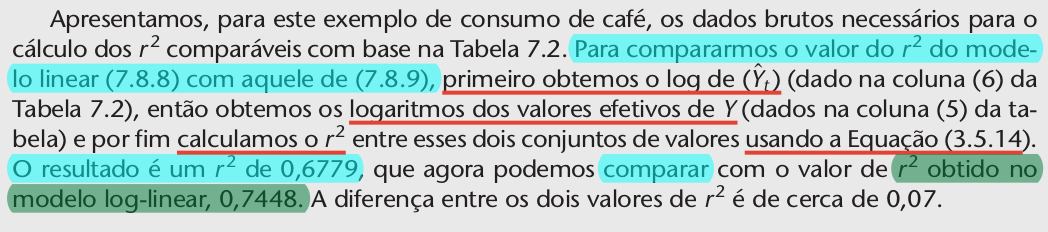

In [164]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.2_12.png')

# Seção 7.8

## Distribuição de $ {R²} $ entre os regressores

In [165]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

In [166]:
#statsmodels
print(' Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u \n')
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        06:50:26   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [167]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      170.51 -42.51
1           2  204   22    130 6.15      213.81  -9.81
2           3  202   16    310 7.00      226.19 -24.19
3           4  197   65    570 6.25      115.37  81.63
4           5   96   76   2050 3.81       82.47  13.53
5           6  209   26    200 6.44      204.49   4.51
6           7  170   45    670 6.19      159.44  10.56
7           8  240   29    300 5.89      197.23  42.77
8           9  241   11    120 5.89      238.42   2.58
9          10   55   55    290 2.36      139.27 -84.27

In [168]:
data_r2 = data.copy()

#y_mean
data_r2['taf_mean'] = data_r2['taf'].mean()

#desvio efetivo
data_r2['desvio_taf'] = data_r2.apply(lambda x: x['taf'] - x['taf_mean'] , axis = 1)

#desvio efetivo ao quadrado
data_r2['desvio_taf_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_taf'] ), axis = 1)


#pnbpc_mean
data_r2['pnbpc_mean'] = data_r2['pnbpc'].mean()

#desvio antilog
data_r2['desvio_pnbpc'] = data_r2.apply( lambda x: x['pnbpc']- x['pnbpc_mean'] , axis = 1)

#desvio antilog ao quadrado
data_r2['desvio_pnbpc_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_pnbpc'] ), axis = 1)

#produto
data_r2['produto_desvios'] = data_r2.apply( lambda x: x['desvio_taf']* x['desvio_pnbpc'], axis = 1)

In [169]:
data_r2

observacao   mi  taf  pnbpc   tft  predict_mi     u1  taf_mean  desvio_taf  desvio_taf_sqr  pnbpc_mean  desvio_pnbpc  desvio_pnbpc_sqr  produto_desvios
0            1  128   37   1870  6.66      170.51 -42.51     51.19      -14.19          201.29     1401.25        468.75         219726.56         -6650.39
1            2  204   22    130  6.15      213.81  -9.81     51.19      -29.19          851.91     1401.25      -1271.25        1616076.56         37104.61
2            3  202   16    310  7.00      226.19 -24.19     51.19      -35.19         1238.16     1401.25      -1091.25        1190826.56         38398.36
3            4  197   65    570  6.25      115.37  81.63     51.19       13.81          190.79     1401.25       -831.25         690976.56        -11481.64
4            5   96   76   2050  3.81       82.47  13.53     51.19       24.81          615.66     1401.25        648.75         420876.56         16097.11
5            6  209   26    200  6.44      204.49   4.51     51.19      -25.19          634.41     1401.25      -1201.25        1443001.56         30256.48
6            7  170   45    670  6.19      159.44  10.56     51.19       -6.19           38.29     1401.25       -731.25         534726.56          4524.61
7            8  240   29    300  5.89      197.23  42.77     51.19      -22.19          492.29     1401.25      -1101.25        1212751.56         24433.98
8            9  241   11    120  5.89      238.42   2.58     51.19      -40.19         1615.04     1401.25      -1281.25        1641601.56         51490.23
9           10   55   55    290  2.36      139.27 -84.27     51.19        3.81           14.54     1401.25      -1111.25        1234876.56         -4236.64
10          11   75   87   1180  3.93       62.83  12.17     51.19       35.81         1282.54     1401.25       -221.25          48951.56         -7923.52
11          12  129   55    900  5.99      135.82  -6.82     51.19        3.81           14.54     1401.25       -501.25         251251.56         -1911.02
12          13   24   93   1730  3.50       46.34 -22.34     51.19       41.81         1748.29     1401.25        328.75         108076.56         13745.86
13          14  165   31   1150  7.41      187.97 -22.97     51.19      -20.19          407.54     1401.25       -251.25          63126.56          5072.11
14          15   94   77   1160  4.21       85.26   8.74     51.19       25.81          666.29     1401.25       -241.25          58201.56         -6227.27
15          16   96   80   1270  5.00       77.94  18.06     51.19       28.81          830.16     1401.25       -131.25          17226.56         -3781.64
16          17  148   30    580  5.27      193.42 -45.42     51.19      -21.19          448.91     1401.25       -821.25         674451.56         17400.23
17          18   98   69    660  5.21      105.94  -7.94     51.19       17.81          317.29     1401.25       -741.25         549451.56        -13203.52
18          19  161   43    420  6.50      165.31  -4.31     51.19       -8.19           67.04     1401.25       -981.25         962851.56          8033.98
19          20  118   47   1080  6.12      152.66 -34.66     51.19       -4.19           17.54     1401.25       -321.25         103201.56          1345.23
20          21  269   17    290  6.19      224.07  44.93     51.19      -34.19         1168.79     1401.25      -1111.25        1234876.56         37990.86
21          22  189   35    270  5.05      184.01   4.99     51.19      -16.19          262.04     1401.25      -1131.25        1279726.56         18312.11
22          23  126   58    560  6.16      131.05  -5.05     51.19        6.81           46.41     1401.25       -841.25         707701.56         -5731.02
23          24   12   81   4240  1.80       58.94 -46.94     51.19       29.81          888.79     1401.25       2838.75        8058501.56         84630.23
24          25  167   29    240  4.75      197.57 -30.57     51.19      -22.19          492.29     1401.

In [170]:
r2 = np.square( data_r2['produto_desvios'].sum() ) / ( data_r2['desvio_taf_sqr'].sum() * data_r2['desvio_pnbpc_sqr'].sum() )

print('coeficiente de determinação = {}'.format(r2))


coeficiente de determinação = 0.07210829936648967


In [171]:
#correlação taf x pnbpc
correlacao = np.sqrt(r2)
correlacao

0.2685298854252347

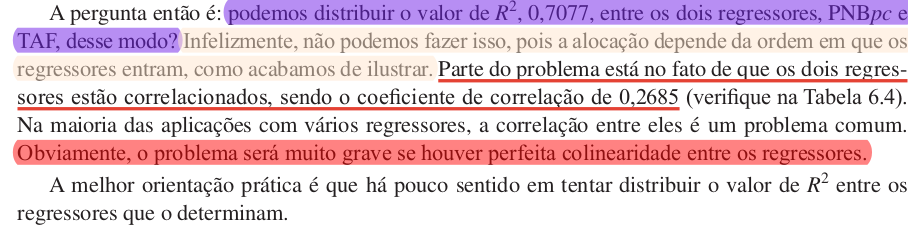

In [172]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/secao_7.8_corr_taf_pnbpc.png')

# Exemplo 7.3 - Função Cobb-Douglas

## Dataset do problema

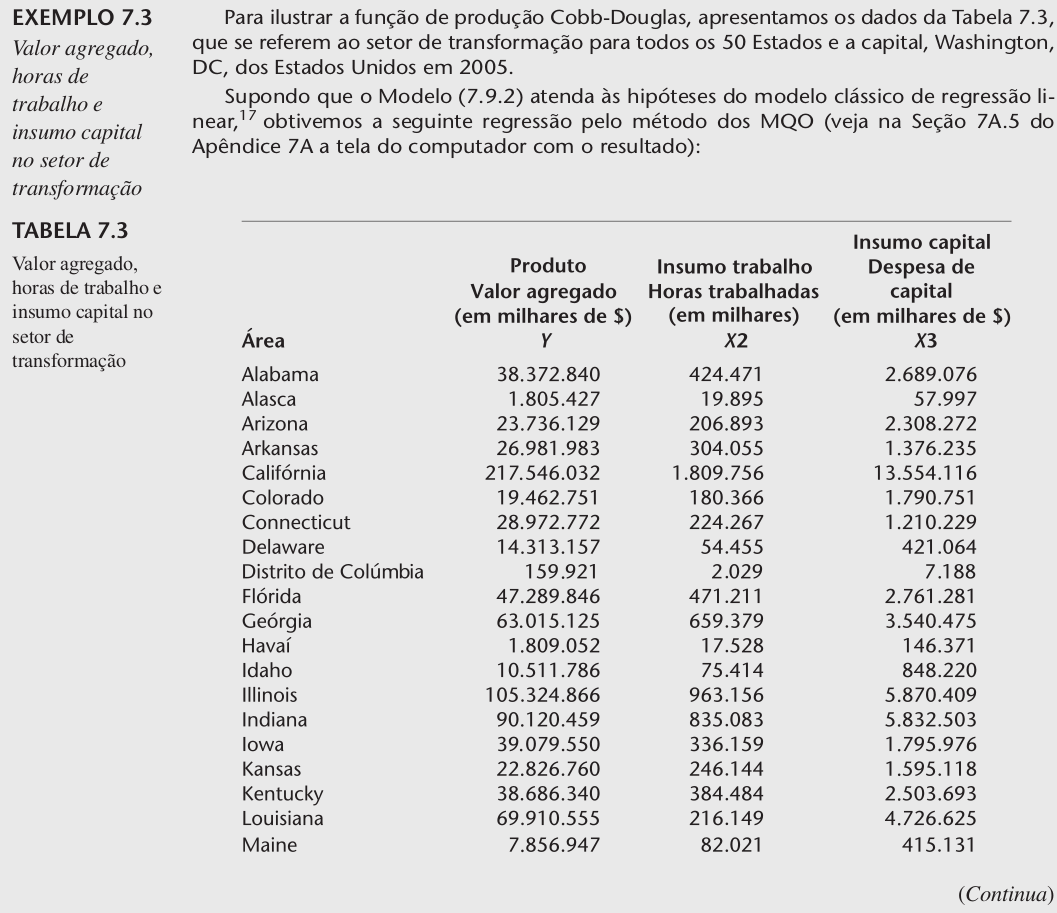

In [173]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.3_1.png')

In [174]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.3.xlsx')
data.head(10)

area  Produto Valor agregado  Insumo trabalho  Insumo capital
0               Alabama                38372840           424471         2689076
1                Alasca                 1805427            19895           57997
2               Arizona                23736129           206893         2308272
3              Arkansas                26981983           304055         1376235
4            Califórnia               217546032          1809756        13554116
5              Colorado                19462751           180366         1790751
6           Connecticut                28972772           224267         1210229
7              Delaware                14313157            54455          421064
8  Distrito de Colúmbia                  159921             2029            7188
9               Flórida                47289846           471211         2761281

## Regressão --> Valor_agregado = $ \hat{\beta}_{1} + \hat{\beta}_{2} * $ Insumo_trabalho + $\hat{\beta}_{3} * $ Insumo_Capital + $ {u}_i $

### Dispersao -- Valor agregado x Insumo trabalho --  Valor agregado  x Insumo capital

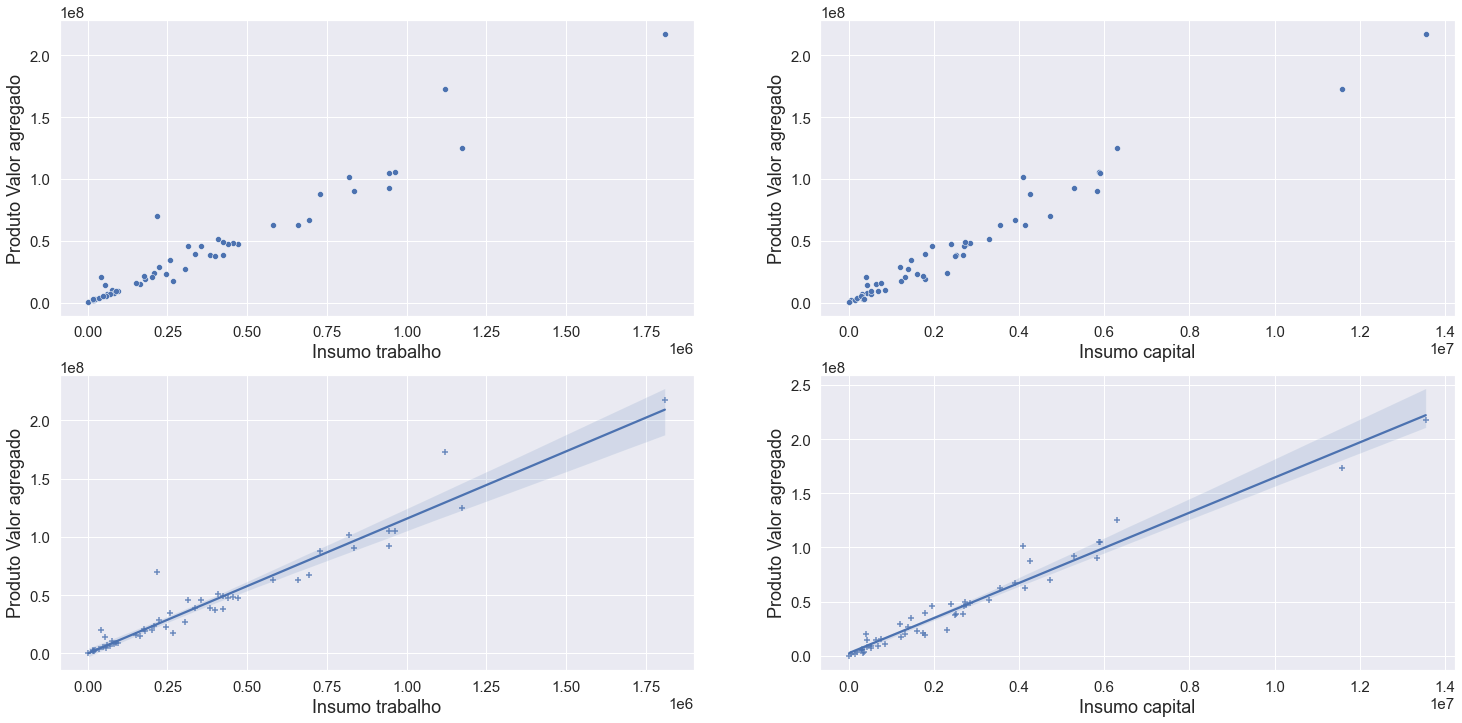

In [175]:
fig = plt.figure( figsize = (25,25))
specs = gridspec.GridSpec( nrows = 4, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'Insumo trabalho', y = 'Produto Valor agregado', data = data, ax = ax1);

sns.regplot( x = 'Insumo trabalho', y = 'Produto Valor agregado', data = data, fit_reg = True, marker = '+', ax = ax3);

sns.scatterplot( x = 'Insumo capital', y = 'Produto Valor agregado', data = data, ax = ax2);

sns.regplot(x = 'Insumo capital', y = 'Produto Valor agregado', data = data, fit_reg = True, marker = '+', ax = ax4);

### Regressão Valor agregado ( y) - Insumo Trabalho x2 + Insumo capital x3

In [176]:
#statsmodels
print(' Regressao  Valor agregado (y) =  x + Insumo Trabalho(x2) + Insumo capital(x3) + u \n')
x = data[['Insumo trabalho','Insumo capital']]
y = data[['Produto Valor agregado']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  Valor agregado (y) =  x + Insumo Trabalho(x2) + Insumo capital(x3) + u 

                              OLS Regression Results                              
Dep. Variable:     Produto Valor agregado   R-squared:                       0.981
Model:                                OLS   Adj. R-squared:                  0.980
Method:                     Least Squares   F-statistic:                     1244.
Date:                    Mon, 13 Jun 2022   Prob (F-statistic):           4.51e-42
Time:                            06:50:29   Log-Likelihood:                -869.28
No. Observations:                      51   AIC:                             1745.
Df Residuals:                          48   BIC:                             1750.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-

In [177]:
#correlação
data_r2 = data.copy()

#y_mean
data_r2['IT_mean'] = data_r2['Insumo trabalho'].mean()

#desvio efetivo
data_r2['desvio_IT'] = data_r2.apply(lambda x: x['Insumo trabalho'] - x['IT_mean'] , axis = 1)

#desvio efetivo ao quadrado
data_r2['desvio_IT_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_IT'] ), axis = 1)


#mean
data_r2['IC_mean'] = data_r2['Insumo capital'].mean()

#desvio 
data_r2['desvio_IC'] = data_r2.apply( lambda x: x['Insumo capital']- x['IC_mean'] , axis = 1)

#desvio ao quadrado
data_r2['desvio_IC_sqr'] = data_r2.apply(lambda x: np.square( x['desvio_IC'] ), axis = 1)

#produto
data_r2['produto_desvios'] = data_r2.apply( lambda x: x['desvio_IT']* x['desvio_IC'], axis = 1)

In [178]:
data_r2

area  Produto Valor agregado  Insumo trabalho  Insumo capital   IT_mean  desvio_IT    desvio_IT_sqr    IC_mean   desvio_IC      desvio_IC_sqr   produto_desvios
0                Alabama                38372840           424471         2689076 373914.51   50556.49    2555958700.95 2516180.86   172895.14     29892728486.39     8740971311.58
1                 Alasca                 1805427            19895           57997 373914.51 -354019.51  125329813321.81 2516180.86 -2458183.86   6042667903060.41   870245046096.93
2                Arizona                23736129           206893         2308272 373914.51 -167021.51   27896184737.18 2516180.86  -207908.86     43226095207.96    34725252157.30
3               Arkansas                26981983           304055         1376235 373914.51  -69859.51    4880351110.04 2516180.86 -1139945.86   1299476569989.67    79636059174.38
4             Califórnia               217546032          1809756        13554116 373914.51 1435841.49 2061640784968.50 2516180.86 11037935.14 121836012094246.38 15848725236163.73
5               Colorado                19462751           180366         1790751 373914.51 -193548.51   37461025647.32 2516180.86  -725429.86    526248485762.37   140405868901.58
6            Connecticut                28972772           224267         1210229 373914.51 -149647.51   22394377190.51 2516180.86 -1305951.86   1705510267807.39   195432444183.60
7               Delaware                14313157            54455          421064 373914.51 -319459.51  102054378404.16 2516180.86 -2095116.86   4389514668558.86   669305005954.48
8   Distrito de Colúmbia                  159921             2029            7188 373914.51 -371885.51  138298832402.12 2516180.86 -2508992.86   6295045185305.84   933058089856.36
9                Flórida                47289846           471211         2761281 373914.51   97296.49    9466607004.48 2516180.86   245100.14     60074077282.37    23847383101.48
10               Geórgia                63015125           659379         3540475 373914.51  285464.49   81489975162.91 2516180.86  1024294.14   1049178479614.76   292399603702.30
11                 Havaí                 1809052            17528          146371 373914.51 -356386.51  127011344370.22 2516180.86 -2369809.86   5615998785563.94   844568265882.64
12                 Idaho                10511786            75414          848220 373914.51 -298500.51   89102554353.20 2516180.86 -1667960.86   2782093439649.37   497887167862.40
13              Illinois               105324866           963156         5870409 373914.51  589241.49  347205533768.50 2516180.86  3354228.14  11250846396752.49  1976450386053.69
14               Indiana                90120459           835083         5832503 373914.51  461168.49  212676376349.73 2516180.86  3316322.14  10997992518046.92  1529383273041.68
15                  lowa                39079550           336159         1795976 373914.51  -37755.51    1425478520.55 2516180.86  -720204.86    518695044321.69    27191701756.20
16                Kansas                22826760           246144         1595118 373914.51 -127770.51   16325303175.55 2516180.86  -921062.86    848356797128.19   117684671534.40
17              Kentucky                38686340           384484         2503693 373914.51   10569.49     111714123.00 2516180.86   -12487.86       155946715.94     -131990342.85
18             Louisiana                69910555           216149         4726625 373914.51 -157765.51   24889956083.69 2516180.86  2210444.14   4886063283924.57  -348731846207.11
19                 Maine                 7856947            82021          415131 373914.51 -291893.51   85201821065.65 2516180.86 -2101049.86   4414410525741.19   613282818709.71
20              Maryland                21352966           174855         1729116 373914.51 -199059.51   39624688443.38 2516180.86  -787064.86    619471098167.96   156672745761.93
21         Massachusetts                46044292           3

In [179]:
r2 = np.square( data_r2['produto_desvios'].sum() ) / ( data_r2['desvio_IT_sqr'].sum() * data_r2['desvio_IC_sqr'].sum() )
correlacao = np.sqrt(r2)
print('coeficiente de determinação = {}'.format(r2))
print('correlação = {}'.format(correlacao))


coeficiente de determinação = 0.8873873168828982
correlação = 0.9420123761835075


In [180]:
#valor predito de mi
data['predict_valor'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

area  Produto Valor agregado  Insumo trabalho  Insumo capital  predict_valor          u1
0               Alabama                38372840           424471         2689076    47364254.10 -8991414.10
1                Alasca                 1805427            19895           57997     1765509.91    39917.09
2               Arizona                23736129           206893         2308272    33133540.85 -9397411.85
3              Arkansas                26981983           304055         1376235    28520558.19 -1538575.19
4            Califórnia               217546032          1809756        13554116   221968112.62 -4422080.62
5              Colorado                19462751           180366         1790751    26710267.75 -7247516.75
6           Connecticut                28972772           224267         1210229    23039669.27  5933102.73
7              Delaware                14313157            54455          421064     7037156.13  7276000.87
8  Distrito de Colúmbia                  159921             2029            7188      402522.15  -242601.15
9               Flórida                47289846           471211         2761281    50325759.50 -3035913.50

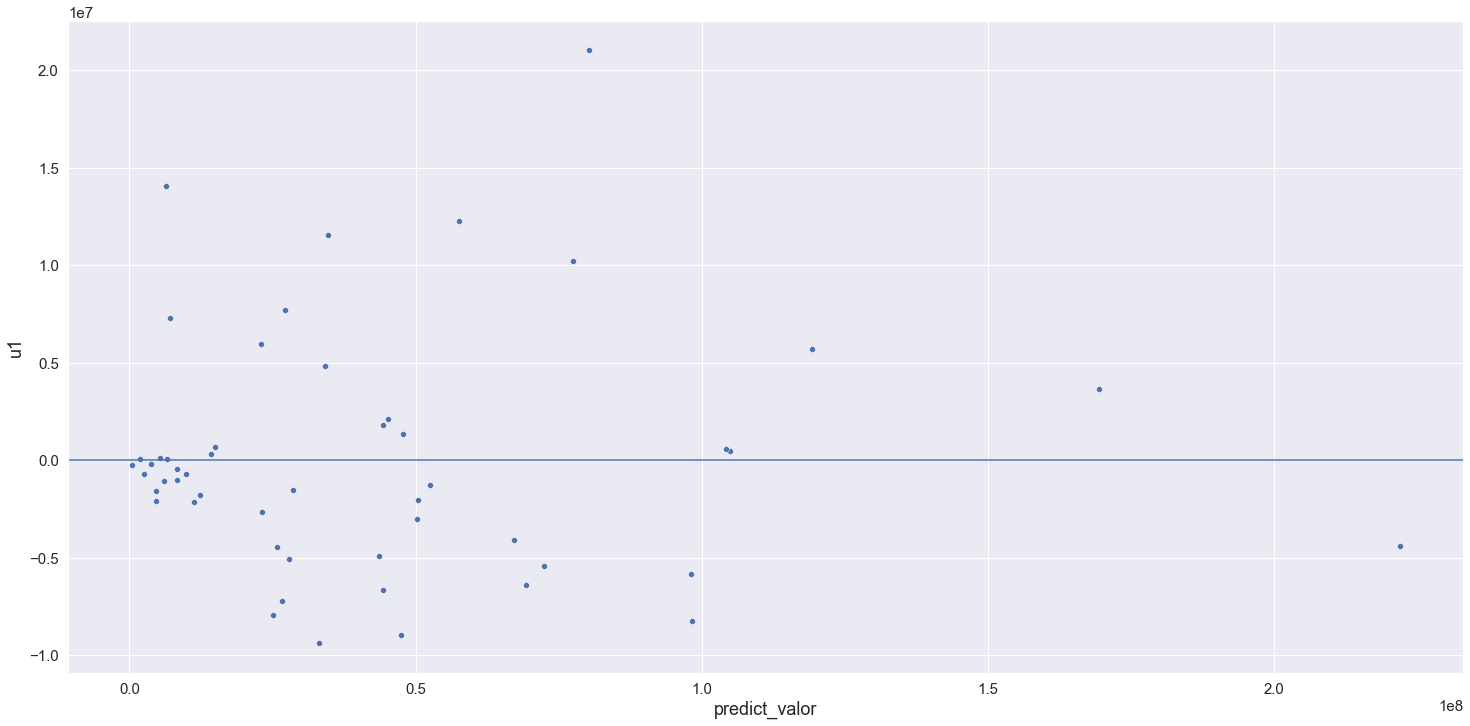

In [181]:
#dispersão dos resíduos
sns.scatterplot(x = 'predict_valor', y = 'u1', data = data );
plt.axhline(y=0);

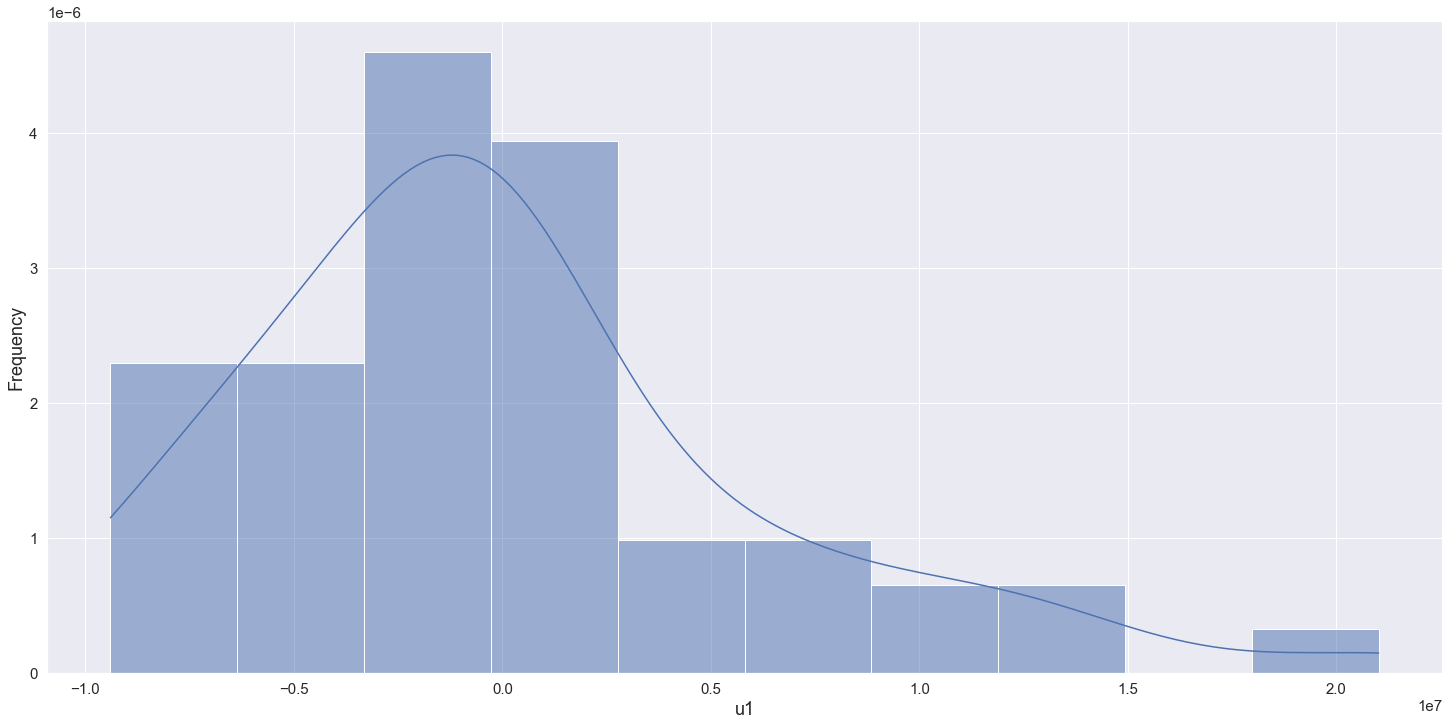

In [182]:
#histograma dos resíduos
sns.histplot(x = 'u1', data = data, stat = 'frequency', kde = True);

In [183]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data['u1'])
jb

(16.861831957132335,
 0.00021802169570028923,
 1.1528052319710989,
 4.618375770052526)

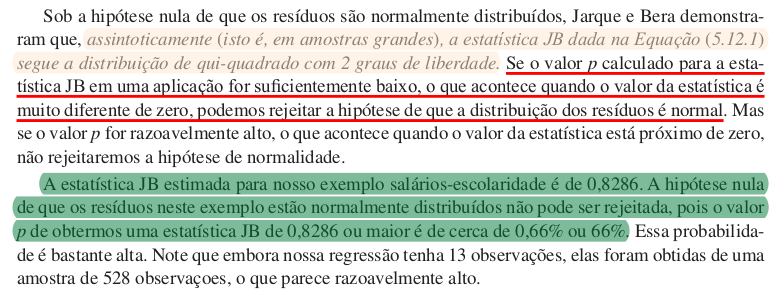

In [184]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [185]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data['u1'])
print(stat_test)
print(p_valor)

14.841815851608791
0.0005986054094177719


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

### Regressão Log-Log - Produto --> $\hat{\ln(y)} = \hat{\beta}_{1} + \hat{\beta}_{2} * \ln(x2) + \hat{\beta}_{3} * \ln{(x3)} $

In [186]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_7.3.xlsx')
data.head(10)

area  Produto Valor agregado  Insumo trabalho  Insumo capital
0               Alabama                38372840           424471         2689076
1                Alasca                 1805427            19895           57997
2               Arizona                23736129           206893         2308272
3              Arkansas                26981983           304055         1376235
4            Califórnia               217546032          1809756        13554116
5              Colorado                19462751           180366         1790751
6           Connecticut                28972772           224267         1210229
7              Delaware                14313157            54455          421064
8  Distrito de Colúmbia                  159921             2029            7188
9               Flórida                47289846           471211         2761281

In [187]:
# dataset Log-Log
data_log_log = data.copy()
data_log_log['ln_va'] = np.log( data_log_log['Produto Valor agregado'] )
data_log_log['ln_it'] = np.log( data_log_log['Insumo trabalho'])
data_log_log['ln_ic'] = np.log( data_log_log['Insumo capital'])
data_log_log.head(15)

area  Produto Valor agregado  Insumo trabalho  Insumo capital  ln_va  ln_it  ln_ic
0                Alabama                38372840           424471         2689076  17.46  12.96  14.80
1                 Alasca                 1805427            19895           57997  14.41   9.90  10.97
2                Arizona                23736129           206893         2308272  16.98  12.24  14.65
3               Arkansas                26981983           304055         1376235  17.11  12.62  14.13
4             Califórnia               217546032          1809756        13554116  19.20  14.41  16.42
5               Colorado                19462751           180366         1790751  16.78  12.10  14.40
6            Connecticut                28972772           224267         1210229  17.18  12.32  14.01
7               Delaware                14313157            54455          421064  16.48  10.91  12.95
8   Distrito de Colúmbia                  159921             2029            7188  11.98   7.62   8.88
9                Flórida                47289846           471211         2761281  17.67  13.06  14.83
10               Geórgia                63015125           659379         3540475  17.96  13.40  15.08
11                 Havaí                 1809052            17528          146371  14.41   9.77  11.89
12                 Idaho                10511786            75414          848220  16.17  11.23  13.65
13              Illinois               105324866           963156         5870409  18.47  13.78  15.59
14               Indiana                90120459           835083         5832503  18.32  13.64  15.58

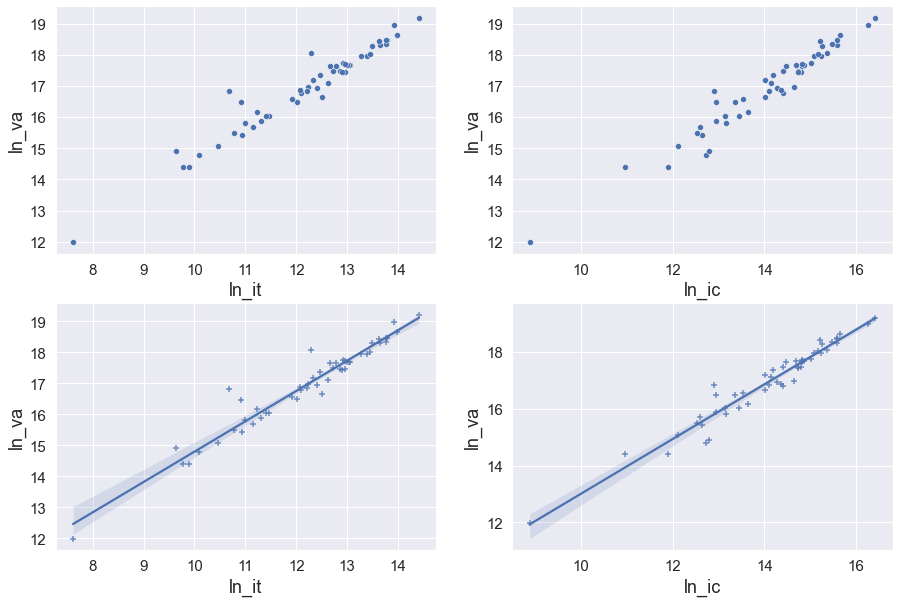

In [188]:
fig = plt.figure( figsize = (15,10))
specs = gridspec.GridSpec( nrows = 2, ncols=2, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )
ax2 = fig.add_subplot( specs[0,1] )
ax3 = fig.add_subplot( specs[1,0] )
ax4 = fig.add_subplot( specs[1,1] )

sns.scatterplot( x = 'ln_it', y = 'ln_va', data = data_log_log, ax = ax1);

sns.regplot( x = 'ln_it', y = 'ln_va', data = data_log_log, fit_reg = True, marker = '+', ax = ax3);

sns.scatterplot( x = 'ln_ic', y = 'ln_va', data = data_log_log, ax = ax2);

sns.regplot( x = 'ln_ic', y = 'ln_va', data = data_log_log, fit_reg = True, marker = '+', ax = ax4);

In [189]:
#statsmodels
print(' Regressao   \n')
x = data_log_log[['ln_it','ln_ic']]
y = data_log_log[['ln_va']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao   

                            OLS Regression Results                            
Dep. Variable:                  ln_va   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     645.9
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           2.00e-35
Time:                        06:50:32   Log-Likelihood:                -3.4267
No. Observations:                  51   AIC:                             12.85
Df Residuals:                      48   BIC:                             18.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8876      0.396     

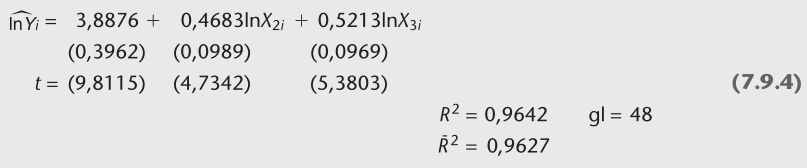

In [190]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.3_2.png')

In [191]:
#valor predito de PNBpc
data_log_log['predict_ln_va'] = model.predict(x)
data_log_log['u1_ln'] = model.resid
data_log_log.head(15)

area  Produto Valor agregado  Insumo trabalho  Insumo capital  ln_va  ln_it  ln_ic  predict_ln_va  u1_ln
0                Alabama                38372840           424471         2689076  17.46  12.96  14.80          17.67  -0.21
1                 Alasca                 1805427            19895           57997  14.41   9.90  10.97          14.24   0.17
2                Arizona                23736129           206893         2308272  16.98  12.24  14.65          17.26  -0.28
3               Arkansas                26981983           304055         1376235  17.11  12.62  14.13          17.17  -0.06
4             Califórnia               217546032          1809756        13554116  19.20  14.41  16.42          19.20   0.00
5               Colorado                19462751           180366         1790751  16.78  12.10  14.40          17.06  -0.28
6            Connecticut                28972772           224267         1210229  17.18  12.32  14.01          16.96   0.22
7               Delaware                14313157            54455          421064  16.48  10.91  12.95          15.75   0.73
8   Distrito de Colúmbia                  159921             2029            7188  11.98   7.62   8.88          12.08  -0.10
9                Flórida                47289846           471211         2761281  17.67  13.06  14.83          17.74  -0.06
10               Geórgia                63015125           659379         3540475  17.96  13.40  15.08          18.02  -0.06
11                 Havaí                 1809052            17528          146371  14.41   9.77  11.89          14.66  -0.26
12                 Idaho                10511786            75414          848220  16.17  11.23  13.65          16.26  -0.10
13              Illinois               105324866           963156         5870409  18.47  13.78  15.59          18.46   0.01
14               Indiana                90120459           835083         5832503  18.32  13.64  15.58          18.39  -0.08

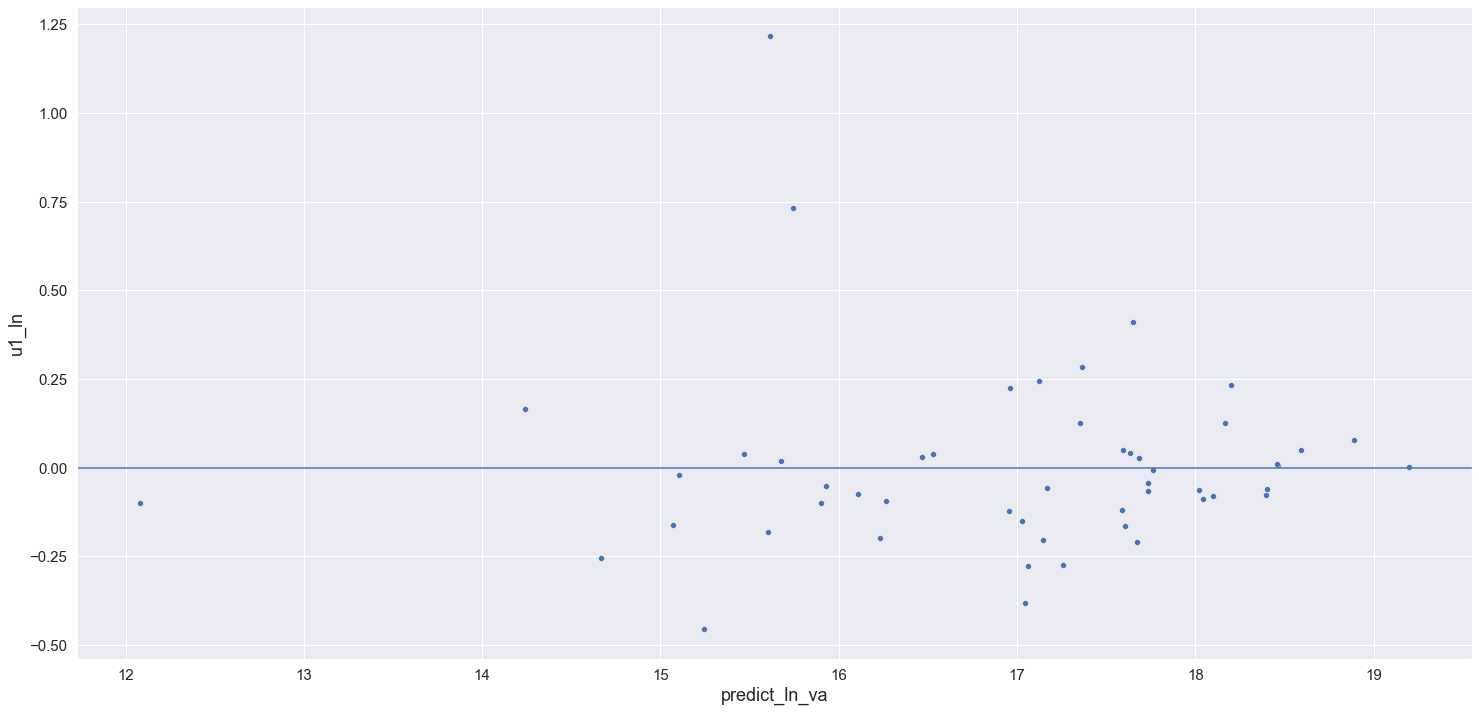

In [192]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_ln_va', y = 'u1_ln', data = data_log_log )
plt.axhline(y=0);

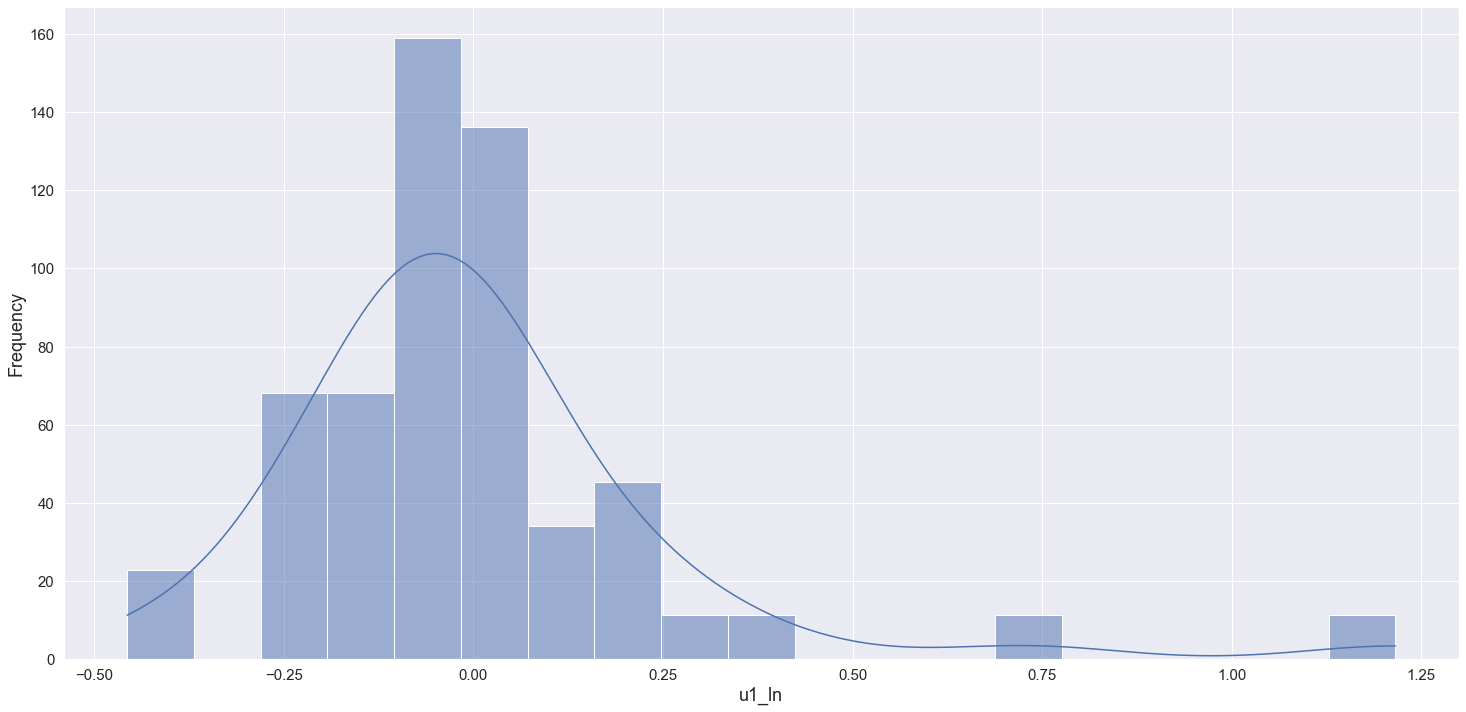

In [193]:
sns.histplot( x = 'u1_ln',data = data_log_log, stat = 'frequency', kde = True);

In [194]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data_log_log['u1_ln'])
jb

(196.02398389197054,
 2.7160185858206443e-43,
 2.33572741439942,
 11.391906245754713)

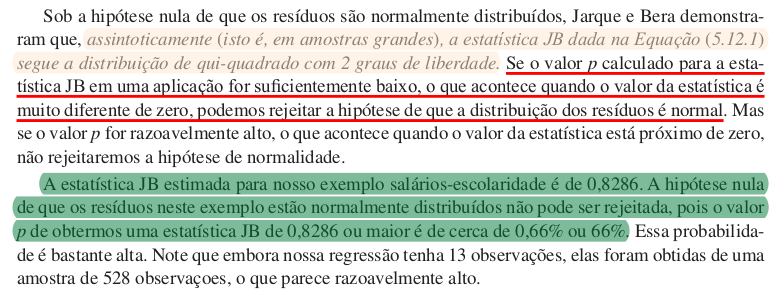

In [195]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [196]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data_log_log['u1_ln'])
print(stat_test)
print(p_valor)

45.6449520093193
1.2255318650010143e-10


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

# Exemplo 7.4 - Regressão Polinomial

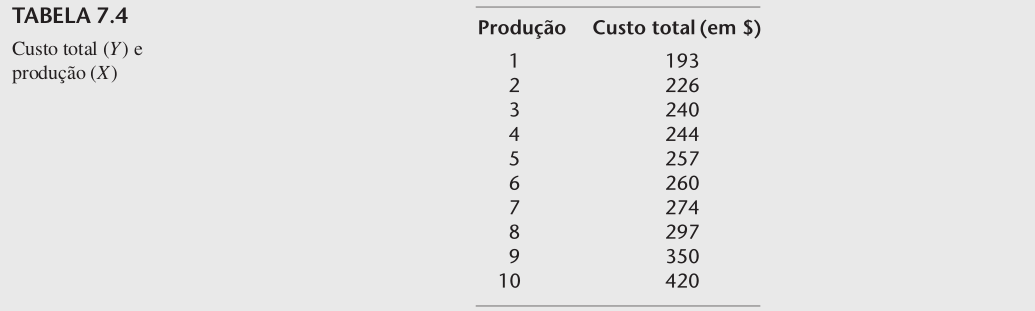

In [197]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_0.png')

In [198]:
tab = { 'producao':[1,2,3,4,5,6,7,8,9,10], 'custo_t':[193,226,240,244,257,260,274,297,350,420]}
data = pd.DataFrame( tab )
data.head(10)

producao  custo_t
0         1      193
1         2      226
2         3      240
3         4      244
4         5      257
5         6      260
6         7      274
7         8      297
8         9      350
9        10      420

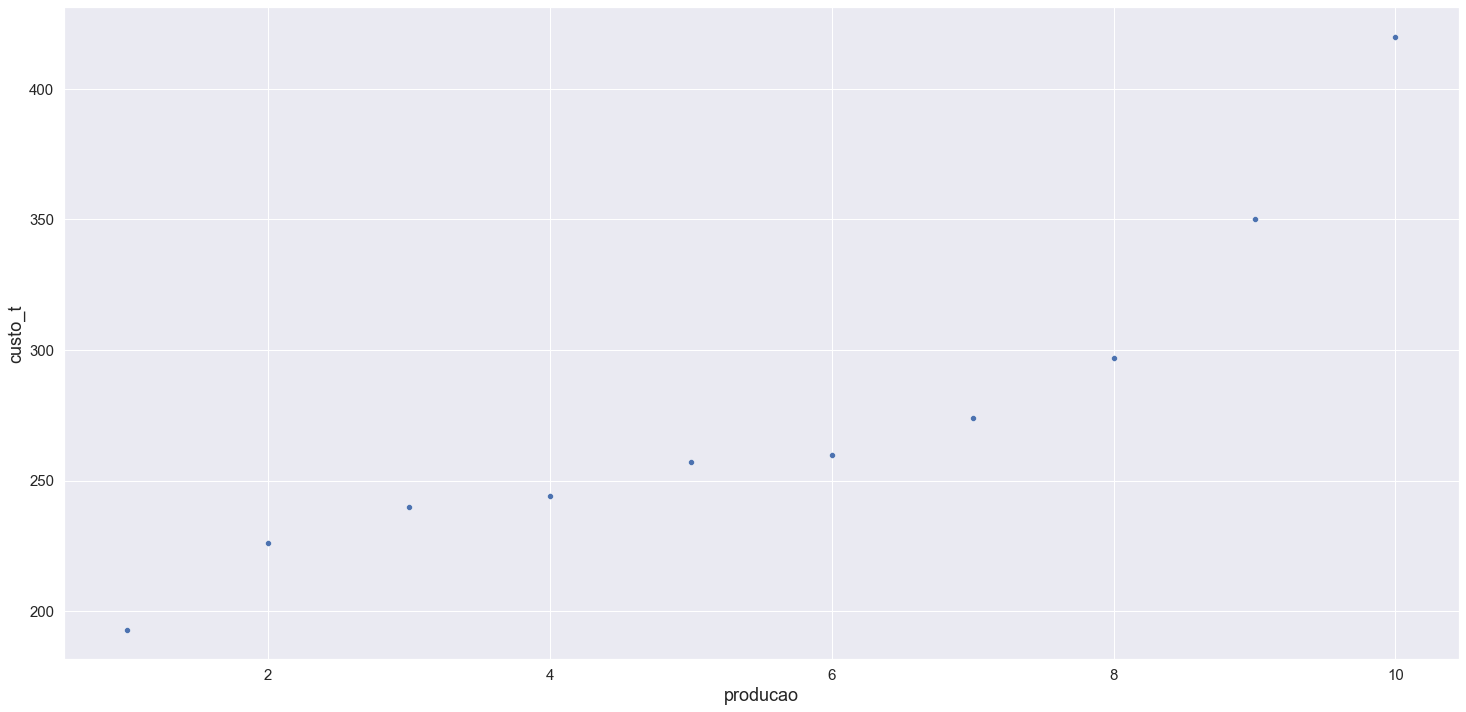

In [199]:
#Grafico 
sns.scatterplot( x = 'producao', y = 'custo_t', data = data);

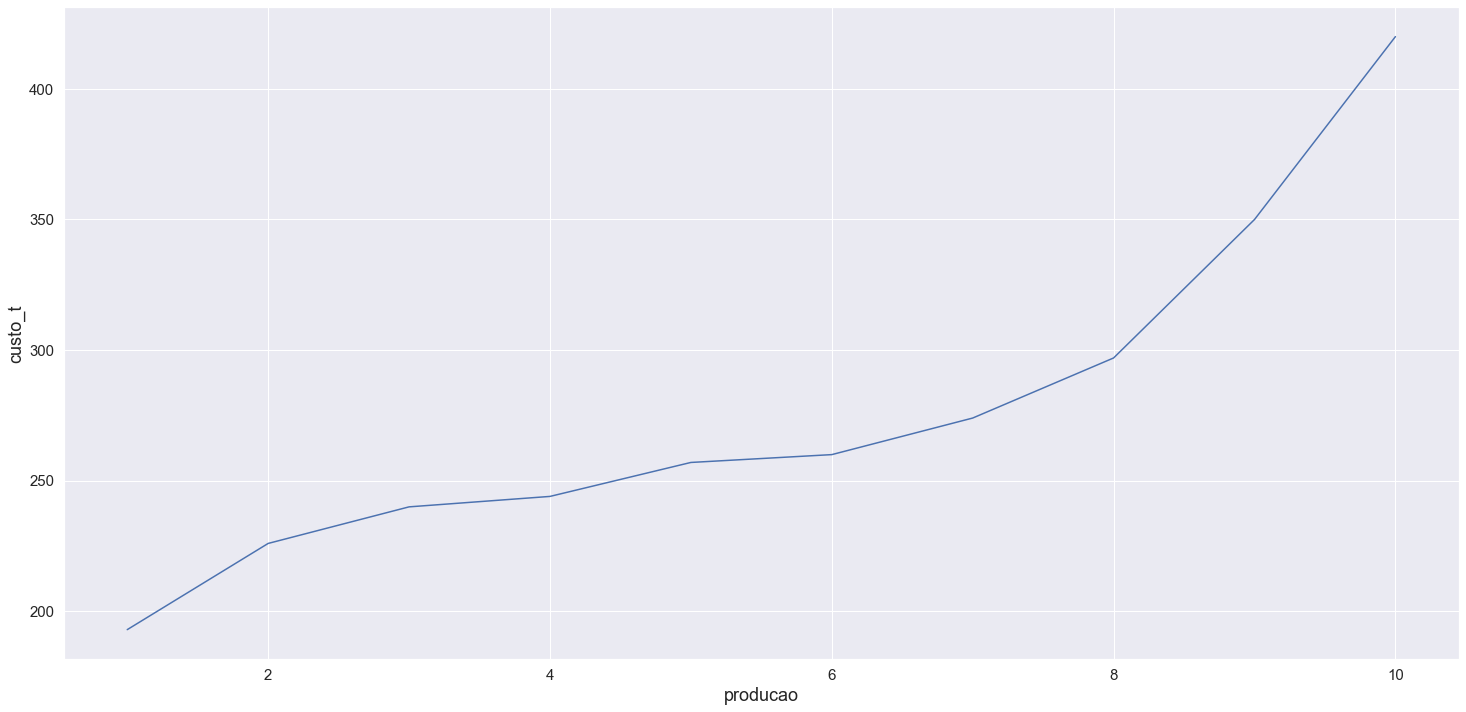

In [200]:
#Grafico 
sns.lineplot( x = 'producao', y = 'custo_t', data = data);

In [201]:
# dataset regressao polinomial
data_p = data.copy()
#data_p['producao'] = np.power(data_p['producao'], 1 )
data_p['producao_2'] = np.power(data_p['producao'], 2 )
data_p['producao_3'] = np.power(data_p['producao'], 3 )
data_p = data_p[['custo_t','producao','producao_2','producao_3']]
data_p.head(10)

custo_t  producao  producao_2  producao_3
0      193         1           1           1
1      226         2           4           8
2      240         3           9          27
3      244         4          16          64
4      257         5          25         125
5      260         6          36         216
6      274         7          49         343
7      297         8          64         512
8      350         9          81         729
9      420        10         100        1000

In [202]:
#statsmodels
print(' Regressao Polinomial  \n')
x = data_p[['producao','producao_2','producao_3']]
y = data_p[['custo_t']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao Polinomial  

                            OLS Regression Results                            
Dep. Variable:                custo_t   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1202.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.00e-08
Time:                        06:50:34   Log-Likelihood:                -23.529
No. Observations:                  10   AIC:                             55.06
Df Residuals:                       6   BIC:                             56.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.7667      

/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


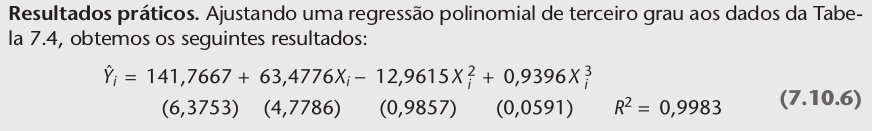

In [203]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_4.png')

### Parâmetros do modelo polinomial - Lei dos Rendimentos Decrescentes

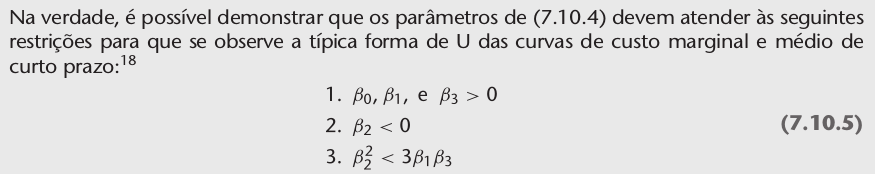

In [204]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/exemplo_7.4_2.png')

In [205]:
#Parametros do modelo e 
model.params

const        141.77
producao      63.48
producao_2   -12.96
producao_3     0.94
dtype: float64

In [206]:
#Condição 1
(model.params[0]) > 0, (model.params[1]) > 0, (model.params[3]) > 0

(True, True, True)

In [207]:
#Condição 2
(model.params[2]) < 0

True

In [208]:
#condição 3
np.square(model.params[2]) < 3*(model.params[1])*(model.params[3])

True

In [209]:
#valor predito de PNBpc
data_p['predict_custo'] = model.predict(x)
data_p['u1'] = model.resid
data_p

custo_t  producao  producao_2  producao_3  predict_custo    u1
0      193         1           1           1         193.22 -0.22
1      226         2           4           8         224.39  1.61
2      240         3           9          27         240.91 -0.91
3      244         4          16          64         248.43 -4.43
4      257         5          25         125         252.57  4.43
5      260         6          36         216         258.97  1.03
6      274         7          49         343         273.27  0.73
7      297         8          64         512         301.12 -4.12
8      350         9          81         729         348.14  1.86
9      420        10         100        1000         419.98  0.02

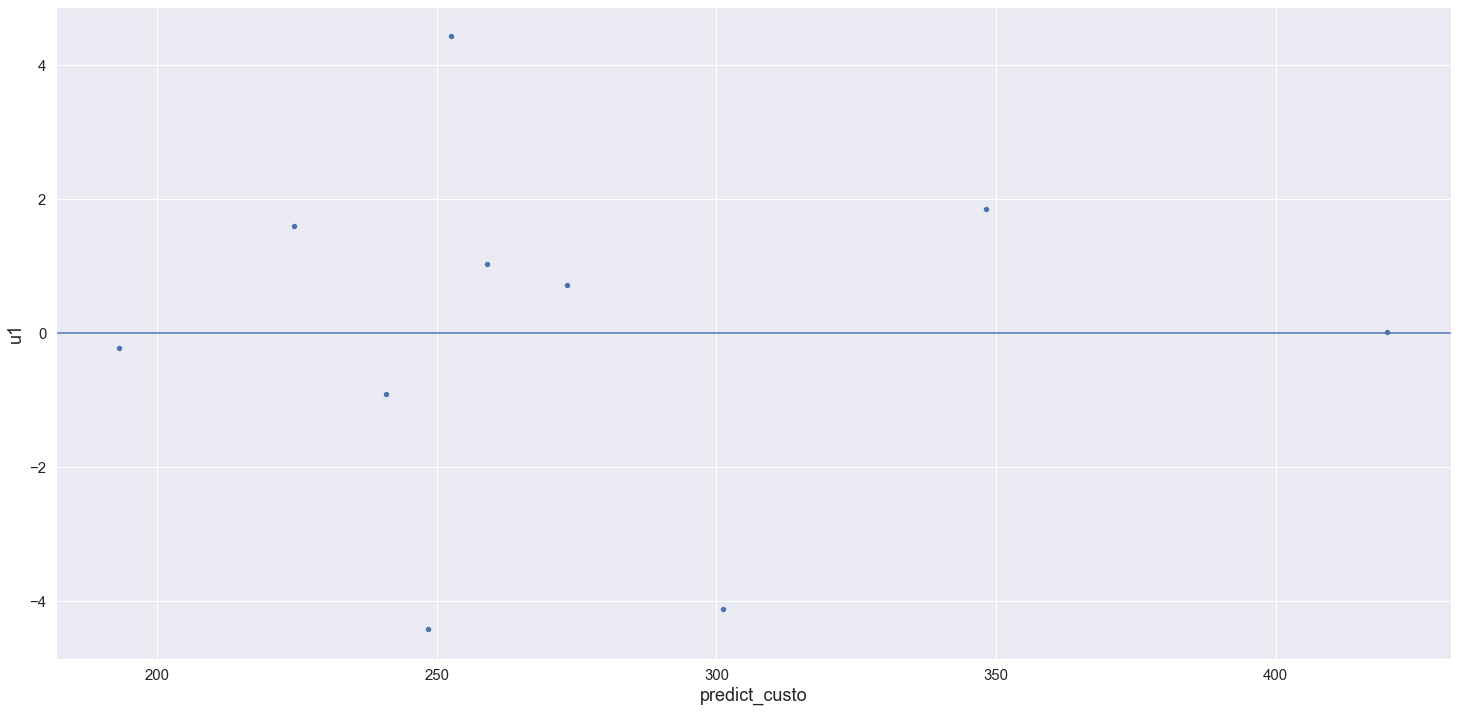

In [210]:
#dispersao do erro u2 x valor predito de PNBpc
sns.scatterplot( x = 'predict_custo', y = 'u1', data = data_p )
plt.axhline(y=0);

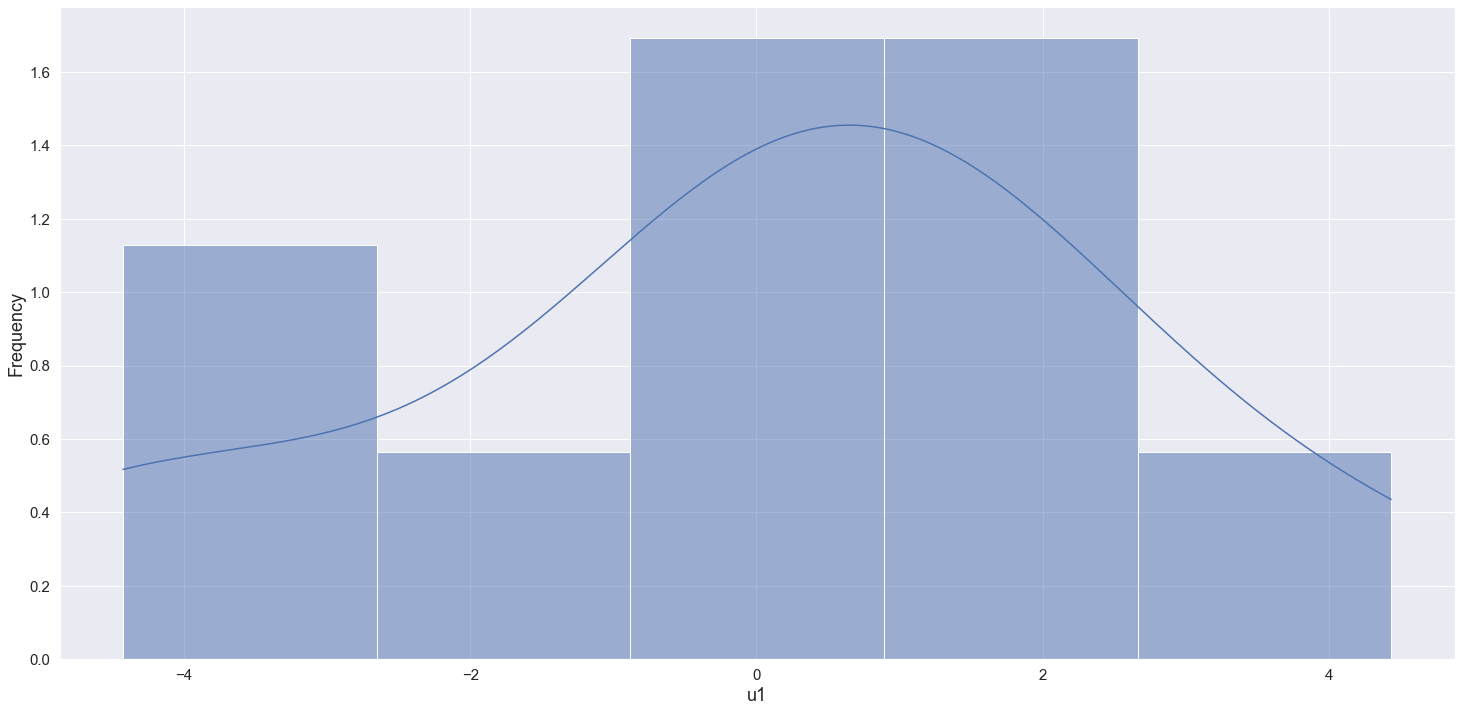

In [211]:
sns.histplot( x = 'u1',data = data_p, stat = 'frequency', kde = True);

In [212]:
#teste de normalidade Jarque Bera
#from statsmodels.stats.stattools import jarque_bera
# resultado ( jarque bera test statistic , pvalue, skewness, kurtosis)
jb = jarque_bera( data_p['u1'])
jb

(0.2824992342107096,
 0.8682725489646188,
 -0.35251126180548176,
 2.574627923686884)

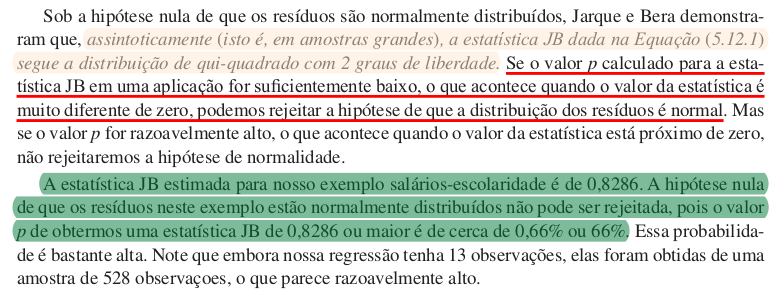

In [213]:
Image('/home/deivison/Documentos/projetos/econometria/imagens/jarque_bera_3.png')

In [214]:
from scipy.stats import normaltest
stat_test, p_valor = normaltest(data_p['u1'])
print(stat_test)
print(p_valor)

0.5265855173655322
0.7685168743862311


/home/deivison/Documentos/projetos/econometria/venv_eco/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


A função **_normaltest_** testa a hipótese nula ${H}_0$ de que a amostra é proveniente de uma distribuição normal.

$ {H}_0 $ a amostra é proveniente de uma distribuição normal.

$ {H}_1 $ Não é proveniente de uma distribução normal.

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $ {H}_0 $ se o valor $ p\leq 0,05 $

# Seção 7.11 Coeficientes de correlação simples e parcial

## Regressão Multivariada (Statsmodels)

In [215]:
data = pd.read_excel('/home/deivison/Documentos/projetos/econometria/datasets/tabela_6.4.xlsx')
data.head()

observacao   mi  taf  pnbpc  tft
0           1  128   37   1870 6.66
1           2  204   22    130 6.15
2           3  202   16    310 7.00
3           4  197   65    570 6.25
4           5   96   76   2050 3.81

In [216]:
#statsmodels
print(' Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u \n')
x = data[['pnbpc','taf']]
y = data[['mi']]
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

 Regressao  MI (y) =  x + pnbpc(x2) + taf(x3) + u 

                            OLS Regression Results                            
Dep. Variable:                     mi   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           5.12e-17
Time:                        06:50:35   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


In [217]:
#valor predito de mi
data['predict_mi'] = model.predict(x)
data['u1'] = model.resid
data.head(10)

observacao   mi  taf  pnbpc  tft  predict_mi     u1
0           1  128   37   1870 6.66      170.51 -42.51
1           2  204   22    130 6.15      213.81  -9.81
2           3  202   16    310 7.00      226.19 -24.19
3           4  197   65    570 6.25      115.37  81.63
4           5   96   76   2050 3.81       82.47  13.53
5           6  209   26    200 6.44      204.49   4.51
6           7  170   45    670 6.19      159.44  10.56
7           8  240   29    300 5.89      197.23  42.77
8           9  241   11    120 5.89      238.42   2.58
9          10   55   55    290 2.36      139.27 -84.27

### Coeficiente de correlação simples

In [218]:
#pandas 

#Correlação r_1_2
column_1 = data['mi']
column_2 = data['pnbpc']
correlation_y_pnbcpc = column_1.corr(column_2) 
correlation_y_pnbcpc

-0.40769717271507583

In [219]:
#Correlação r_1_3
column_1 = data['mi']
column_2 = data['taf']
correlation_y_taf = column_1.corr(column_2) 
correlation_y_taf

-0.8182846185950053

In [220]:
#Correlação r_2_3
column_1 = data['taf']
column_2 = data['pnbpc']
correlation_taf_pnbcpc = column_1.corr(column_2) 
correlation_taf_pnbcpc

0.2685298854252347

In [221]:
#Biblioteca pingouin
import pingouin as pg

In [222]:
r = pg.pairwise_corr(data, columns = ['mi','pnbpc','taf'] )
r

X      Y   method alternative   n     r           CI95%  p-unc       BF10  power
0     mi  pnbpc  pearson   two-sided  64 -0.41  [-0.59, -0.18]   0.00     36.868   0.93
1     mi    taf  pearson   two-sided  64 -0.82  [-0.89, -0.72]   0.00  4.389e+13   1.00
2  pnbpc    taf  pearson   two-sided  64  0.27    [0.02, 0.48]   0.03      1.481   0.58

### Coeficiente de correlação parcial

In [223]:
corr_12_3 = pg.partial_corr(data=data, y = 'mi', x='pnbpc', covar='taf')
corr_12_3

n     r          CI95%  p-val
pearson  64 -0.34  [-0.54, -0.1]   0.01

In [224]:
corr_13_2 = pg.partial_corr(data=data, y = 'mi', x='taf', covar='pnbpc')
corr_13_2

n     r          CI95%  p-val
pearson  64 -0.81  [-0.88, -0.7]   0.00

In [225]:
corr_23_1 = pg.partial_corr(data=data, y = 'taf', x='pnbpc', covar='mi')
corr_23_1

n     r          CI95%  p-val
pearson  64 -0.12  [-0.36, 0.13]   0.33

https://psicometriaonline.com.br/o-que-e-correlacao-parcial/

https://towardsdatascience.com/partial-correlation-508353cd8b5

https://arxiv.org/pdf/1402.1405.pdf